Importing libraries

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
#from sklearn.cluster import KMeans

Reading the data

In [2]:
earthquakes = pd.read_csv("E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\quake_pull(1929_2021).csv")
volcano = pd.read_csv("E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\Eruptions1960.csv")

There are few volcanos that are continuous and hence they do not need predictor and hence we need to remove this data from our volcano dataset this data (without contineous volcanos) is stored volcano_nonconti

In [3]:
volcano_nonconti = pd.DataFrame(volcano[np.logical_and(volcano.EndDate.notna(),volcano["ContinuingEruption"] != "True")])
volcano_nonconti["StartDate"] = pd.to_datetime(volcano_nonconti["StartDate"], format='%Y%m%d')
volcano_nonconti["EndDate"] = pd.to_datetime(volcano_nonconti["EndDate"], format='%Y%m%d')

This is where we are getting rid of magType (uk, mh) and eventtype (nuclear explosion, explosion)

In [4]:
z = earthquakes.loc[np.logical_or(earthquakes['magType'] == "uk",earthquakes['magType'] == "mh")].index
x = earthquakes.loc[np.logical_or(earthquakes['eventtype'] == "nuclear explosion",earthquakes['eventtype'] == "explosion")].index
z = z.append(x)
earthquakes = earthquakes.drop(index = z)
earthquakes = earthquakes.drop("eventtype", axis = 1)
earthquakes.reset_index(inplace=True)
earthquakes.sort_values(by = "time").head()

index  Unnamed: 0            id                     time  \
16     17          17  iscgem911791  1922-01-01 19:46:36.000   
15     16          16  iscgem911793  1922-01-06 14:11:05.000   
14     15          15  iscgem911798  1922-01-09 05:09:39.000   
13     14          14  iscgem911801  1922-01-17 03:50:28.000   
12     13          13  iscgem911802  1922-01-19 21:59:04.000   

                                location  latitude  longitude  depth  \
16                           Fiji region   -15.873   -177.956   15.0   
15   106 km SW of Islay (Matarani), Peru   -17.734    -72.743   15.0   
14           northern Mid-Atlantic Ridge    23.802    -45.802   10.0   
13  143 km NW of Puerto Nariño, Colombia    -3.025    -71.398  475.0   
12          New Guinea, Papua New Guinea    -7.629    141.173   15.0   

    magnitude magType  
16        6.6      mw  
15        6.8      mw  
14        6.9      mw  
13        7.9      mw  
12        6.9      mw

We create dummies so that we can handle the magnitude type o its own and dont need conversion factors.

In [5]:
#col = ["magType"]
#earthquakes = pd.get_dummies(earthquakes, columns = col)

In [6]:
volcano_nonconti.head()

FID  VolcanoNumber  \
0  E3WebApp_Eruptions1960.fid-9b252f0_17a0eaf674d...         211040   
1  E3WebApp_Eruptions1960.fid-9b252f0_17a0eaf674d...         211060   
2  E3WebApp_Eruptions1960.fid-9b252f0_17a0eaf674d...         211060   
3  E3WebApp_Eruptions1960.fid-9b252f0_17a0eaf674d...         211060   
4  E3WebApp_Eruptions1960.fid-9b252f0_17a0eaf674d...         211060   

  VolcanoName  ExplosivityIndexMax  StartDate  StartDateYear  StartDateMonth  \
0   Stromboli                    2 1934-02-02           1934               2   
1        Etna                    1 2008-05-13           2008               5   
2        Etna                    2 2010-04-08           2010               4   
3        Etna                    1 2010-08-25           2010               8   
4        Etna                    2 2013-09-03           2013               9   

   StartDateDay    EndDate  EndDateYear  EndDateMonth  EndDateDay  \
0             2 2021-05-06       2021.0           5.0         6.0   
1            13 2009-07-04       2009.0           7.0         4.0   
2             8 2010-04-08       2010.0           4.0         8.0   
3            25 2013-04-27       2013.0           4.0        27.0   
4             3 2021-05-06       2021.0           5.0         6.0   

   ContinuingEruption  LatitudeDecimal  LongitudeDecimal  \
0                True           38.789            15.213   
1               False           37.748            14.999   
2               False           37.748            14.999   
3               False           37.748            14.999   
4                True           37.748            14.999   

             GeoLocation  Activity_ID  
0  POINT (15.213 38.789)        13435  
1  POINT (14.999 37.748)        13852  
2  POINT (14.999 37.748)        13853  
3  POINT (14.999 37.748)        13854  
4  POINT (14.999 37.748)        20841

In [7]:
#year = earthquakes.time
earthquakes["time"] = pd.to_datetime(earthquakes["time"])

<function matplotlib.pyplot.show(close=None, block=None)>

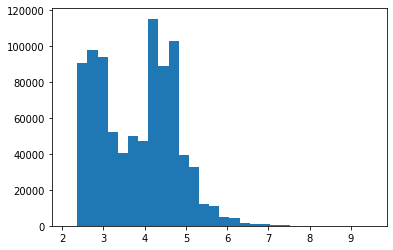

In [8]:
plt.hist(earthquakes.magnitude, bins = 30)
plt.show

In [9]:
unique_volcano_id = volcano_nonconti.VolcanoNumber.unique()

Code for creating a dataform that has the unique volcano locations, their average longitudes and average latitude.

In [10]:
longi = []
lati = []
for i in unique_volcano_id:
    longi.append(np.mean(volcano_nonconti.loc[volcano_nonconti["VolcanoNumber"] == i].LongitudeDecimal))
    lati.append(np.mean(volcano_nonconti.loc[volcano_nonconti["VolcanoNumber"] == i].LatitudeDecimal))
v = {"unique_volcano_id" : unique_volcano_id, "LongitudeDecimal" : longi, "LatitudeDecimal" : lati}
dataset_vol_longi_lati = pd.DataFrame(v)
print(dataset_vol_longi_lati.head())

   unique_volcano_id  LongitudeDecimal  LatitudeDecimal
0             211040            15.213           38.789
1             211060            14.999           37.748
2             221010            41.830           15.550
3             221020            42.180           15.050
4             221041            40.300           14.242


This creates the datafram that contains distance from all the unique locations to the volcano and has a column that includes the earthquake id

In [11]:
R = 6373.0
vol_lat = np.radians(dataset_vol_longi_lati.LatitudeDecimal)
vol_lon = np.radians(dataset_vol_longi_lati.LongitudeDecimal)
earthquake_lat = np.radians(earthquakes.latitude)
earthquake_lon = np.radians(earthquakes.longitude)

In [12]:
df = {}
for i in range(len(vol_lon)):
    dlon = np.ones(len(earthquake_lon)) * vol_lon[i] - earthquake_lon  # lon2 - lon1
    dlat = np.ones(len(earthquake_lat)) * vol_lat[i] - earthquake_lat  # lat2 - lat1
    a = np.sin(dlat / 2) ** 2 + np.cos(vol_lat[i]) * np.cos(earthquake_lat) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    index_name = str(dataset_vol_longi_lati.unique_volcano_id[i])
    df[index_name] = distance
df = pd.DataFrame.from_dict(df, orient='columns')
df["earthquake_id"] =   earthquakes.id
df

211040        211060        221010        221020        221041  \
0        9735.713122   9847.283711  10395.931415  10414.236314  10613.018701   
1       15889.437891  15975.048047  14010.232807  13968.901064  14163.883508   
2        3845.418912   3953.446341   7036.967625   7101.002006   7130.160756   
3       12845.501104  12903.115817  10649.214684  10611.745580  10814.390840   
4        9712.793283   9828.601689  11886.671225  11929.557195  12071.368777   
...              ...           ...           ...           ...           ...   
889527   9520.554553   9607.086801  12964.957322  13029.536665  13048.956239   
889528   9519.650163   9606.200991  12963.772651  13028.347911  13047.817817   
889529  12196.985082  12123.987712  13244.890501  13247.931166  13028.583143   
889530    477.576514    473.490615   3215.691737   3282.707754   3238.729160   
889531   7953.440605   7979.345065   5446.240654   5414.083543   5624.782477   

              221060        221080        221101        221113        221115  \
0       10633.988702  10642.390643  10590.406322  10741.427404  10754.002889   
1       14132.643124  14118.212118  14004.956331  14128.297324  14086.704737   
2        7185.723046   7209.857915   7265.537496   7311.600374   7367.211767   
3       10787.385842  10774.838581  10663.474470  10795.797781  10758.933430   
4       12112.205846  12129.475475  12123.437530  12242.668517  12278.123125   
...              ...           ...           ...           ...           ...   
889527  13105.165706  13129.625409  13190.352961  13227.957761  13284.931642   
889528  13104.025198  13128.483795  13189.188852  13226.829569  13283.798981   
889529  13025.288883  13024.580355  13105.166680  12947.329224  12952.887221   
889530   3295.416239   3320.290617   3404.060695   3402.664569   3462.385844   
889531   5603.528574   5593.585581   5486.176312   5628.530328   5598.575243   

        ...        390030        390081        390080        390090  \
0       ...  17150.478438  18639.220876  18575.354816  18710.743429   
1       ...  10763.853885  12098.171374  12034.113967  12166.625797   
2       ...  15403.458486  14448.897941  14513.168975  14378.487268   
3       ...  12702.366088  13213.645199  13156.195168  13283.689194   
4       ...  15774.711253  17451.992329  17449.648726  17436.260898   
...     ...           ...           ...           ...           ...   
889527  ...  12861.790180  14000.715625  14022.285887  13961.184088   
889528  ...  12863.529004  14002.368824  14023.945344  13962.830861   
889529  ...   3274.307198   4315.443695   4325.825179   4288.632559   
889530  ...  13228.955452  11499.061949  11555.605573  11445.206677   
889531  ...  14182.243907  12998.672140  12987.676685  13026.632477   

              390130        284193        385052        242005        284305  \
0       18872.444128   3364.143749  17738.259840   8993.457264   3520.393722   
1       12313.087994   3893.402873  14932.083559   2606.949721   3873.673790   
2       14221.207850  10107.512507  11558.754965  15543.926460  10217.786235   
3       13462.700981   2199.984955  14548.690757   5643.241061   2024.768402   
4       17341.638801   5914.571298  17198.628645   9547.549102   6098.895051   
...              ...           ...           ...           ...           ...   
889527  13822.300492   9439.880828  13979.346327  10595.784577   9628.541004   
889528  13823.934681   9438.756496  13980.360361  10596.302727   9627.415857   
889529   4179.256449  15677.183350   6149.834235   9377.974924  15711.160304   
889530  11351.029061  11745.402740   8255.085655  18112.787825  11749.043206   
889531  13140.171324   5701.028350  11567.542448  10660.531968   5577.219660   

        earthquake_id  
0        iscgem911880  
1        iscgem911876  
2        iscgem911861  
3        iscgem911855  
4        iscgem911853  
...               ...  
889527     us6000crcy  
889528     us6000crcu  
889529     us6000crcq  
889530     us6000csit  
889531     us6

In [13]:
volcano_nonconti["counter"] = np.zeros(len(volcano_nonconti.FID))

In [14]:
volcano_nonconti.columns

Index(['FID', 'VolcanoNumber', 'VolcanoName', 'ExplosivityIndexMax',
       'StartDate', 'StartDateYear', 'StartDateMonth', 'StartDateDay',
       'EndDate', 'EndDateYear', 'EndDateMonth', 'EndDateDay',
       'ContinuingEruption', 'LatitudeDecimal', 'LongitudeDecimal',
       'GeoLocation', 'Activity_ID', 'counter'],
      dtype='object')

In [15]:
volcano_nonconti = volcano_nonconti.sort_values("StartDate")
volcano_nonconti.head()

FID  VolcanoNumber  \
502   E3WebApp_Eruptions1960.fid-9b252f0_17a0eaf674d...         257100   
1641  E3WebApp_Eruptions1960.fid-9b252f0_17a0eaf674d...         342030   
87    E3WebApp_Eruptions1960.fid-9b252f0_17a0eaf674d...         223030   
865   E3WebApp_Eruptions1960.fid-9b252f0_17a0eaf674d_93         268010   
0     E3WebApp_Eruptions1960.fid-9b252f0_17a0eaf674d...         211040   

      VolcanoName  ExplosivityIndexMax  StartDate  StartDateYear  \
502         Yasur                    3 1774-07-02           1774   
1641  Santa Maria                    3 1922-06-22           1922   
87     Nyiragongo                    1 1927-03-16           1927   
865        Dukono                    3 1933-08-13           1933   
0       Stromboli                    2 1934-02-02           1934   

      StartDateMonth  StartDateDay    EndDate  EndDateYear  EndDateMonth  \
502                7             2 2021-05-06       2021.0           5.0   
1641               6            22 2021-05-06       2021.0           5.0   
87                 3            16 1977-01-10       1977.0           1.0   
865                8            13 2021-05-06       2021.0           5.0   
0                  2             2 2021-05-06       2021.0           5.0   

      EndDateDay  ContinuingEruption  LatitudeDecimal  LongitudeDecimal  \
502          6.0                True          -19.532           169.447   
1641         6.0                True           14.757           -91.552   
87          10.0               False           -1.520            29.250   
865          6.0                True            1.693           127.894   
0            6.0                True           38.789            15.213   

                  GeoLocation  Activity_ID  counter  
502   POINT (169.447 -19.532)        15355      0.0  
1641   POINT (-91.552 14.757)        10626      0.0  
87        POINT (29.25 -1.52)        14100      0.0  
865     POINT (127.894 1.693)        16577      0.0  
0       POINT (15.213 38.789)        13435      0.0

Here we are alloting the counters, so that the counter value at the given datapoint tells us the number of time that particular volcano has erupted before in the given dataset

In [16]:
counter_dict = {}
a = []
for i in unique_volcano_id:
    counter_dict[str(i)] = 0
for i in range(len(volcano_nonconti.FID)):
    counter_dict[str(volcano_nonconti.iloc[i][1])] += 1
    a.append(counter_dict[str(volcano_nonconti.iloc[i][1])])
volcano_nonconti["counter"] = a
print(volcano_nonconti["counter"].head())

502     1
1641    1
87      1
865     1
0       1
Name: counter, dtype: int64


Dividing the earthquake timing into date and timing

In [17]:
earthquakes['new_date'] = [d.date() for d in earthquakes['time']]
#earthquakes['new_date'] = pd.to_datetime(earthquakes['new_date'])
earthquakes['new_time'] = [d.time() for d in earthquakes['time']]
#earthquakes['new_time'] = pd.to_datetime(earthquakes['new_time'])

In [18]:
earthquakes["new_date"] =  pd.to_datetime(earthquakes["new_date"])
#earthquakes["new_time"] = pd.to_datetime(earthquakes["new_time"])

Data aggerigation, location and timing

In [19]:
def get_earthquake(earthquakes, volcanoname, distance, time_start, time_end, sa, min_entries = 0, distance_dataframe = df, hard_limit_radius = 20):
    y = distance_dataframe.loc[distance_dataframe[str(volcanoname)] < distance]
    time_delta = pd.Timedelta(0, unit='D')
    if y.earthquake_id.count() > min_entries:
        e = y.earthquake_id.values[0]
        u = earthquakes.loc[earthquakes["id"] == e]
        for e in y.earthquake_id.values[1:]:
            z = earthquakes.loc[earthquakes["id"] == e]
            u = pd.concat([u, z])
        u["Start_date_difference"] = u.new_date - time_start
        u["end_date_difference"] = u.new_date - time_end
        x = u.loc[np.logical_and(u["Start_date_difference"] <= time_delta, u["end_date_difference"] >= time_delta)]
        x = x.sort_values(by = "new_date")
        x["volcano_time"] = j
        x["volcano_name"] = volcanoname
        return x
    else:
        if min_entries == 0:
            return pd.DataFrame()
        distance_dataframe = distance_dataframe.sort_values(by = [str(volcanoname)], axis=0, ascending=True)
        y = distance_dataframe.iloc[0:min_entries]
        y = y.loc[y[str(volcanoname)] < hard_limit_radius]
        shape = y.shape
        #if(sa > 16):
         #   print(y.shape)
        if shape[0] == 0:
            return pd.DataFrame()
        e = y.earthquake_id.values[0]
        u = earthquakes.loc[earthquakes["id"] == e]
        for e in y.earthquake_id.values[1:]:
            z = earthquakes.loc[earthquakes["id"] == e]
            u = pd.concat([u, z])
        u["Start_date_difference"] = u.new_date - time_start
        u["end_date_difference"] = u.new_date - time_end
        x = u.loc[np.logical_and(u["Start_date_difference"] <= time_delta, u["end_date_difference"] >= time_delta)]
        x = x.sort_values(by = "new_date")
        x["volcano_time"] = j
        x["volcano_name"] = volcanoname
        return x

In [27]:
X_collections = {}
shape_of_input = {}
g = pd.DataFrame()
min_entries = 10
distance_radius = 10
upper_limit_radius = 20
sa = 0
for i in unique_volcano_id:
    sa = sa + 1
    Single_volcano = volcano_nonconti[volcano_nonconti["VolcanoNumber"] == i]
    Single_volcano.sort_values(by='StartDate', axis = 0, ascending= True)
    k = 0
    i = str(i)
    shape_of_input_inner= {}
    inner_dict = {}
    for j in Single_volcano.StartDate:
        j = pd.to_datetime(j)
        if k == 0:
            x = get_earthquake(distance_dataframe = df,earthquakes = earthquakes,volcanoname = i, distance = distance_radius, time_start = j, time_end = (j - pd.Timedelta(183, unit = "D")), min_entries = min_entries, hard_limit_radius = upper_limit_radius, sa =sa)
            jold = j
            k = k + 1
        elif j - jold < pd.Timedelta(1460, unit = "D"):
            x =  get_earthquake(distance_dataframe = df,earthquakes = earthquakes,volcanoname = i, distance = distance_radius, time_start = j, time_end = jold, min_entries = min_entries, hard_limit_radius = upper_limit_radius, sa = sa)
            jold = j
            k = k + 1
        else:
            x =  get_earthquake(distance_dataframe = df,earthquakes = earthquakes,volcanoname = i, distance = distance_radius, time_start = j, time_end = (j - pd.Timedelta(183, unit = "D")), min_entries = min_entries, hard_limit_radius = upper_limit_radius, sa = sa)
            jold = j
            k = k + 1
        if sa >= 220:
            print(x.shape)
        ru = x.shape
        if ru[0] != 0:
            shape_of_input_inner[j] = ru[0]
            g = g.append(x)
            inner_dict[j] = x
        X_collections[i] = inner_dict
        shape_of_input[i] = shape_of_input_inner
    print( "Current state: " + str(sa) + " / " + str(len(unique_volcano_id)))
    

Current state: 1 / 315
Current state: 2 / 315


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 3 / 315
Current state: 4 / 315
Current state: 5 / 315


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 6 / 315


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 7 / 315
Current state: 8 / 315
Current state: 9 / 315
Current state: 10 / 315
Current state: 11 / 315
Current state: 12 / 315
Current state: 13 / 315
Current state: 14 / 315


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end
<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Current state: 15 / 315
Current state: 16 / 315
(0, 316)
(0, 316)
(0, 316)
(0, 316)
(0, 316)
(0, 316)
(0, 316)
(0, 316)
Current state: 17 / 315
(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)
Current state: 18 / 315


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(10, 316)
Current state: 19 / 315
(0, 316)
(0, 316)
(0, 316)
(0, 316)
(0, 316)
Current state: 20 / 315
(1, 316)
Current state: 21 / 315


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 22 / 315
Current state: 23 / 315
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
Current state: 24 / 315
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
Current state: 25 / 315
Current state: 26 / 315
(10, 316)
(10, 316)
Current state: 27 / 315
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
Current state: 28 / 315
(10, 316)
(10, 316)
Current state: 29 / 315
(10, 316)
(10, 316)
(10, 316)
Current state: 30 / 315
(10, 316)
(10, 316)
(10, 316)
Current state: 31 / 315
(10, 316)
(10, 316)
(10, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 190 / 315
(10, 316)
(10, 316)
Current state: 191 / 315
Current state: 192 / 315
Current state: 193 / 315
Current state: 194 / 315
Current state: 195 / 315
Current state: 196 / 315
Current state: 197 / 315
(10, 316)
(10, 316)
(10, 316)
Current state: 198 / 315
Current state: 199 / 315
Current state: 200 / 315
Current state: 201 / 315
(10, 316)
(10, 316)
Current state: 202 / 315
Current state: 203 / 315
Current state: 204 / 315
Current state: 205 / 315
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
Current state: 206 / 315
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
Current state: 207 / 315
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
(10, 316)
Current state: 208 / 315
Current state: 

<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(0, 16)
(1, 316)
(0, 16)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(0, 16)
(1, 316)
(0, 16)
Current state: 223 / 315


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(0, 316)
(0, 0)
(0, 316)
(0, 0)
Current state: 224 / 315
(0, 316)
(0, 0)
(0, 316)
(0, 0)
Current state: 225 / 315
(0, 316)
(0, 0)
(0, 316)
(0, 0)
(0, 316)
(0, 0)
(0, 316)
(0, 0)
(0, 316)
(0, 0)
(0, 316)
(0, 0)
(0, 316)
(0, 0)
(0, 316)
(0, 0)
(0, 316)
(0, 0)
(0, 316)
(0, 0)
Current state: 226 / 315
(0, 316)
(0, 0)
Current state: 227 / 315
(8, 316)
(0, 16)
(8, 316)
(1, 16)
Current state: 228 / 315
(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(0, 16)
Current state: 229 / 315
(0, 316)
(0, 0)
Current state: 230 / 315
(7, 316)
(0, 16)
(7, 316)
(0, 16)
(7, 316)
(0, 16)
(7, 316)
(1, 16)
(7, 316)
(0, 16)
(7, 316)
(0, 16)
(7, 316)
(0, 16)
(7, 316)
(0, 16)
(7, 316)
(0, 16)
(7, 316)
(1, 16)
(7, 316)
(0, 16)
(7, 316)
(0, 16)
Current state: 231 / 315
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(1, 16)
(10, 316)
(0, 16)
Current state: 232 / 315
(3, 316)
(0, 16)
Current state: 233 / 315
(10, 316)
(2, 16)
Current state: 234 / 315
(10, 316)
(0, 16)
Current state: 235 / 315
(10, 316)
(0, 16)
Current state: 236 / 315
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(1, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(2, 16)
(10, 316)
(2, 16)
Current state: 237 / 315
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(1, 16)
(10, 316)
(1, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(1, 16)
(10, 316)
(0, 16)
(10, 316

<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(2, 316)
(0, 16)
Current state: 296 / 315
(10, 316)
(0, 16)
(10, 316)
(10, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
(10, 316)
(0, 16)
Current state: 297 / 315
(10, 316)
(0, 16)
(10, 316)
(2, 16)
Current state: 298 / 315
(42, 16)
Current state: 299 / 315
(0, 316)
(0, 0)
Current state: 300 / 315
(0, 316)
(0, 0)
Current state: 301 / 315
(4, 316)
(0, 16)
Current state: 302 / 315
(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(0, 16)
(1, 316)
(1, 16)
Current state: 303 / 315

<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end



(1, 316)


<ipython-input-18-9efd4c7a2958>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-18-9efd4c7a2958>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


(1, 16)
Current state: 304 / 315
(0, 316)
(0, 0)
Current state: 305 / 315
(0, 316)
(0, 0)
Current state: 306 / 315
(5, 316)
(0, 16)
(5, 316)
(0, 16)
Current state: 307 / 315
(10, 316)
(0, 16)
Current state: 308 / 315
(10, 316)
(1, 16)
Current state: 309 / 315
(8, 316)
(0, 16)
(8, 316)
(1, 16)
(8, 316)
(0, 16)
(8, 316)
(1, 16)
(8, 316)
(2, 16)
Current state: 310 / 315
(7, 16)
Current state: 311 / 315
(10, 316)
(0, 16)
Current state: 312 / 315
(0, 316)
(0, 0)
Current state: 313 / 315
(5, 16)
Current state: 314 / 315
(3, 316)
(0, 16)
Current state: 315 / 315


In [60]:
#X_collections = {}
#shape_of_input = {}
f1 = pd.DataFrame()
min_entries = 10
distance_radius = 10
upper_limit_radius = 20
sa = 0
for i in unique_volcano_id:
    sa = sa + 1
    Single_volcano = volcano_nonconti[volcano_nonconti["VolcanoNumber"] == i]
    Single_volcano.sort_values(by='StartDate', axis = 0, ascending= True)
    k = 0
    i = str(i)
    shape_of_input_inner= {}
    inner_dict = {}
    for j in Single_volcano.StartDate:
        j = pd.to_datetime(j)
        if k == 0:
            x = get_earthquake(distance_dataframe = df,earthquakes = earthquakes,volcanoname = i, distance = distance_radius, time_start = (j - pd.Timedelta(400, unit = "D")), time_end = (j - pd.Timedelta((1460+400), unit = "D")), min_entries = min_entries, hard_limit_radius = upper_limit_radius, sa =sa)
            jold = j
            k = k + 1
        elif j - jold < pd.Timedelta((1460+400), unit = "D"):
            x = pd.DataFrame() #get_earthquake(distance_dataframe = df,earthquakes = earthquakes,volcanoname = i, distance = distance_radius, time_start = j, time_end = jold, min_entries = min_entries, hard_limit_radius = upper_limit_radius, sa = sa)
            jold = j
            k = k + 1
        else:
            x =  get_earthquake(distance_dataframe = df,earthquakes = earthquakes,volcanoname = i, distance = distance_radius, time_start = (j - pd.Timedelta((1460+400), unit = "D")), time_end = jold, min_entries = min_entries, hard_limit_radius = upper_limit_radius, sa = sa)
            jold = j
            k = k + 1
        #if sa >= 220:
         #   print(x.shape)
        ru = x.shape
        if ru[0] != 0:
            shape_of_input_inner[j] = ru[0]
            f1 = f1.append(x)
            inner_dict[j] = x
        #X_collections[i] = inner_dict
        #shape_of_input[i] = shape_of_input_inner
    print( "Current state: " + str(sa) + " / " + str(len(unique_volcano_id)))
    

Current state: 1 / 315
Current state: 2 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 3 / 315
Current state: 4 / 315
Current state: 5 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 6 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 7 / 315
Current state: 8 / 315
Current state: 9 / 315
Current state: 10 / 315
Current state: 11 / 315
Current state: 12 / 315
Current state: 13 / 315
Current state: 14 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end
<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Current state: 15 / 315
Current state: 16 / 315
Current state: 17 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end
<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Current state: 18 / 315
Current state: 19 / 315
Current state: 20 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 21 / 315
Current state: 22 / 315
Current state: 23 / 315
Current state: 24 / 315
Current state: 25 / 315
Current state: 26 / 315
Current state: 27 / 315
Current state: 28 / 315
Current state: 29 / 315
Current state: 30 / 315
Current state: 31 / 315
Current state: 32 / 315
Current state: 33 / 315
Current state: 34 / 315
Current state: 35 / 315
Current state: 36 / 315
Current state: 37 / 315
Current state: 38 / 315
Current state: 39 / 315
Current state: 40 / 315
Current state: 41 / 315
Current state: 42 / 315
Current state: 43 / 315
Current state: 44 / 315
Current state: 45 / 315
Current state: 46 / 315
Current state: 47 / 315
Current state: 48 / 315
Current state: 49 / 315
Current state: 50 / 315
Current state: 51 / 315
Current state: 52 / 315
Current state: 53 / 315
Current state: 54 / 315
Current state: 55 / 315
Current state: 56 / 315
Current state: 57 / 315
Current state: 58 / 315
Current state: 59 / 315
Current state: 60 / 315
Current state: 61 / 315
Current state: 6

<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end
<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Current state: 190 / 315
Current state: 191 / 315
Current state: 192 / 315
Current state: 193 / 315
Current state: 194 / 315
Current state: 195 / 315
Current state: 196 / 315
Current state: 197 / 315
Current state: 198 / 315
Current state: 199 / 315
Current state: 200 / 315
Current state: 201 / 315
Current state: 202 / 315
Current state: 203 / 315
Current state: 204 / 315
Current state: 205 / 315
Current state: 206 / 315
Current state: 207 / 315
Current state: 208 / 315
Current state: 209 / 315
Current state: 210 / 315
Current state: 211 / 315
Current state: 212 / 315
Current state: 213 / 315
Current state: 214 / 315
Current state: 215 / 315
Current state: 216 / 315
Current state: 217 / 315
Current state: 218 / 315
Current state: 219 / 315
Current state: 220 / 315
Current state: 221 / 315
Current state: 222 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 223 / 315
Current state: 224 / 315
Current state: 225 / 315
Current state: 226 / 315
Current state: 227 / 315
Current state: 228 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 229 / 315
Current state: 230 / 315
Current state: 231 / 315
Current state: 232 / 315
Current state: 233 / 315
Current state: 234 / 315
Current state: 235 / 315
Current state: 236 / 315
Current state: 237 / 315
Current state: 238 / 315
Current state: 239 / 315
Current state: 240 / 315
Current state: 241 / 315
Current state: 242 / 315
Current state: 243 / 315
Current state: 244 / 315
Current state: 245 / 315
Current state: 246 / 315
Current state: 247 / 315
Current state: 248 / 315
Current state: 249 / 315
Current state: 250 / 315
Current state: 251 / 315
Current state: 252 / 315
Current state: 253 / 315
Current state: 254 / 315
Current state: 255 / 315
Current state: 256 / 315
Current state: 257 / 315
Current state: 258 / 315
Current state: 259 / 315
Current state: 260 / 315
Current state: 261 / 315
Current state: 262 / 315
Current state: 263 / 315
Current state: 264 / 315
Current state: 265 / 315
Current state: 266 / 315
Current state: 267 / 315
Current state: 268 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 295 / 315
Current state: 296 / 315
Current state: 297 / 315
Current state: 298 / 315
Current state: 299 / 315
Current state: 300 / 315
Current state: 301 / 315
Current state: 302 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end
<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

Current state: 303 / 315


<ipython-input-20-704a9f4f661b>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["Start_date_difference"] = u.new_date - time_start
<ipython-input-20-704a9f4f661b>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u["end_date_difference"] = u.new_date - time_end


Current state: 304 / 315
Current state: 305 / 315
Current state: 306 / 315
Current state: 307 / 315
Current state: 308 / 315
Current state: 309 / 315
Current state: 310 / 315
Current state: 311 / 315
Current state: 312 / 315
Current state: 313 / 315
Current state: 314 / 315
Current state: 315 / 315


In [61]:
#f1.to_pickle(r'E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\f_1jahr.pkl')

In [20]:
f1.head()

NameError: name 'f1' is not defined

This works!

This function gives the volcanonames

In [21]:
#g.to_pickle("E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\g2.pkl")
g = pd.read_pickle("E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\g2.pkl")

In [22]:
#g.dropna(axis = 0)
g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20059 entries, 73576 to 657009
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   index                  20059 non-null  int64          
 1   Unnamed: 0             20059 non-null  int64          
 2   id                     20059 non-null  object         
 3   time                   20059 non-null  datetime64[ns] 
 4   location               20022 non-null  object         
 5   latitude               20059 non-null  float64        
 6   longitude              20059 non-null  float64        
 7   depth                  20059 non-null  float64        
 8   magnitude              20059 non-null  float64        
 9   magType                20059 non-null  object         
 10  new_date               20059 non-null  datetime64[ns] 
 11  new_time               20059 non-null  object         
 12  Start_date_difference  20059 non-null  ti

This is the quantaized datafram generation section

8==> This function returns the unit of earhquakes:

In [20]:
#import operator

In [63]:
def m(f):
    g = f
    global df_magType
    magType_array =g.magType.unique()
    j = 1
    dict = {}
    for i in magType_array:
        dict[i] = j
        j = j + 1
    df_magType = pd.DataFrame(dict, index = [0])
    
    return df_magType
    print(df_magType)

In [64]:
def dict_magType(magType):
    return df_magType[str(magType)]
    

In [65]:
def unique_magType(volcano_name, volcano_time, g, time_period, flag):
    import operator
    dict_kelkar = {}
    volcano_name = volcano_name
    volcano_time = volcano_time
    g = g
    if flag == 0:
        h = pd.Timedelta(0, unit = "D")
    if flag == 1:    
        h = pd.Timedelta(183, unit = "D")
    if time_period == 0.5:
        j = volcano_time - h
        jold = j - pd.Timedelta(180, unit = "D")
    else:
        j = volcano_time - pd.Timedelta(180, unit = "D") - h
        jold = j - pd.Timedelta(1460, unit = "D")
    intermidiate = g.loc[g["volcano_name"] == volcano_name]
    magType_list = intermidiate.loc[np.logical_and((intermidiate["new_date"] <= j), (intermidiate["new_date"] >= jold ))]
    kelkar = magType_list["magType"].unique()
    if len(kelkar) == 0:
        return 0
    if len(kelkar) == 1:
        return dict_magType(str(kelkar[0]))
    else:
        for k in kelkar:
            will = magType_list.loc[magType_list["magType"] == str(k)].count()
            #print(will.dtype)
            dict_kelkar[str(k)] = int(will[0])
        internal_df = pd.DataFrame(dict_kelkar, index=[0])
        print(internal_df)
        print((internal_df.idxmax(axis=1).values)[0])
        anu = str(internal_df.idxmax(axis=1).values[0])
        
    return dict_magType(anu)

In [66]:
def function_all(volcano_name, volcano_time, g, time_period, flag):
    volcano_name = volcano_name
    volcano_time = volcano_time
    g = g
    if flag == 0:
        h = pd.Timedelta(0, unit = "D")
    if flag == 1:    
        h = pd.Timedelta(183, unit = "D")
    
    if time_period == 0.5:
        #print("I am in 0.5")
        j = volcano_time - h
        jold = j - pd.Timedelta(180, unit = "D")
    else:
        j = volcano_time - pd.Timedelta(180, unit = "D") - h
        jold = j - pd.Timedelta(1460, unit = "D")
    intermidiate = g.loc[g["volcano_name"] == volcano_name]
    magType_list = intermidiate.loc[np.logical_and((intermidiate["new_date"] <= j), (intermidiate["new_date"] >= jold ))]
    neem = magType_list.magnitude.mean()
    amba = magType_list.magnitude.max()
    khair = magType_list.magnitude.min()
    sonchafa = magType_list.magnitude.shape
    return round(neem,1), amba, khair, sonchafa[0]

In [43]:
df_quantized = pd.DataFrame()
nothing = m(g)
namra = g.volcano_name.unique()
for i in namra:
    niki = g[g["volcano_name"] == i].volcano_time.unique()
    for j in niki:
        internal_dict= {}
        internal_dict["volcano_name"] = i
        internal_dict["volcano_time"] = j
        time_values = np.array([0.5, 1])
        for namrata in time_values:
            mean, max, min, shape = function_all(volcano_name = i, volcano_time = j, g = g, time_period = namrata, flag = 0)
            key = unique_magType(volcano_name = i, volcano_time = j, g = g, time_period = namrata, flag = 0)
            #col_name = str(namrata) + "_mean"
            #internal_dict[str(col_name)] = mean
            col_name = str(namrata) + "_max"
            internal_dict[str(col_name)] = max
            #col_name = str(namrata) + "_min"
            #internal_dict[str(col_name)] = min
            col_name = str(namrata) + "_shape"
            internal_dict[str(col_name)] = shape
            col_name = str(namrata) + "_key"
            internal_dict[str(col_name)] = key
            #print(mean, max, min, shape, key)
            #print(str(key) + "I am putting out key in main function")
        internal_df = pd.DataFrame(internal_dict, index = [0])
        df_quantized = df_quantized.append(internal_df)
        print(df_quantized.head())
                

  volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       211060   1980-07-08      NaN          0        0      3.7          1   

   1.0_key  
0        1  
  volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       211060   1980-07-08      NaN          0        0      3.7          1   
0       211060   1986-03-16      4.3          1        2      NaN          0   

   1.0_key  
0        1  
0        0  
   md  mb
0   9   1
md
  volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       211060   1980-07-08      NaN          0        0      3.7          1   
0       211060   1986-03-16      4.3          1        2      NaN          0   
0       211060   1988-10-02      3.9         10        3      4.3          1   

   1.0_key  
0        1  
0        0  
0        2  
   mb  md  ml
0   2   9   1
md
  volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       211060   1980-07-0

In [59]:
df_quantized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volcano_name  500 non-null    object        
 1   volcano_time  500 non-null    datetime64[ns]
 2   0.5_max       215 non-null    float64       
 3   0.5_shape     500 non-null    int64         
 4   0.5_key       500 non-null    int64         
 5   1.0_max       427 non-null    float64       
 6   1.0_shape     500 non-null    int64         
 7   1.0_key       500 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 35.2+ KB


In [67]:
df_quantized_negative1 = pd.DataFrame()
df_magType = m(f1)
namra = f1.volcano_name.unique()
for i in namra:
    niki = f1[f1["volcano_name"] == i].volcano_time.unique()
    for j in niki:
        internal_dict= {}
        internal_dict["volcano_name"] = i
        internal_dict["volcano_time"] = j
        time_values = np.array([0.5, 1])
        for namrata in time_values:
            #print(i, j, namrata)
            mean, max, min, shape = function_all(volcano_name = i, volcano_time = j, g = f1, time_period = namrata, flag = 1)
            key = unique_magType(volcano_name = i, volcano_time = j, g = f1, time_period = namrata, flag = 1)
            #col_name = str(namrata) + "_mean"
            #internal_dict[str(col_name)] = mean
            col_name = str(namrata) + "_max"
            internal_dict[str(col_name)] = max
            #col_name = str(namrata) + "_min"
            #internal_dict[str(col_name)] = min
            col_name = str(namrata) + "_shape"
            internal_dict[str(col_name)] = shape
            col_name = str(namrata) + "_key"
            internal_dict[str(col_name)] = key
            #print(mean, max, min, shape, key)
            #print(str(key) + "I am putting out key in main function")
        internal_df = pd.DataFrame(internal_dict, index = [0])
        df_quantized_negative1 = df_quantized_negative1.append(internal_df)
        print(df_quantized_negative1.head())
                

  volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       211060   2001-07-17      NaN          0        0      NaN          0   

   1.0_key  
0        0  
  volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       211060   2001-07-17      NaN          0        0      NaN          0   
0       221020   2011-12-18      NaN          0        0      4.1          2   

   1.0_key  
0        0  
0        2  
  volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       211060   2001-07-17      NaN          0        0      NaN          0   
0       221020   2011-12-18      NaN          0        0      4.1          2   
0       221115   2007-08-12      NaN          0        0      4.1          2   

   1.0_key  
0        0  
0        2  
0        2  
  volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       211060   2001-07-17      NaN          0        0      NaN          0   


In [56]:
df_quantized.shape

(500, 8)

In [57]:
df_quantized_negative.shape

(216, 8)

In [68]:
df_quantized_negative1.shape

(204, 8)

In [32]:
#df_quantized.to_pickle("E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\df_quantized3.pkl")
#df_quantized_negative.to_pickle("E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\df_quantized_negative1.pkl")
#df_quantized_negative1.to_pickle("E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\df_quantized_negative_1jahr.pkl")
df_quantized = pd.read_pickle("E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\df_quantized3.pkl")
df_quantized_negative = pd.read_pickle("E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\df_quantized_negative1.pkl")
df_quantized_negative1 = pd.read_pickle("E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\df_quantized_negative_1jahr.pkl")

In [ ]:
df_quantized = df_quantized.fillna(0)
df_quantized_negative = df_quantized_negative.fillna(0)
df_quantized_negative1 = df_quantized_negative1.fillna(0)

In [33]:
df_quantized_negative_full = df_quantized_negative.append(df_quantized_negative1)
df_quantized_negative_full.shape
#targets_negative = np.zeros(df_quantized_negative_full.shape[0])
df_quantized_negative_full["target"] = 0

In [34]:
df_quantized_negative_full.head()

volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       211060   2001-07-17      NaN          0        0      4.0          3   
0       221020   2011-12-18      4.6          4        3      NaN          0   
0       221041   2011-01-04      4.4          1        3      NaN          0   
0       221115   2007-08-12      NaN          0        0      4.1          2   
0       224010   1999-03-28      NaN          0        0      NaN          0   

   1.0_key  target  
0        2       0  
0        0       0  
0        0       0  
0        3       0  
0        0       0

In [35]:
df_quantized["target"] = 1
print(df_quantized.head())

  volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       211060   1980-07-08      NaN          0        0      3.7          1   
0       211060   1986-03-16      4.3          1        2      NaN          0   
0       211060   1988-10-02      3.9         10        3      4.3          1   
0       211060   1989-09-11      2.8          8        3      4.3         12   
0       211060   1989-12-16      4.3          8        3      4.3         19   

   1.0_key  target  
0        1       1  
0        0       1  
0        2       1  
0        3       1  
0        3       1  


In [36]:
from sklearn.utils import shuffle
Training_df = df_quantized.append(df_quantized_negative_full)
Training_df = shuffle(Training_df)
Training_df = Training_df.fillna(0)

In [37]:
Training_df.head()

volcano_name volcano_time  0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  \
0       263310   1972-01-26      0.0          0        0      5.7          1   
0       284170   2006-12-04      0.0          0        0      0.0          0   
0       354006   2016-11-06      0.0          0        0      5.4          9   
0       221115   2007-08-12      0.0          0        0      4.1          2   
0       290390   2012-10-05      0.0          0        0      0.0          0   

   1.0_key  target  
0        3       0  
0        0       0  
0        2       1  
0        2       1  
0        0       0

Simulation Proofing df_quantized

This is the visualization section of the code

Etna


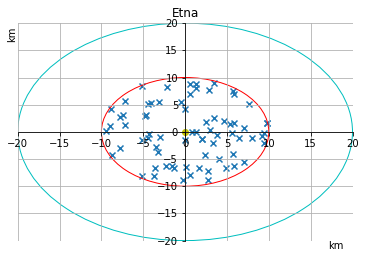

Zubair Group


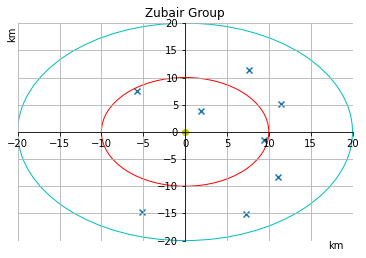

Dallol


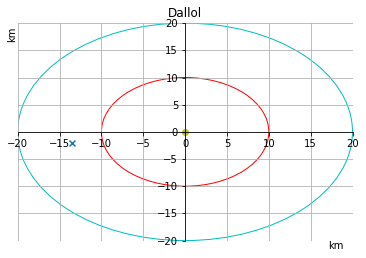

Nabro


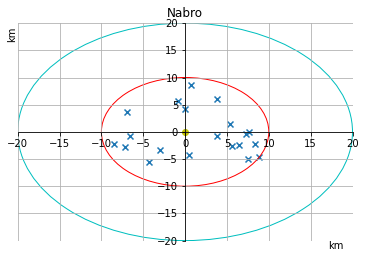

Dabbahu


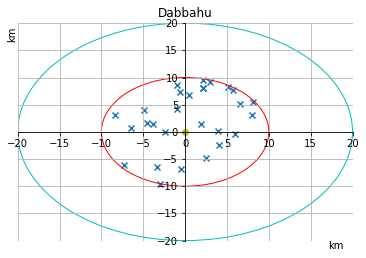

Manda Hararo


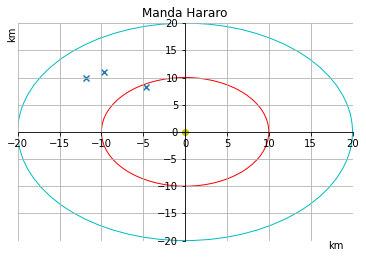

Ardoukoba


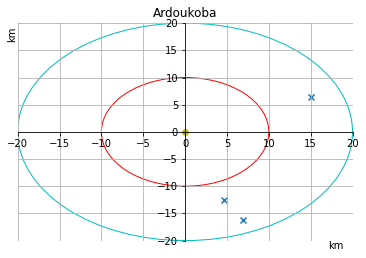

Lengai, Ol Doinyo


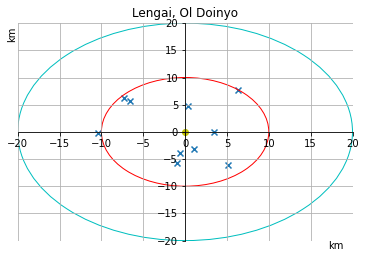

Nyamulagira


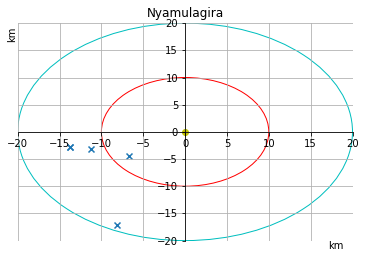

Nyiragongo


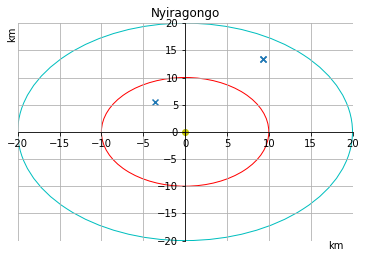

Fournaise, Piton de la


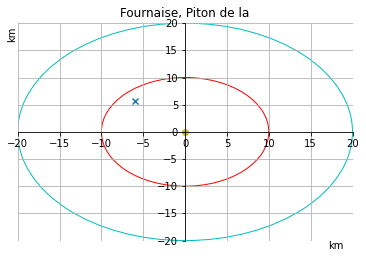

McDonald Islands


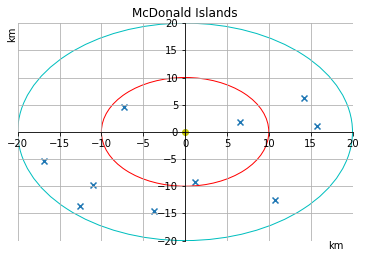

Marion Island


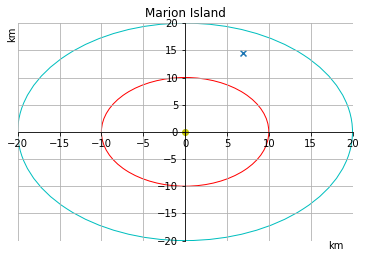

Whakaari_White Island


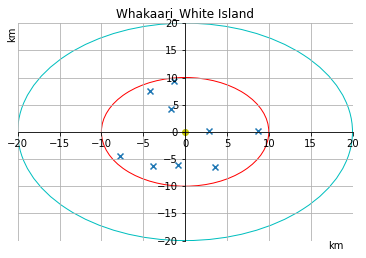

Okataina


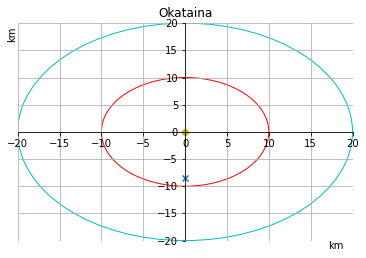

Tongariro


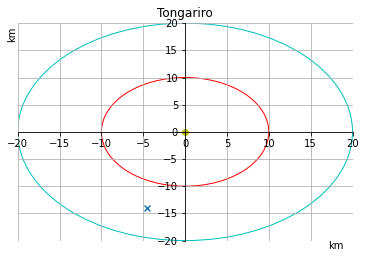

Ruapehu


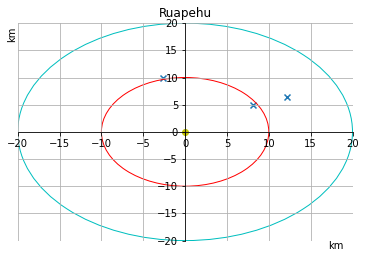

Raoul Island


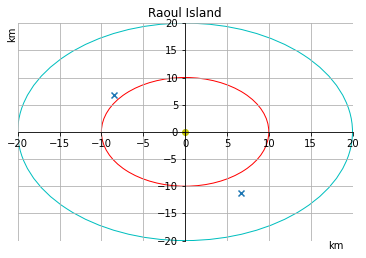

Monowai


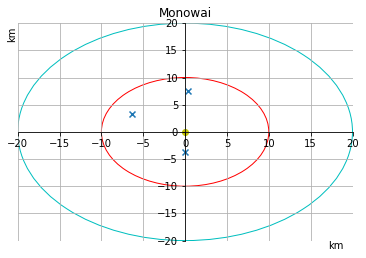

Unnamed


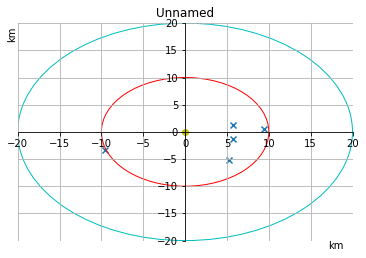

Hunga Tonga-Hunga Ha'apai


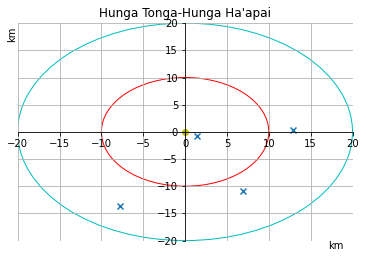

Tofua


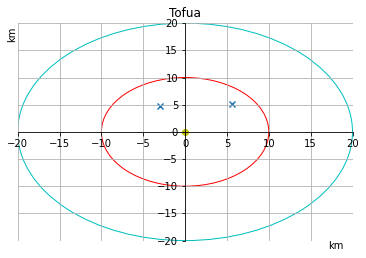

Lateiki


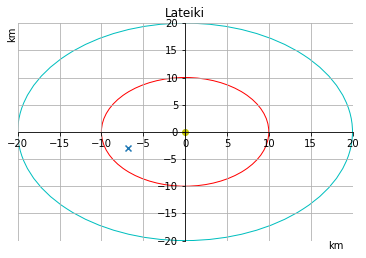

Home Reef


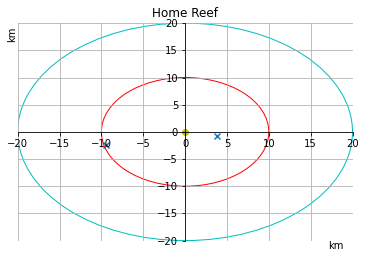

Unnamed


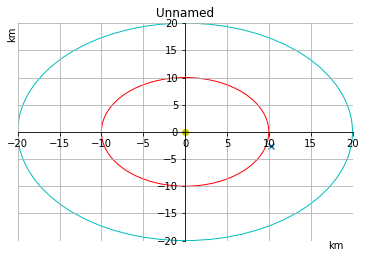

Tafu-Maka


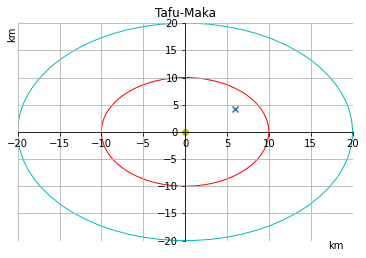

West Mata


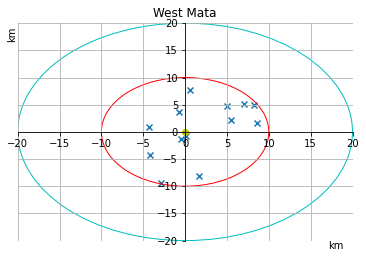

Kadovar


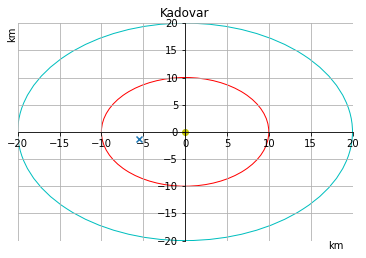

Manam


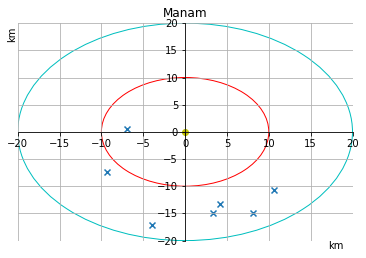

Long Island


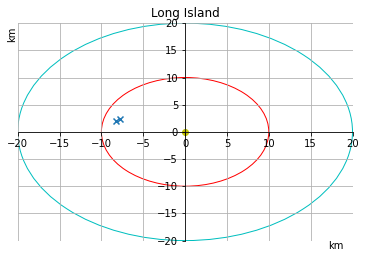

Ritter Island


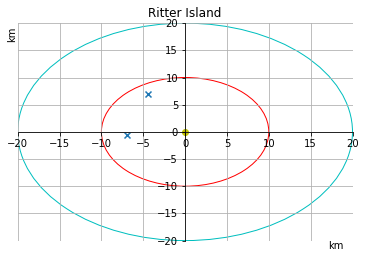

Langila


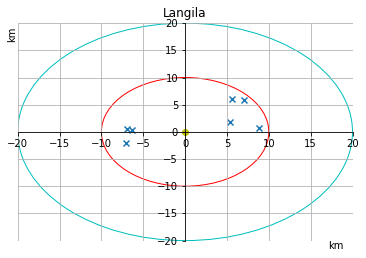

Krummel-Garbuna-Welcker


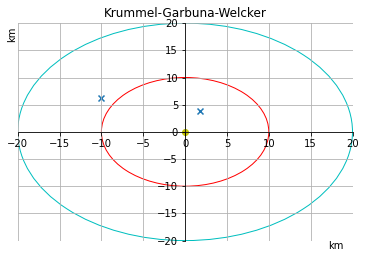

Witori


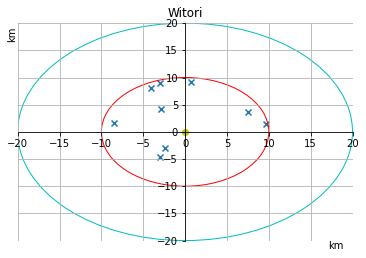

Ulawun


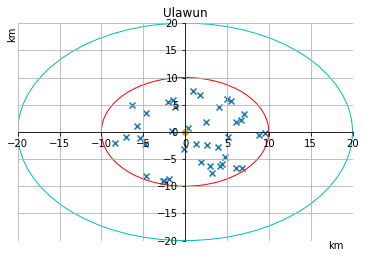

Rabaul


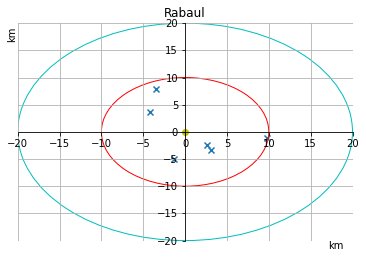

Kavachi


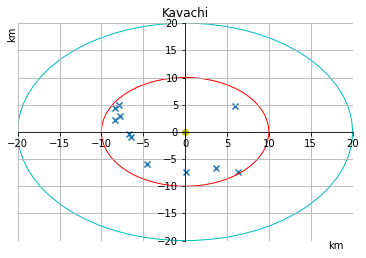

Tinakula


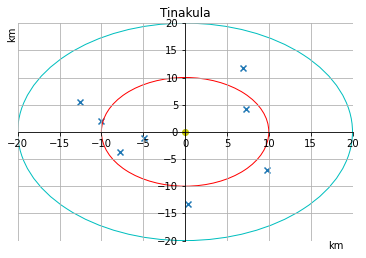

Gaua


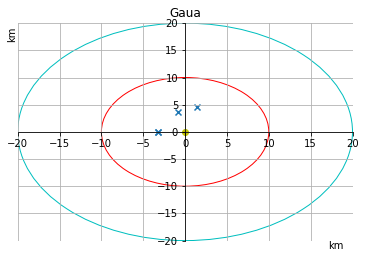

Ambae


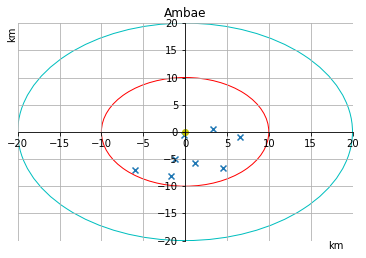

Ambrym


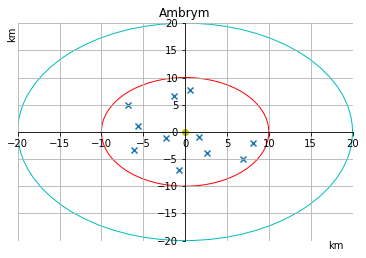

Lopevi


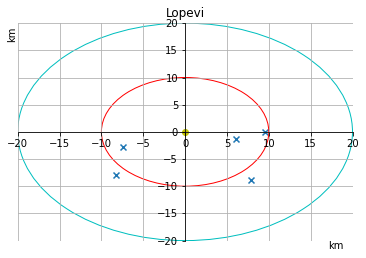

Eastern Gemini Seamount


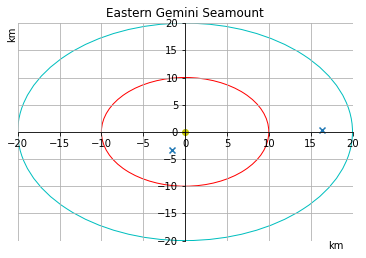

Barren Island


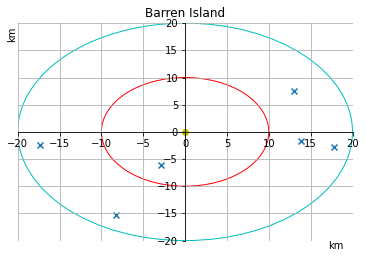

Sinabung


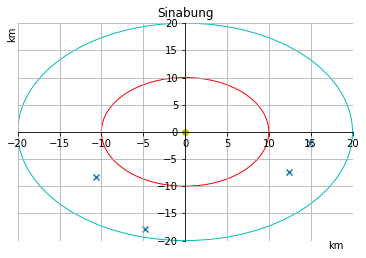

Marapi


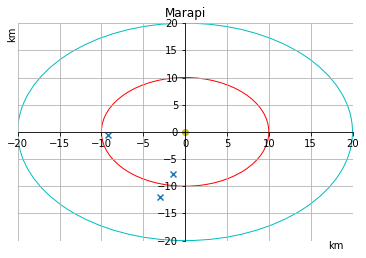

Talang


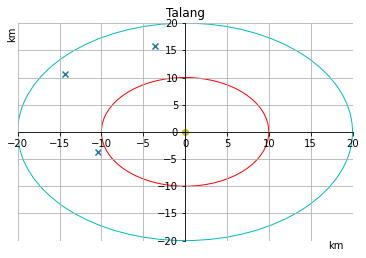

Kerinci


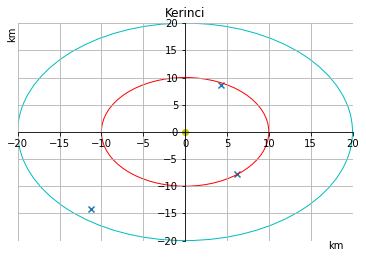

Kaba


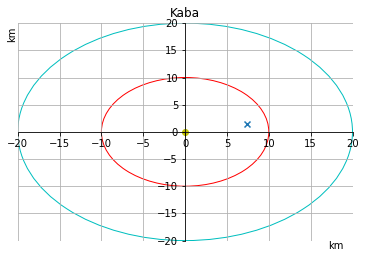

Dempo


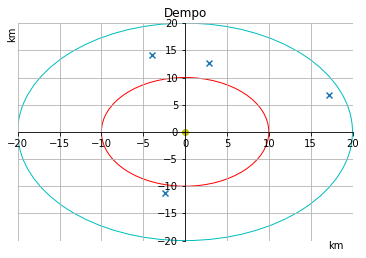

Krakatau


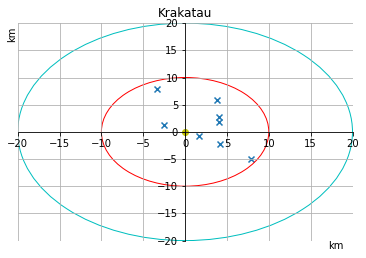

Tangkuban Parahu


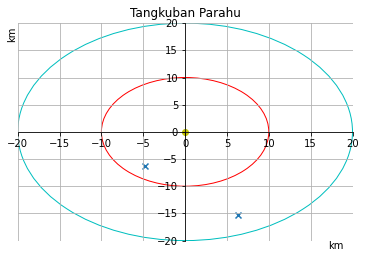

Papandayan


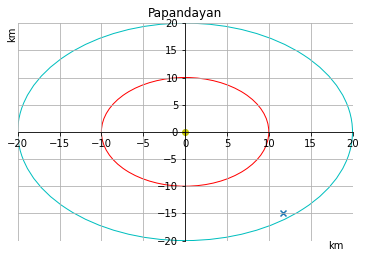

Slamet


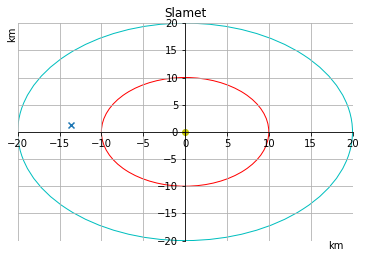

Dieng Volcanic Complex


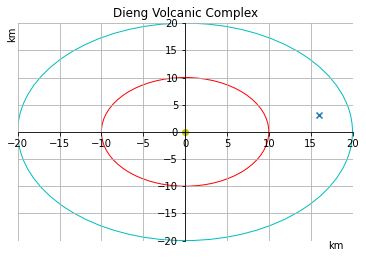

Kelut


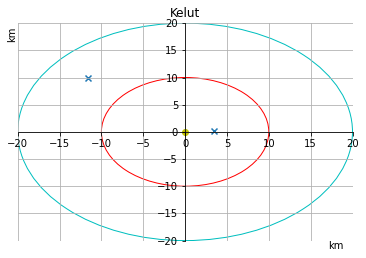

Tengger Caldera


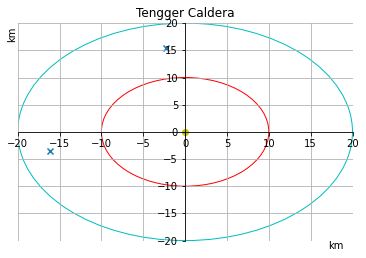

Raung


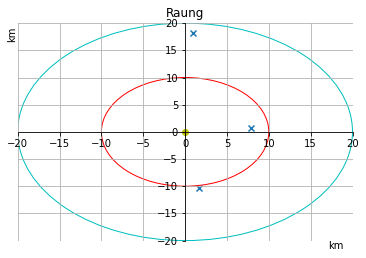

Batur


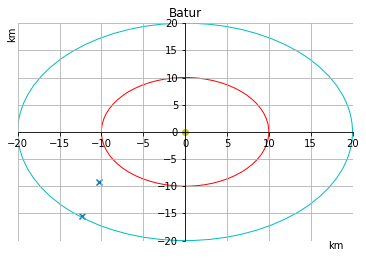

Agung


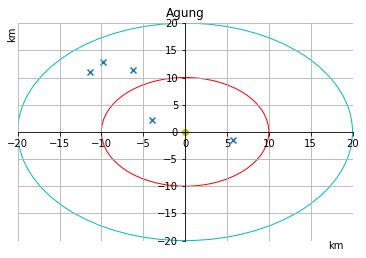

Sangeang Api


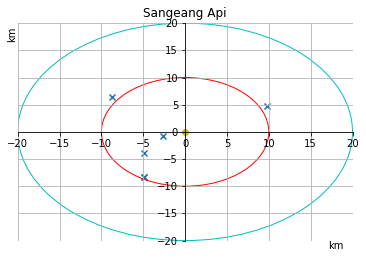

Inielika


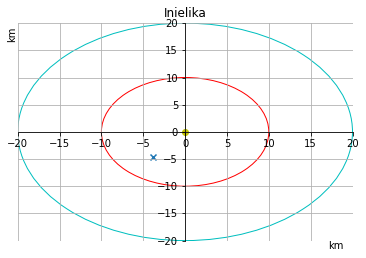

Paluweh


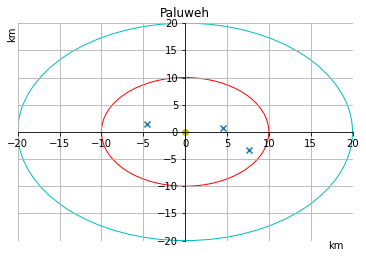

Egon


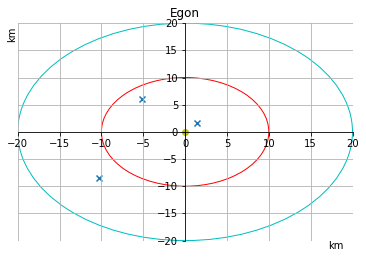

Lewotobi


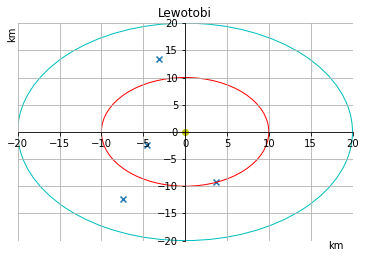

Leroboleng


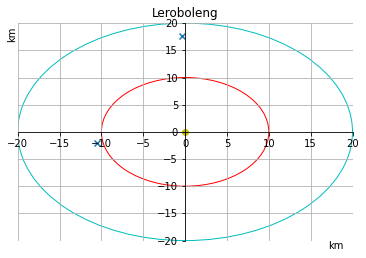

Iliboleng


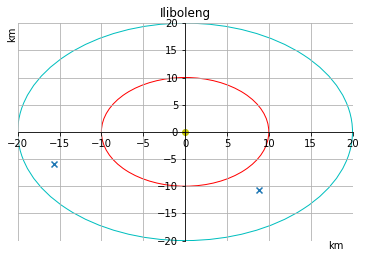

Lewotolok


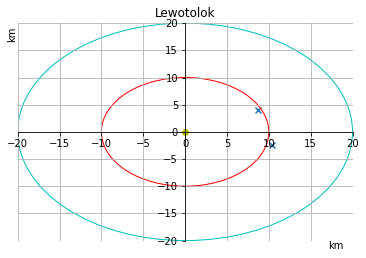

Iliwerung


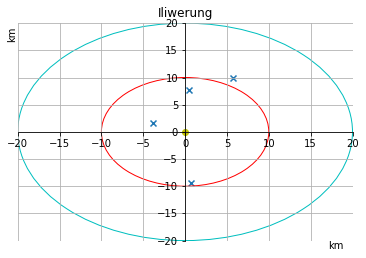

Tara, Batu


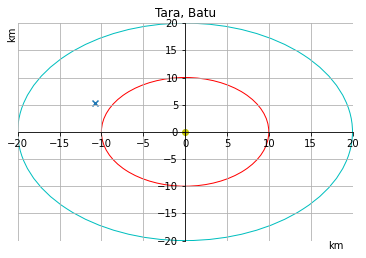

Sirung


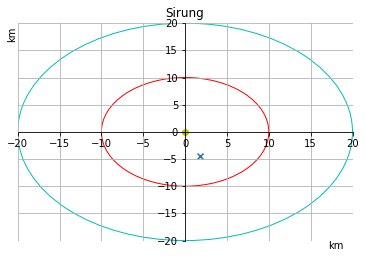

Colo


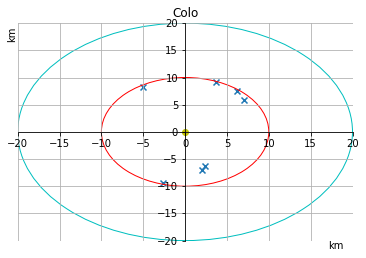

Soputan


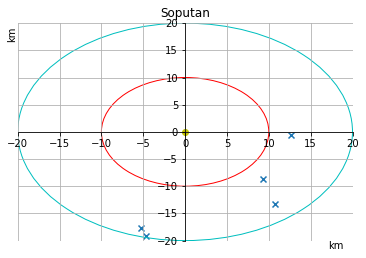

Lokon-Empung


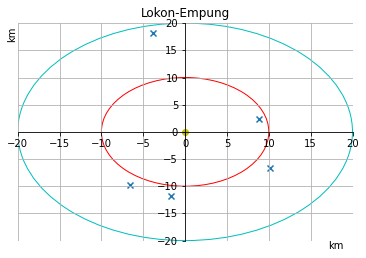

Karangetang


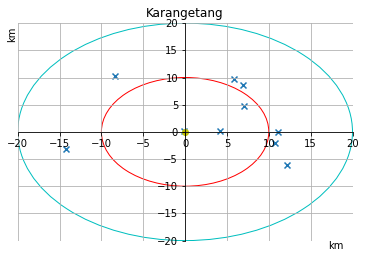

Awu


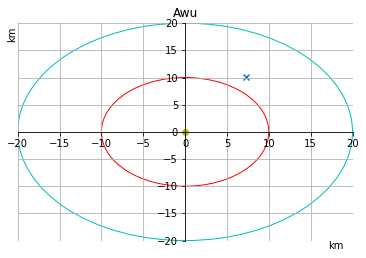

Ibu


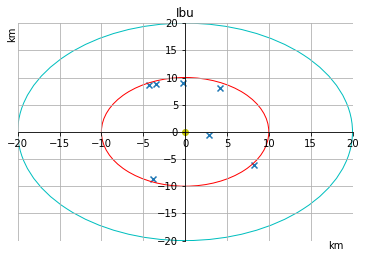

Gamkonora


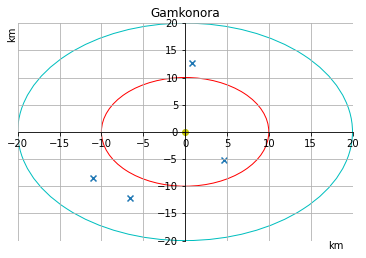

Gamalama


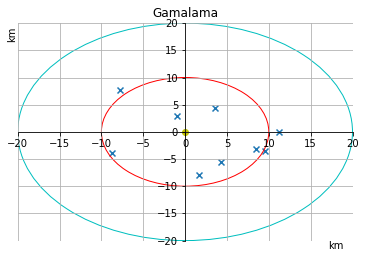

Kanlaon


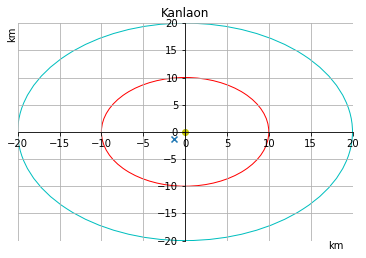

Bulusan


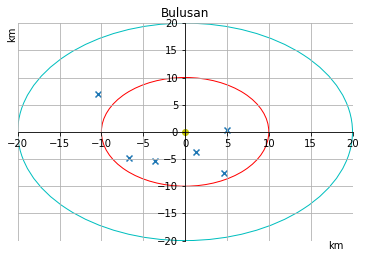

Mayon


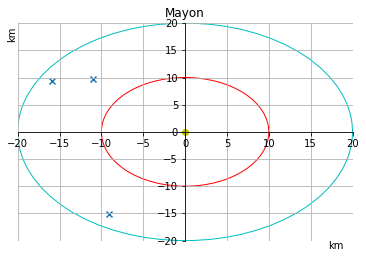

Taal


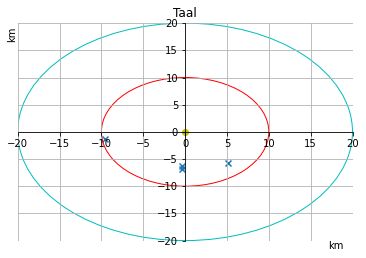

Pinatubo


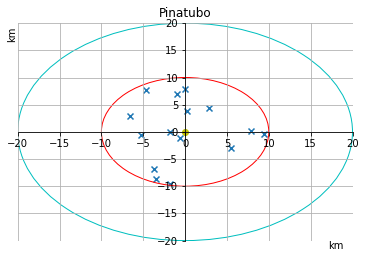

Suwanosejima


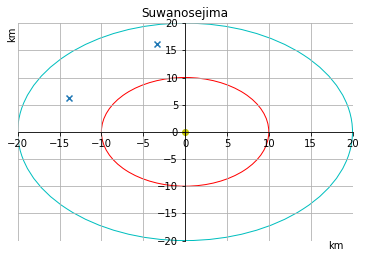

Kuchinoerabujima


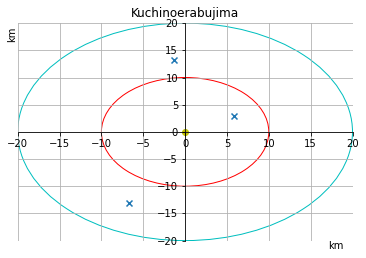

Kikai


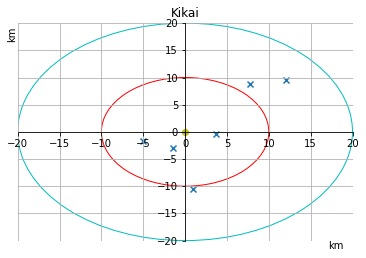

Kirishimayama


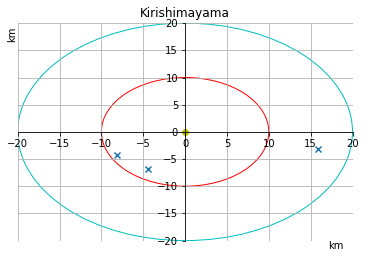

Asosan


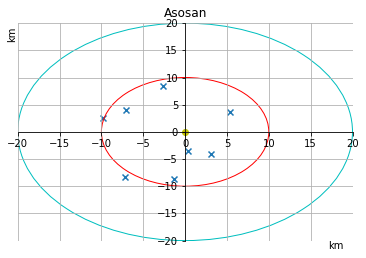

Izu-Tobu


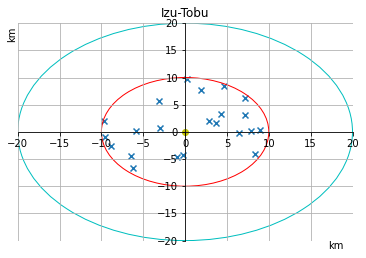

Hakoneyama


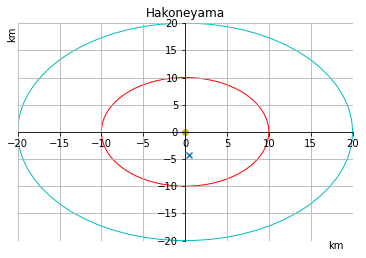

Niigata-Yakeyama


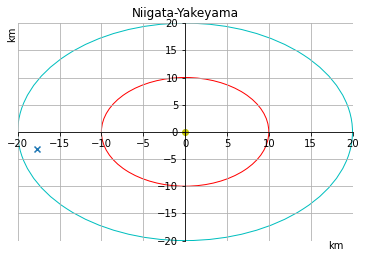

Asamayama


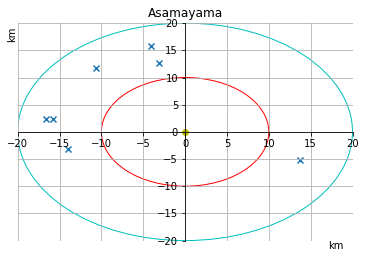

Adatarayama


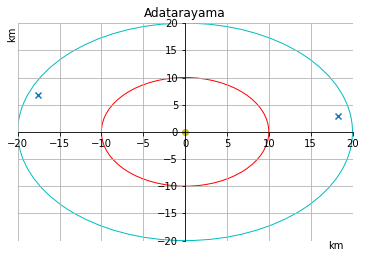

Akita-Yakeyama


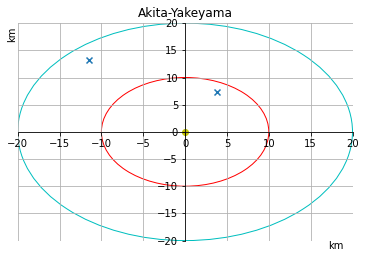

Izu-Oshima


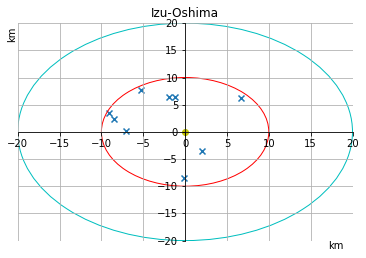

Miyakejima


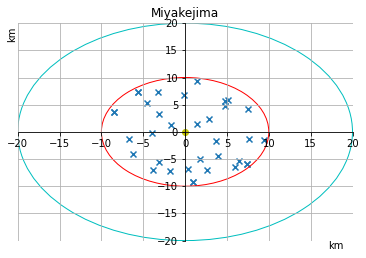

Izu-Torishima


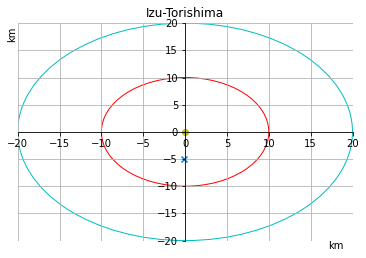

Kaitoku Seamount


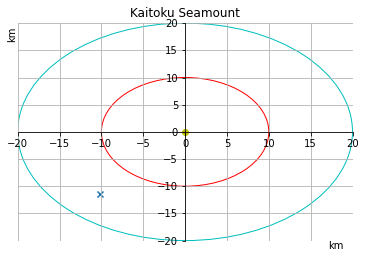

Ioto


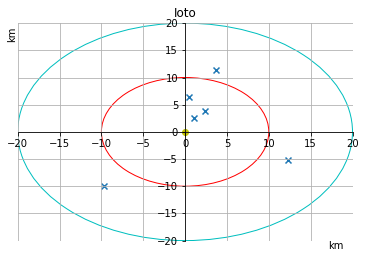

Fukutoku-Oka-no-Ba


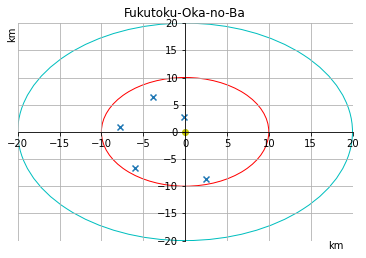

Ahyi


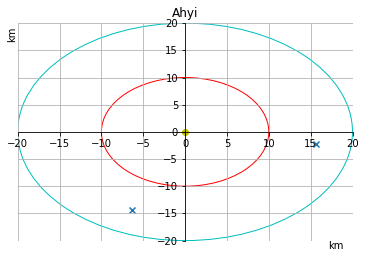

Supply Reef


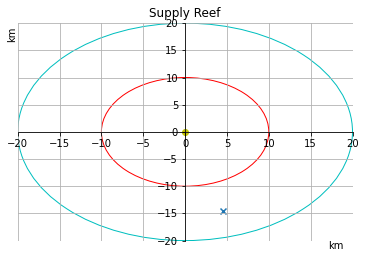

Pagan


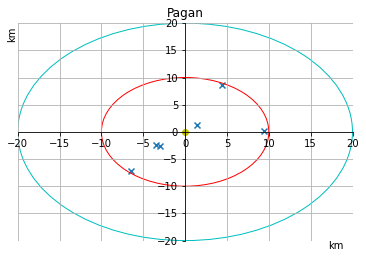

Anatahan


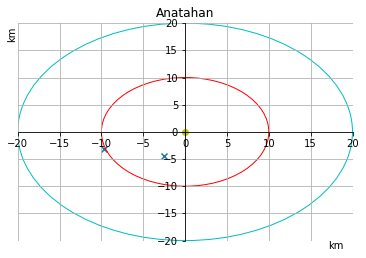

Hokkaido-Komagatake


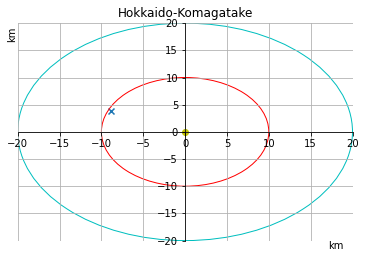

Toya


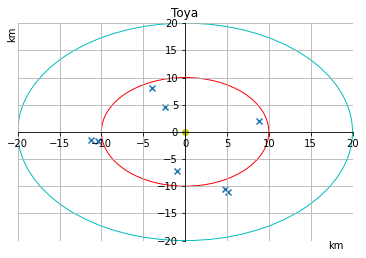

Shikotsu


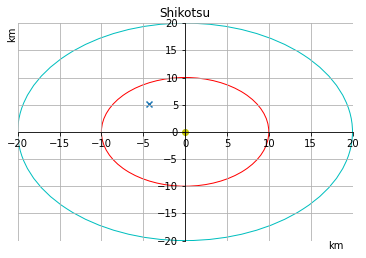

Tokachidake


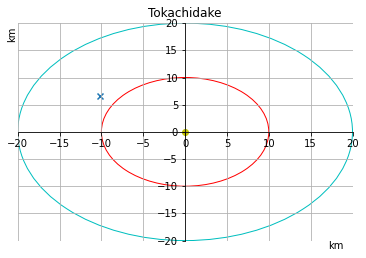

Akan


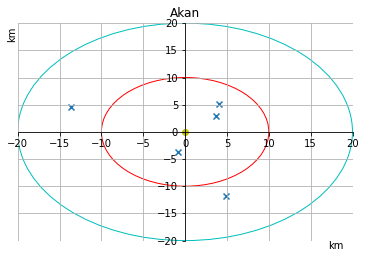

Chachadake [Tiatia]


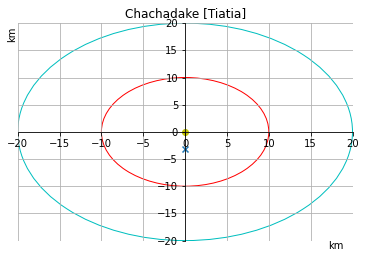

Moyorodake [Medvezhia]


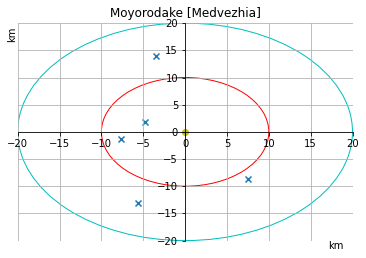

Chirpoi


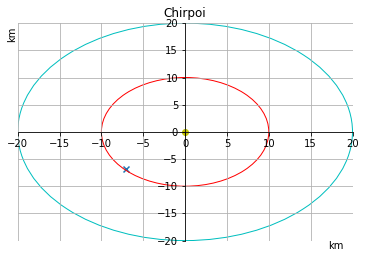

Sarychev Peak


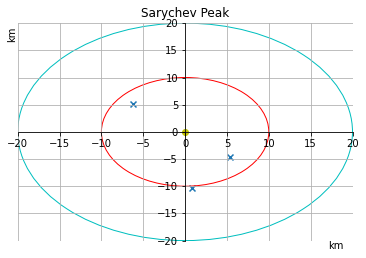

Raikoke


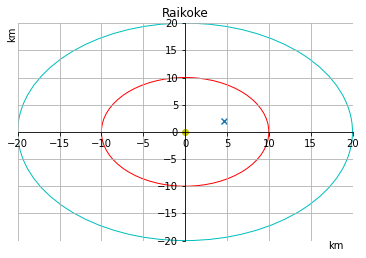

Chirinkotan


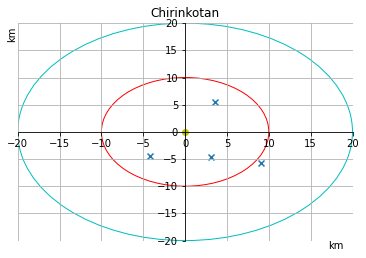

Ekarma


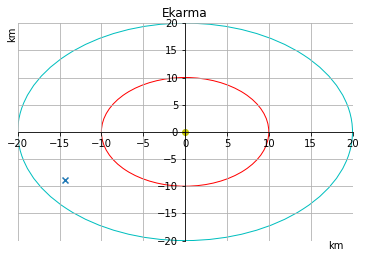

Chikurachki


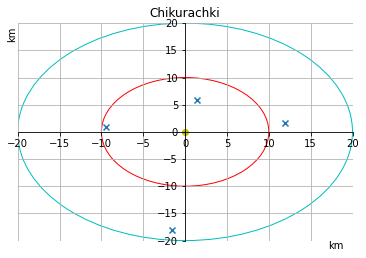

Ebeko


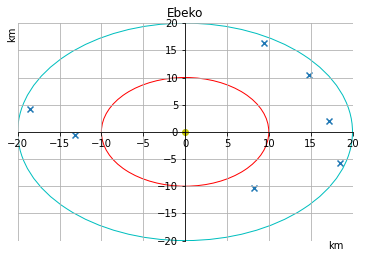

Alaid


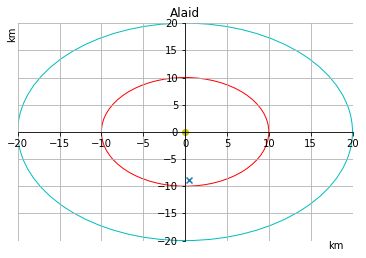

Kambalny


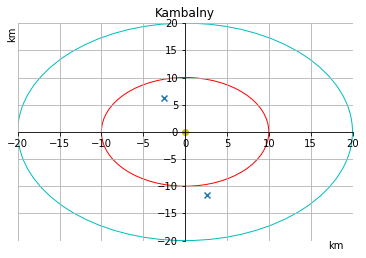

Mutnovsky


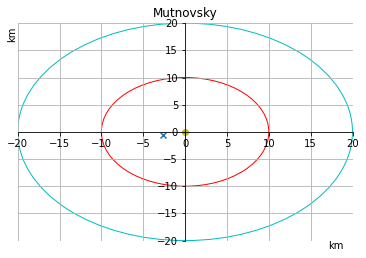

Gorely


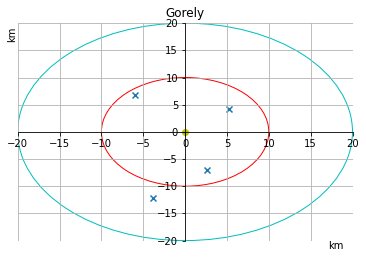

Koryaksky


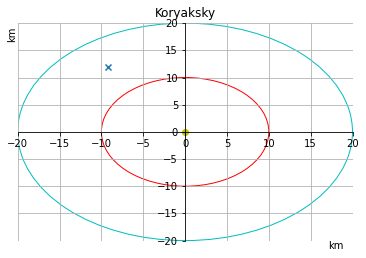

Avachinsky


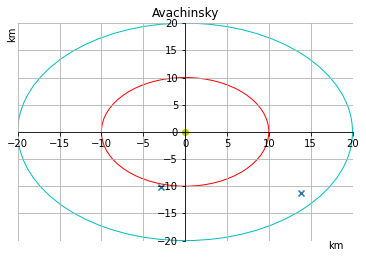

Akademia Nauk


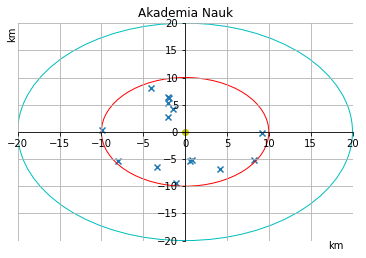

Zhupanovsky


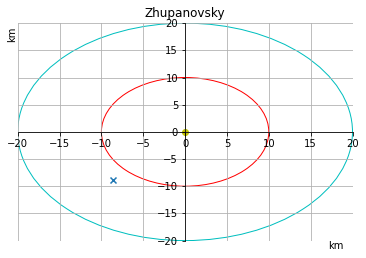

Karymsky


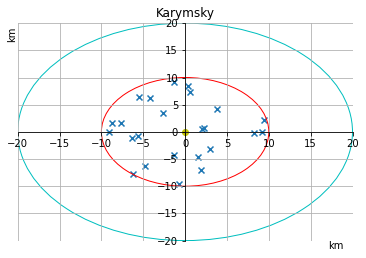

Kizimen


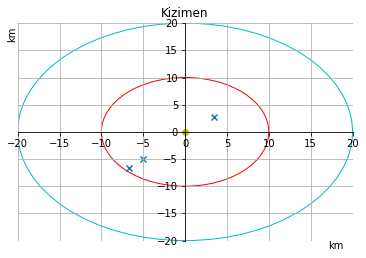

Bezymianny


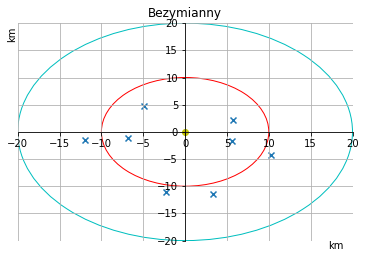

Klyuchevskoy


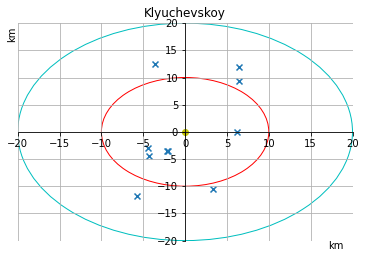

Sheveluch


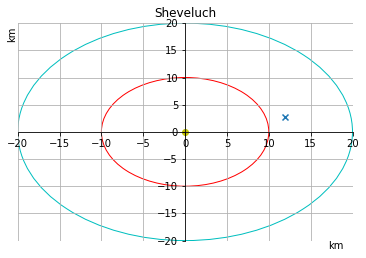

Semisopochnoi


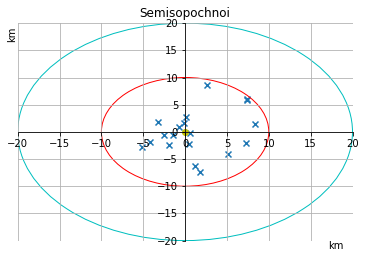

Kanaga


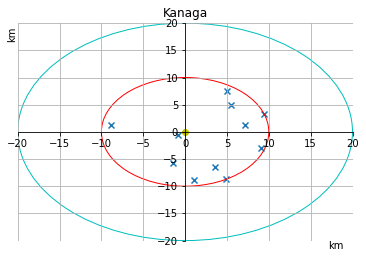

Great Sitkin


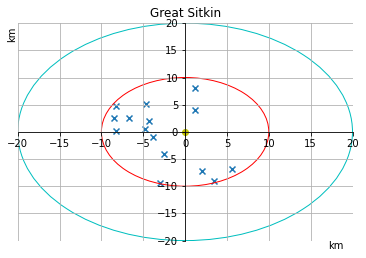

Kasatochi


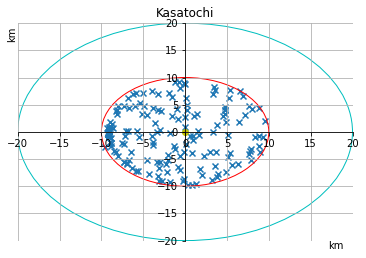

Korovin


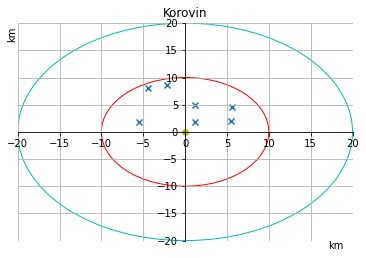

Cleveland


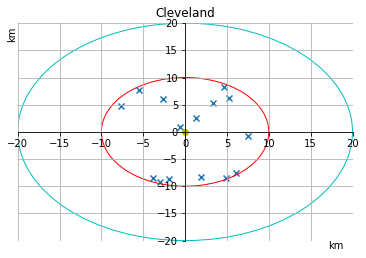

Okmok


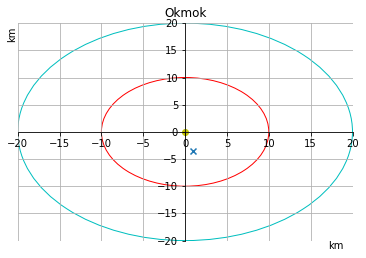

Makushin


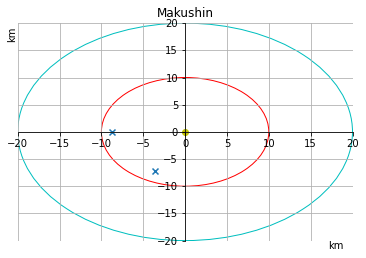

Shishaldin


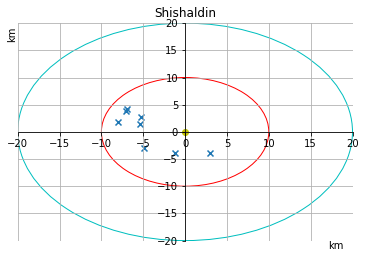

Pavlof


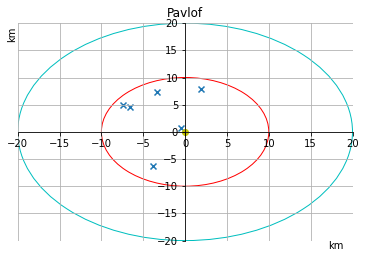

Veniaminof


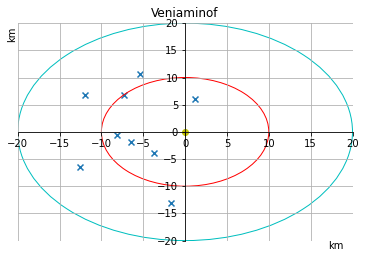

Augustine


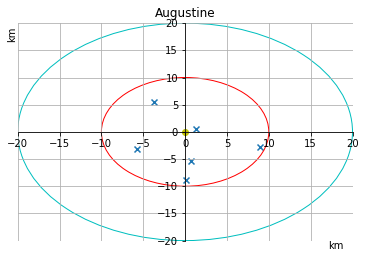

Redoubt


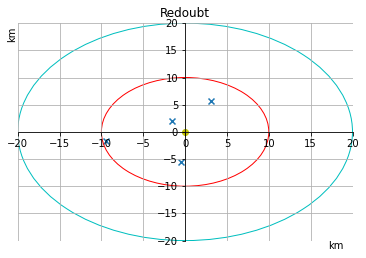

Spurr


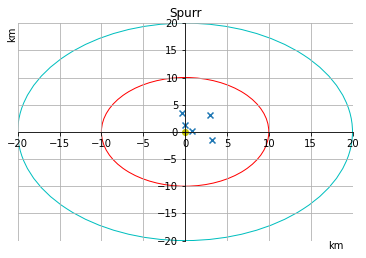

St. Helens


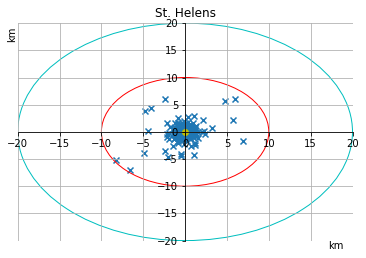

Loihi


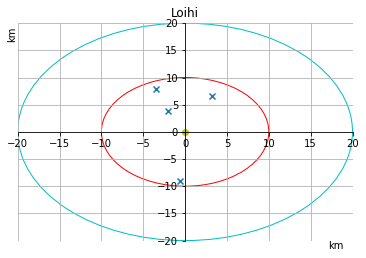

Kilauea


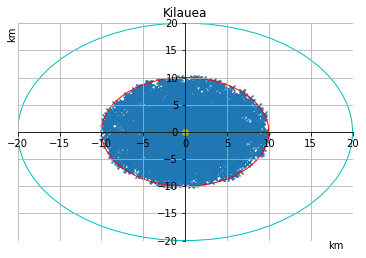

Mauna Loa


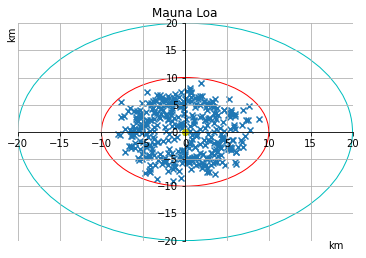

Northern EPR at 9.8°N


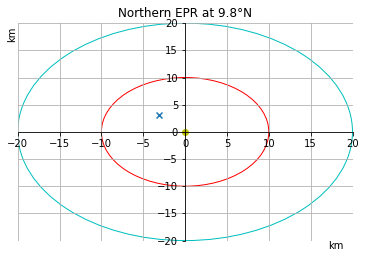

Colima


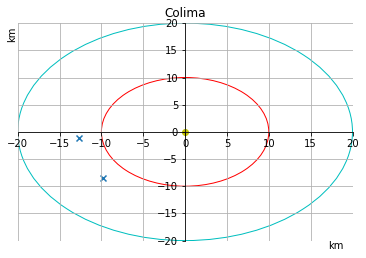

Popocatepetl


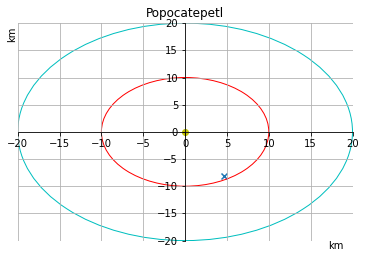

Tacana


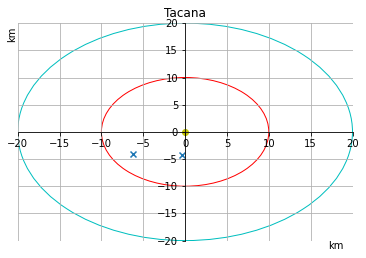

Fuego


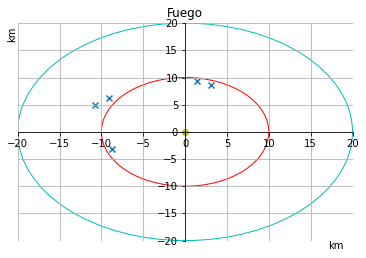

Pacaya


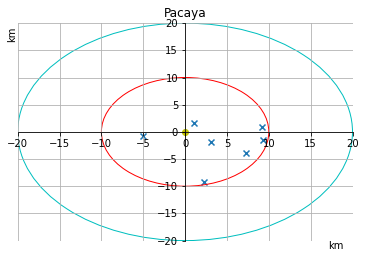

Santa Ana


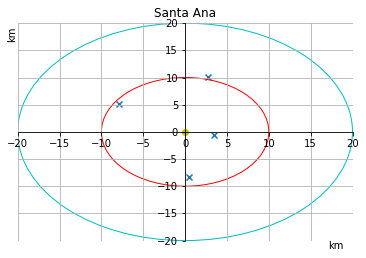

San Miguel


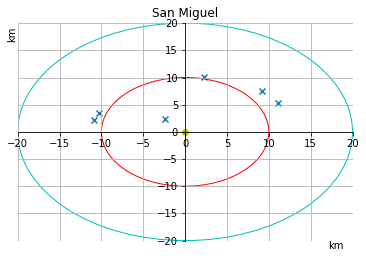

San Cristobal


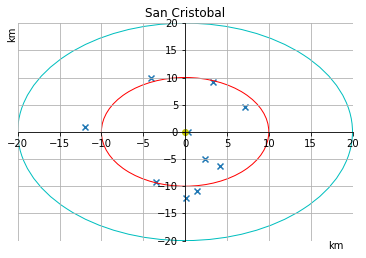

Telica


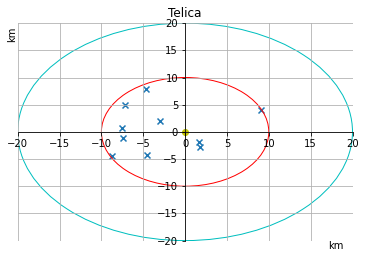

Negro, Cerro


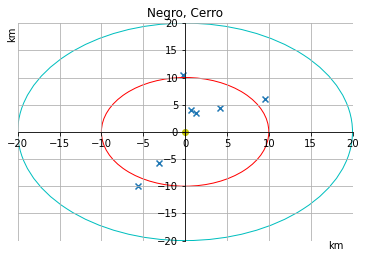

Masaya


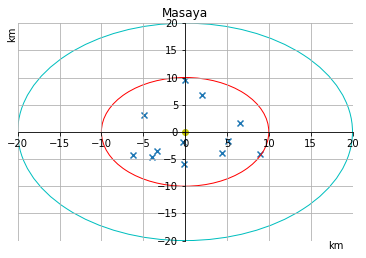

Concepcion


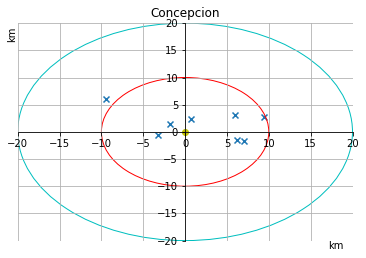

Rincon de la Vieja


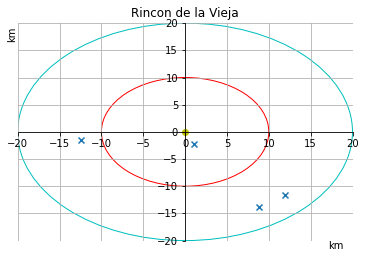

Poas


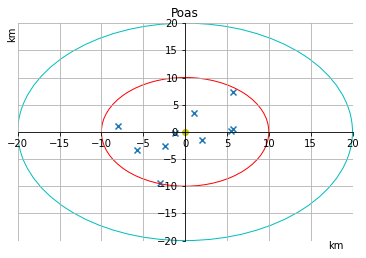

Irazu


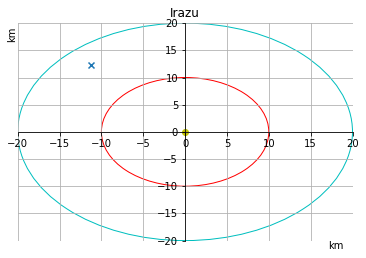

Turrialba


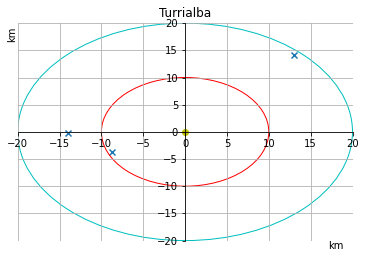

Ruiz, Nevado del


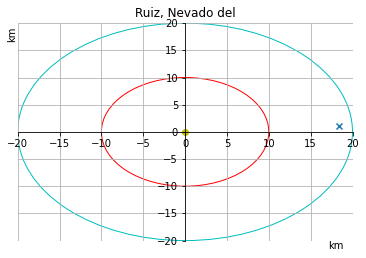

Huila, Nevado del


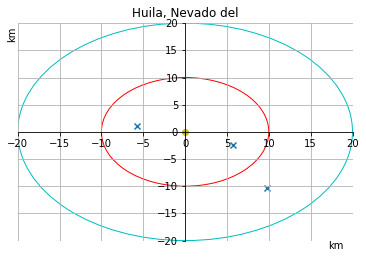

Galeras


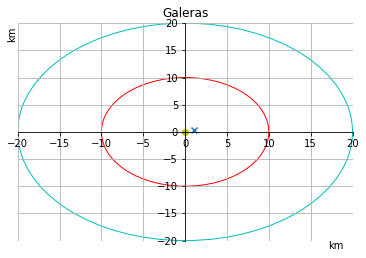

Guagua Pichincha


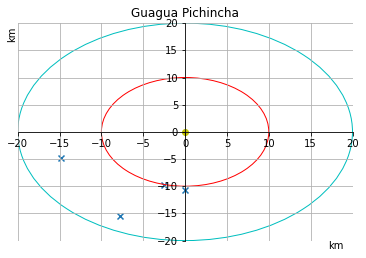

Fernandina


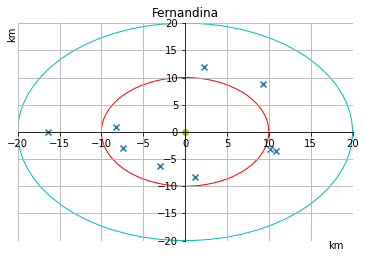

Wolf


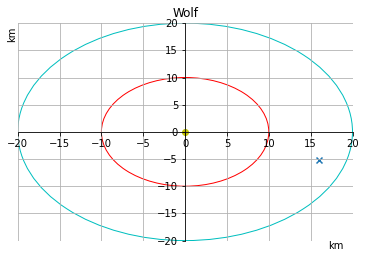

Negra, Sierra


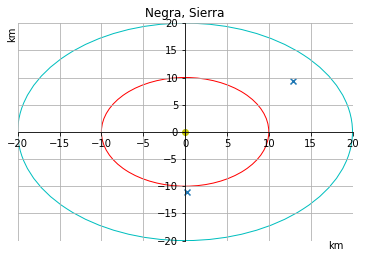

Sabancaya


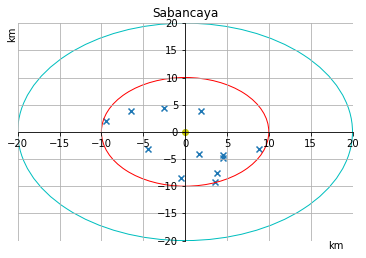

Ubinas


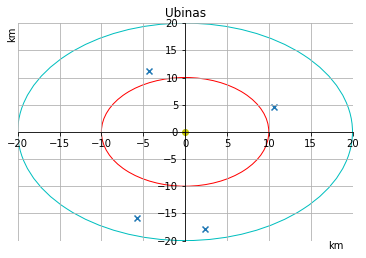

Lascar


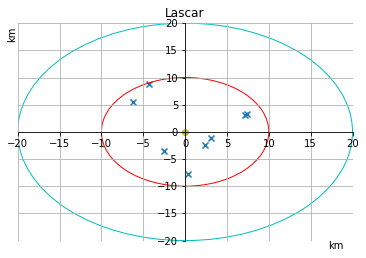

Planchon-Peteroa


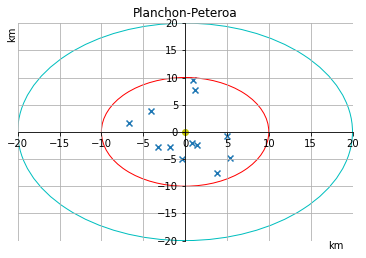

Copahue


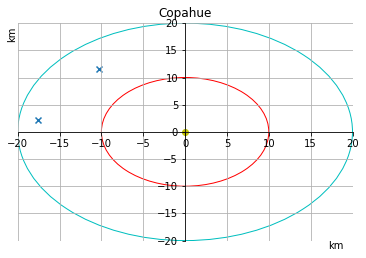

Lonquimay


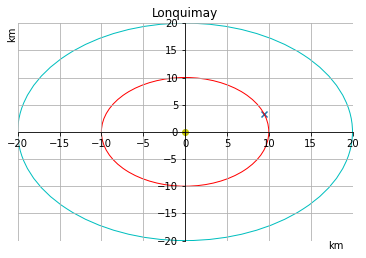

Llaima


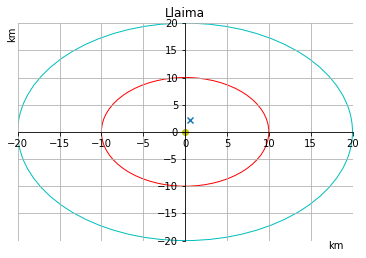

Puyehue-Cordon Caulle


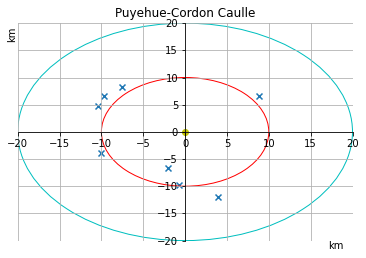

Calbuco


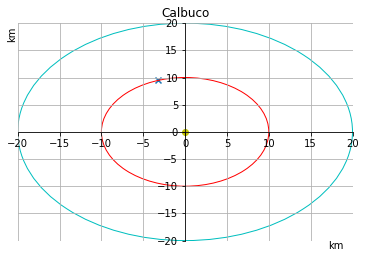

Hudson, Cerro


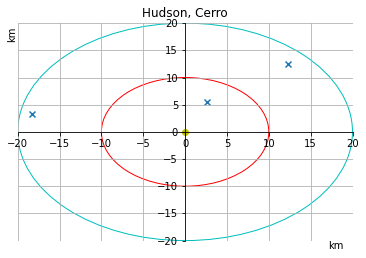

Soufriere Hills


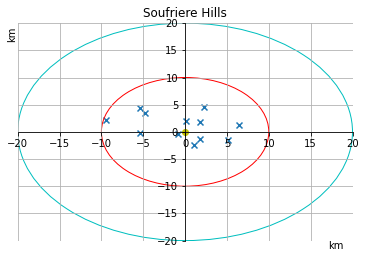

Soufriere St. Vincent


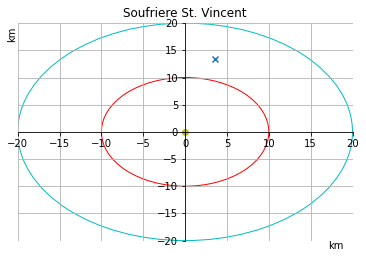

Kick 'em Jenny


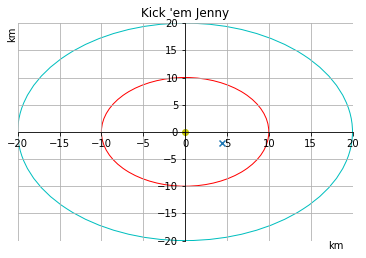

Hekla


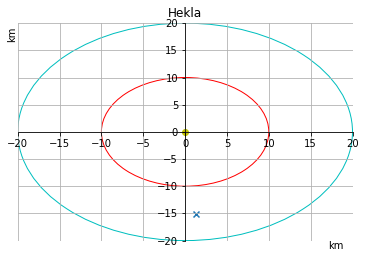

Grimsvotn


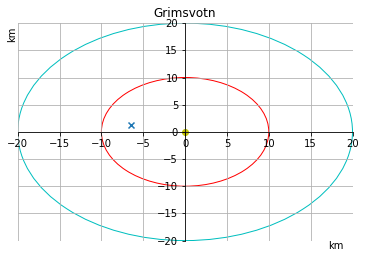

Bardarbunga


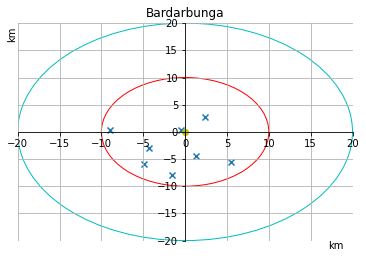

Krafla


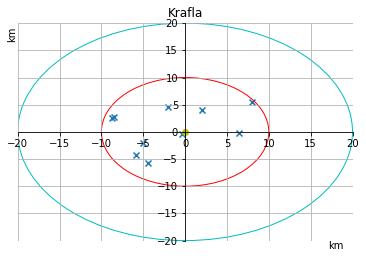

Jan Mayen


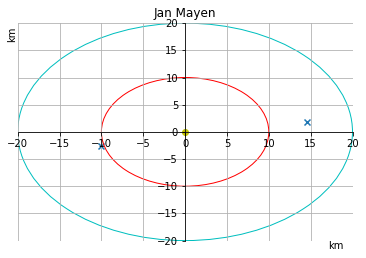

East Gakkel Ridge at 85°E


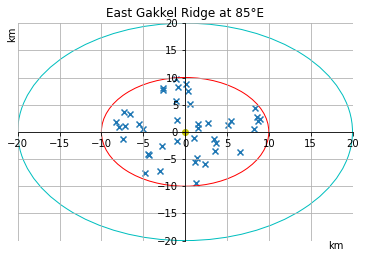

Fogo


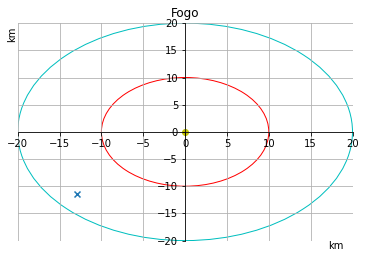

Nightingale Island


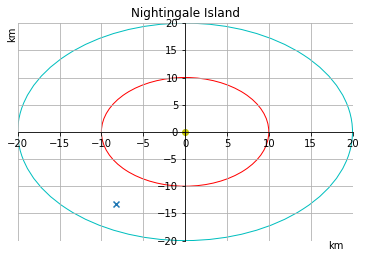

Bristol Island


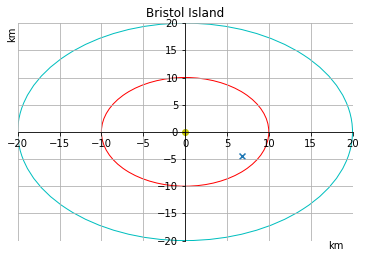

Saunders


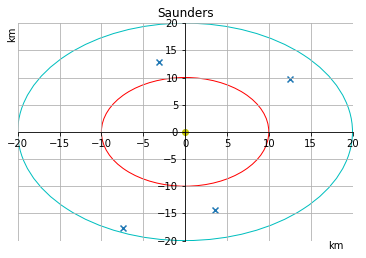

Zavodovski


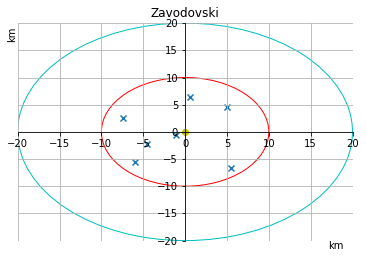

Havre Seamount


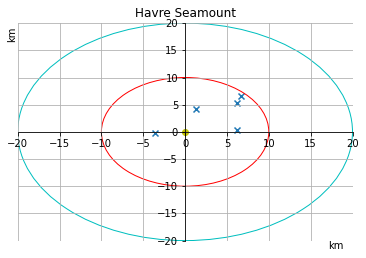

In [32]:
namra = g.volcano_name.unique()
for i in namra:
    Volcano_Lati = volcano_nonconti.loc[volcano_nonconti["VolcanoNumber"] == int(i)].LatitudeDecimal.unique()
    Volcano_Longi = volcano_nonconti[volcano_nonconti["VolcanoNumber"] == int(i)].LongitudeDecimal.unique()
    earthquake_221_lati = g.loc[g["volcano_name"] == i].latitude.values
    earthquakeid = g.loc[g['volcano_name'] == i].id.values
    n = 0
    distance = np.zeros(len(earthquakeid))
    for j in earthquakeid:
        distance[n] = df.loc[df["earthquake_id"] == j][str(i)].values
        n = n + 1
    earthquake_221_longi = g[g["volcano_name"] == i].longitude.values
    deltaLongi = np.ones(len(earthquake_221_longi))*Volcano_Longi - earthquake_221_longi
    X = np.cos(earthquake_221_lati)*np.sin(deltaLongi)
    Y = np.cos(Volcano_Lati)*np.sin(earthquake_221_lati) - np.sin(Volcano_Lati)*np.cos(earthquake_221_lati)*np.cos(deltaLongi)
    bearing = np.arctan2(X,Y)
    bearing = np.degrees(bearing)
    #print(bearing)
    #print(distance)
    x_axis = distance * np.cos((bearing + 90))
    y_axis = distance * np.sin((bearing + 90))
    #im = plt.imread(r"C:\Users\rusha\OneDrive\Pictures\Etna.png")
    #implot = plt.imshow(im)
    ax = plt.gca()

    ax.scatter(x_axis, y_axis, marker ="x")
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.xlabel("km")
    plt.ylabel("km")
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    ax.xaxis.set_label_coords(0.95, -0.001)
    ax.yaxis.set_label_coords(-0.001, 0.95)
    title = volcano_nonconti[volcano_nonconti["VolcanoNumber"] == int(i)].VolcanoName.unique()[0]
    title = str(title)
    title = title.replace("/", "_")
    print(title)
    plt.title(str(title))
    ax.scatter(0, 0, marker = "o", color = 'y')
    circle=plt.Circle((0,0),10, color = 'r', fill=False)
    circle1=plt.Circle((0,0),20, color = 'c', fill=False)
    ax.add_patch(circle)
    ax.add_patch(circle1)
    path = "E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_" + str(title) + ".png"
    plt.savefig(path)
    plt.show()

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_0.png


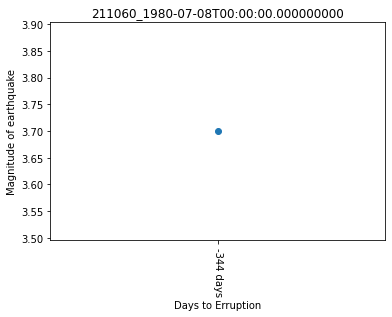

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_1.png


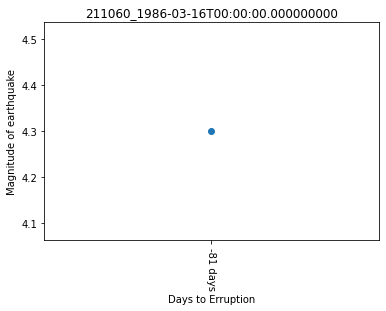

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_2.png


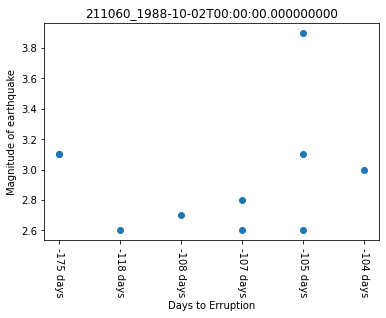

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_3.png


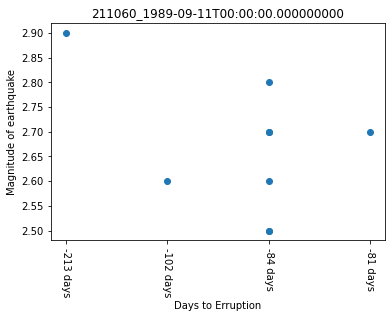

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_4.png


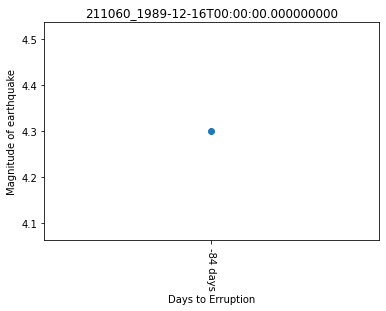

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_5.png


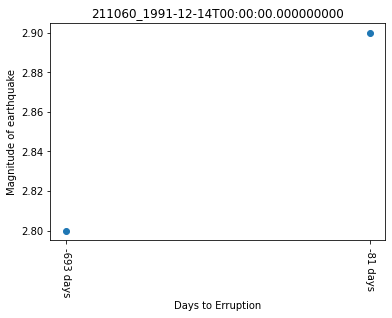

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_6.png


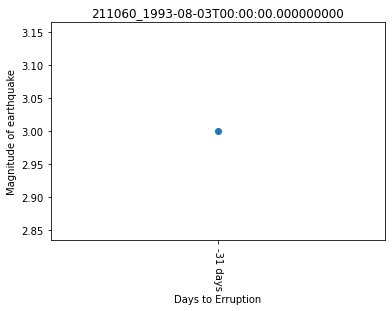

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_7.png


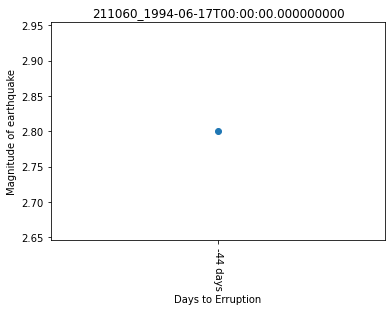

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_8.png


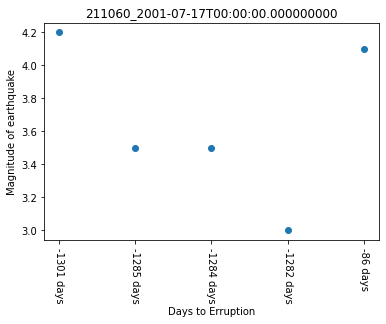

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_9.png


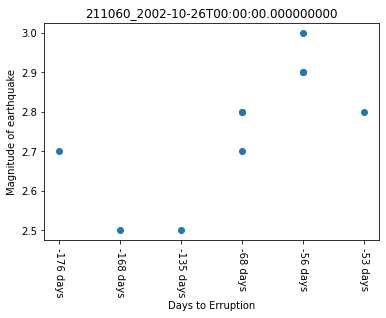

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_10.png


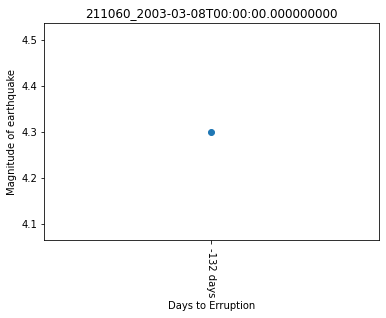

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_11.png


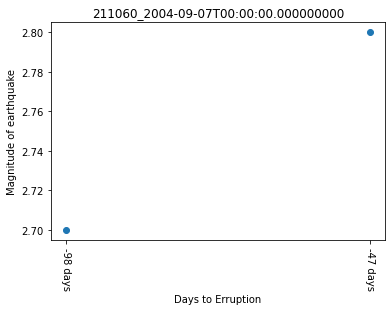

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_12.png


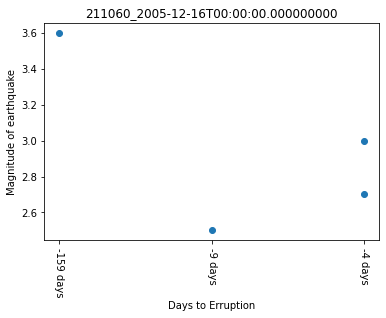

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_13.png


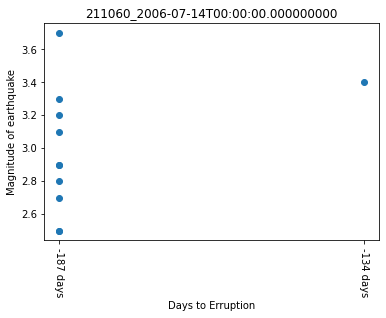

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_14.png


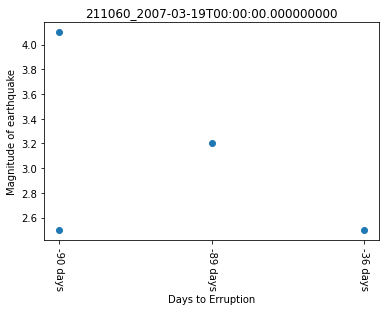

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_15.png


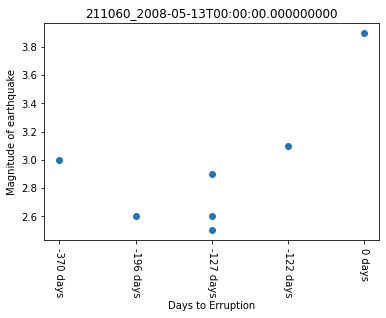

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_211060_16.png


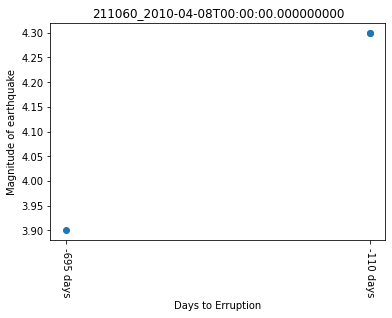

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_221020_0.png


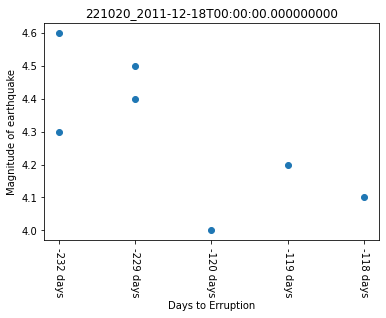

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_221020_1.png


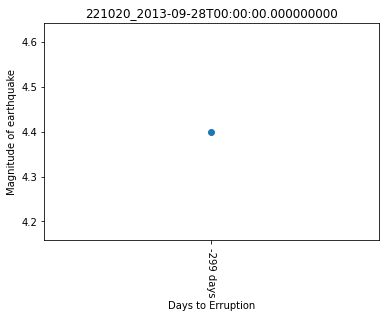

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_221041_0.png


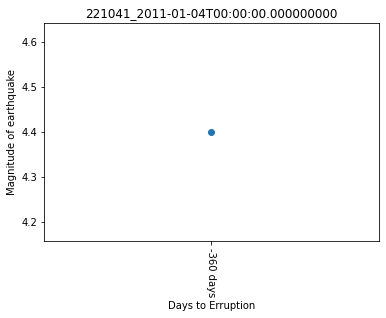

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_221101_0.png


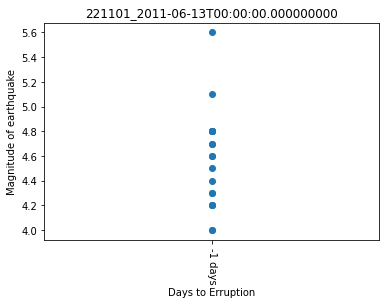

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_221113_0.png


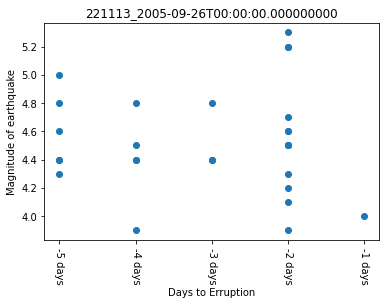

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_221115_0.png


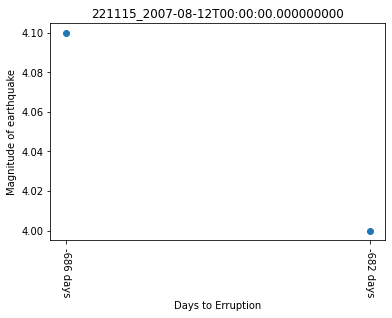

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_221115_1.png


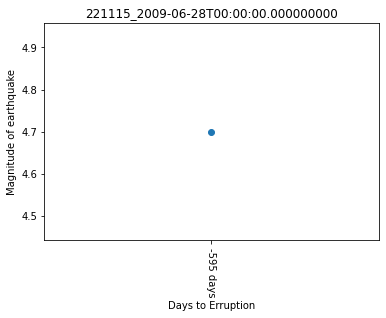

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_221126_0.png


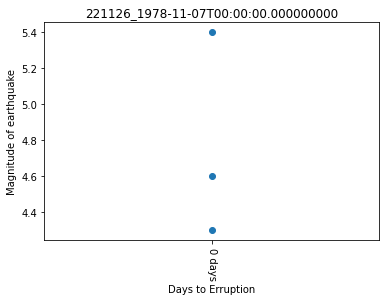

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_222120_0.png


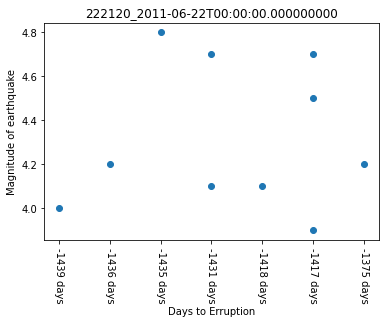

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_223020_0.png


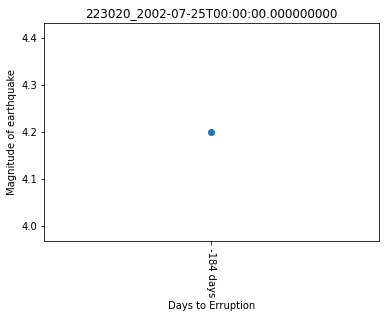

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_223020_1.png


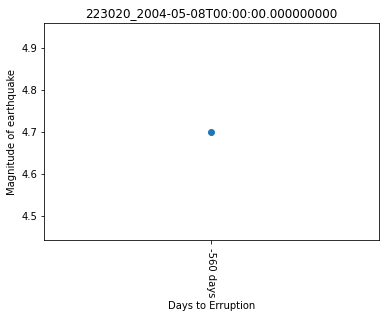

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_223020_2.png


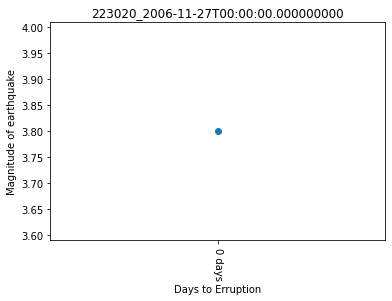

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_223020_3.png


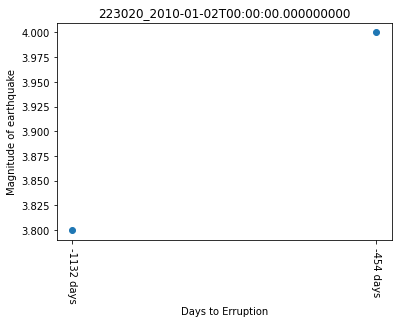

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_223030_0.png


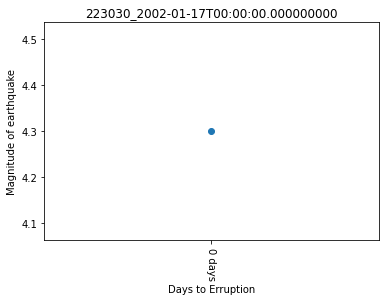

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_223030_1.png


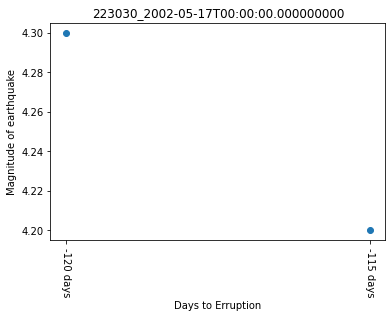

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_233020_0.png


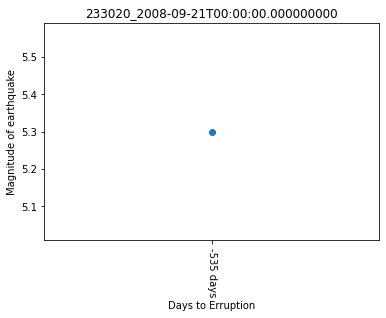

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_234011_0.png


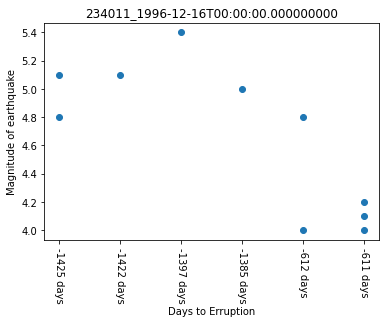

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_234070_0.png


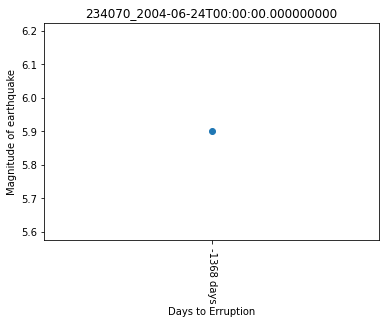

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_241040_0.png


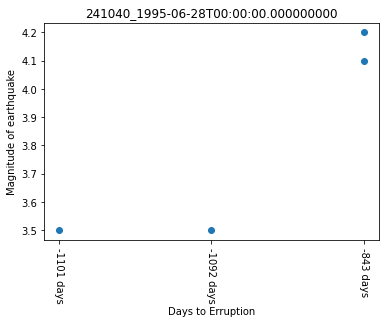

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_241040_1.png


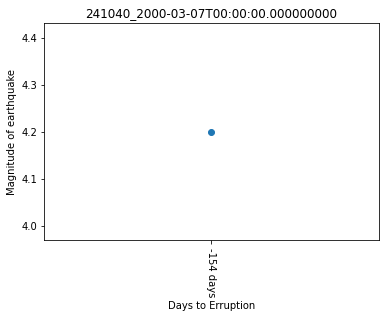

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_241040_2.png


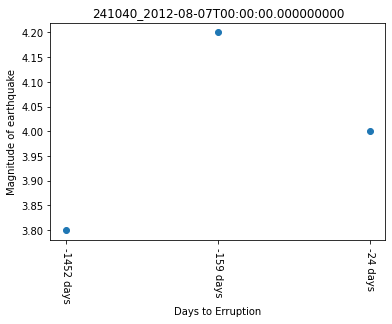

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_241040_3.png


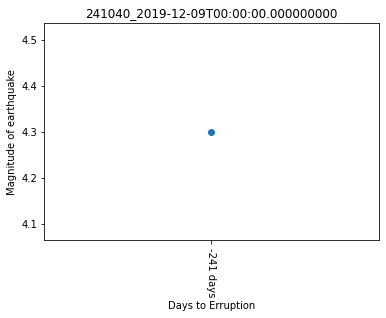

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_241050_0.png


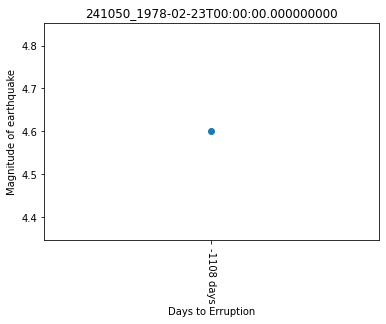

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_241080_0.png


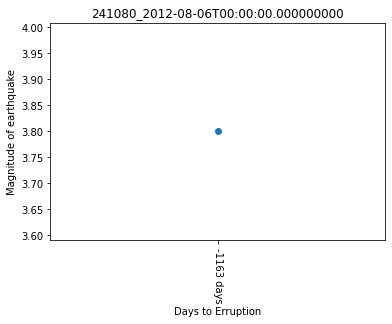

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_241100_0.png


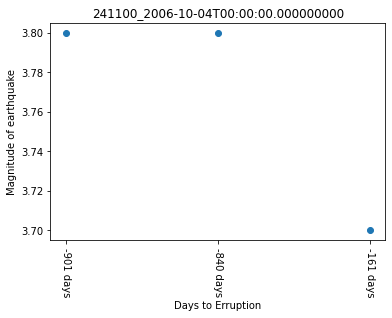

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_242030_0.png


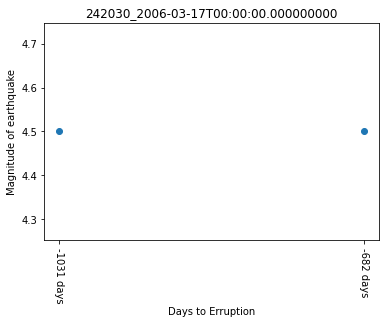

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_242050_0.png


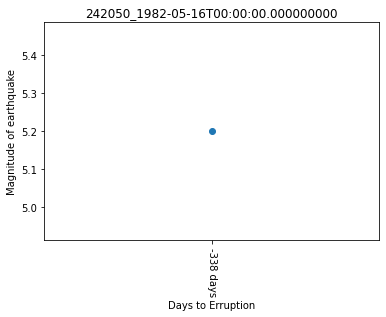

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_242050_1.png


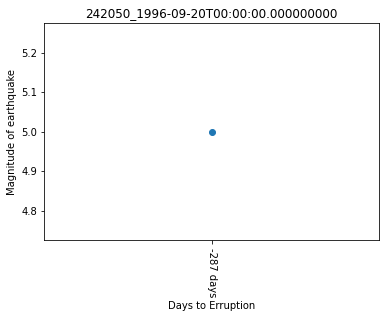

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_242050_2.png


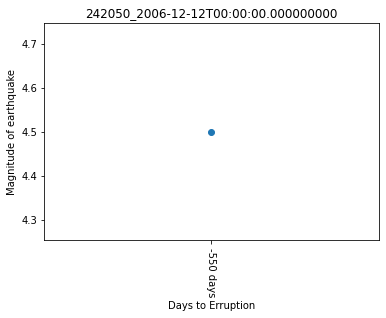

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_243030_0.png


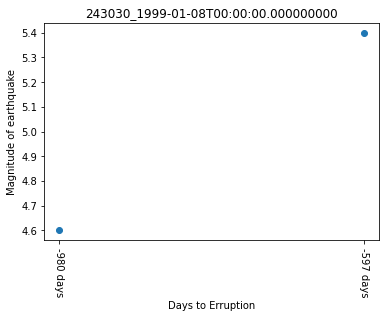

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_243030_1.png


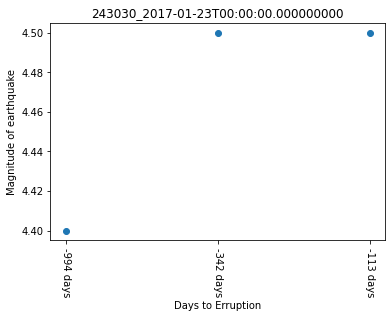

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_243040_0.png


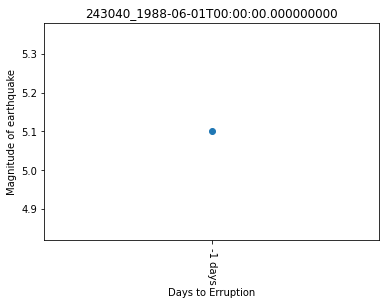

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_243040_1.png


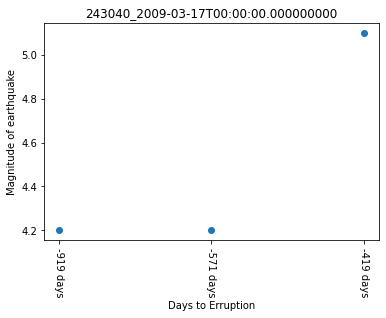

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_243060_0.png


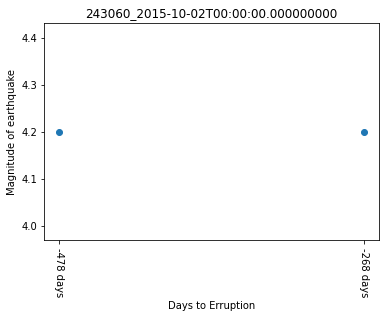

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_243070_0.png


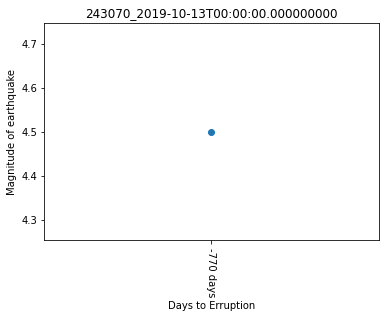

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_243080_0.png


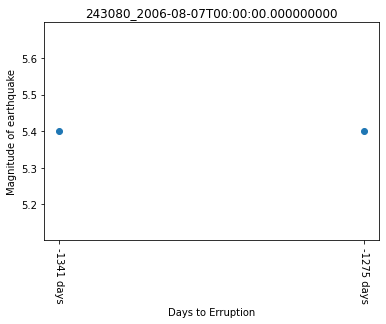

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_243091_0.png


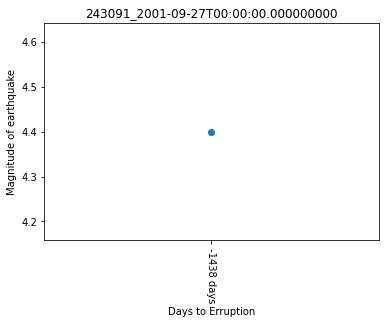

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_243120_0.png


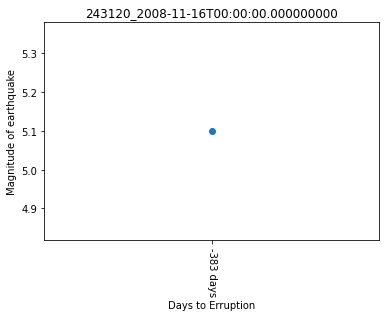

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_243130_0.png


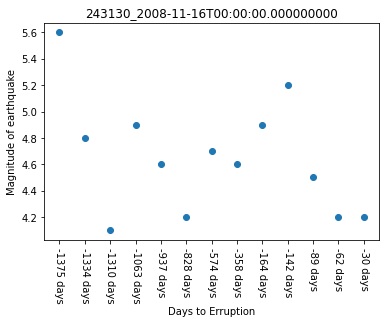

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_251002_0.png


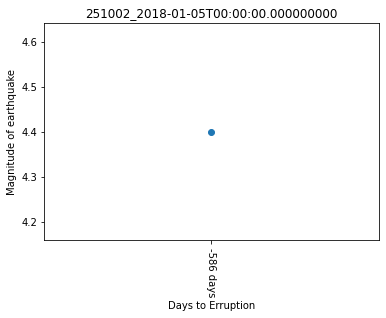

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_251020_0.png


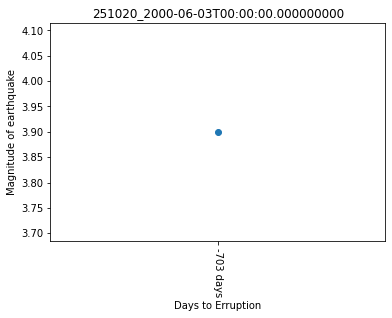

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_251020_1.png


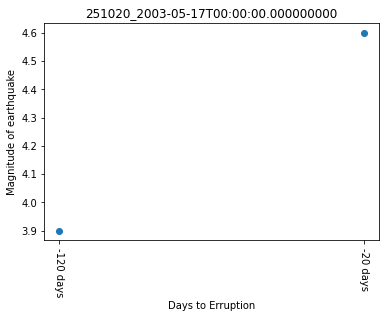

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_251020_2.png


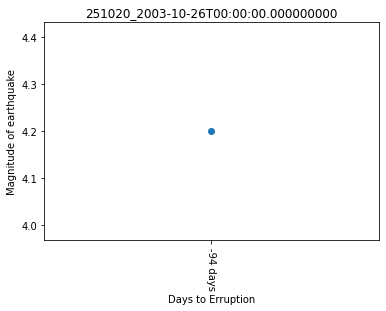

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_251020_3.png


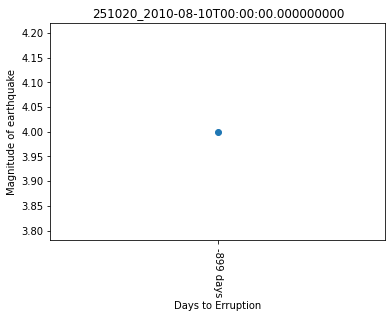

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_251020_4.png


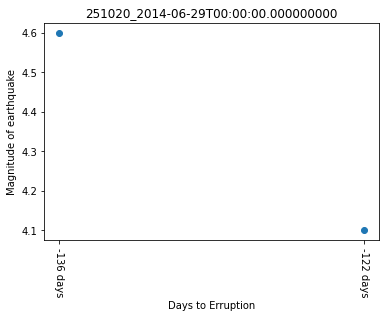

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_251050_0.png


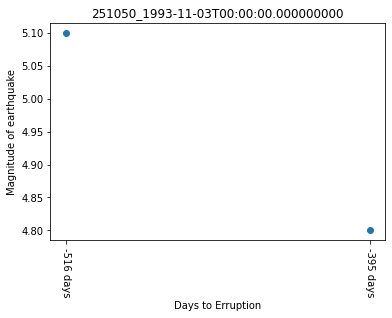

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_251070_0.png


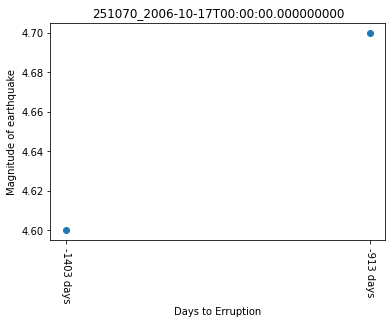

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252010_0.png


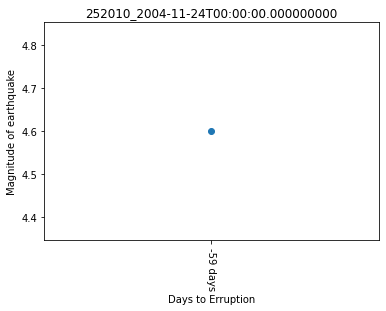

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252010_1.png


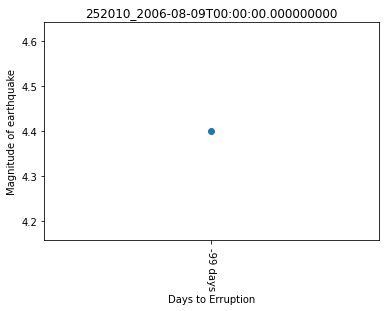

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252010_2.png


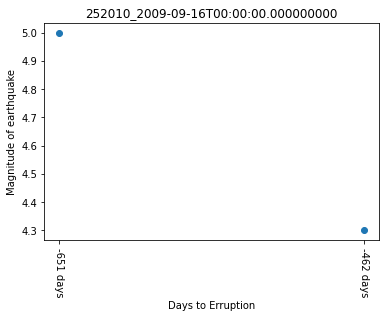

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252010_3.png


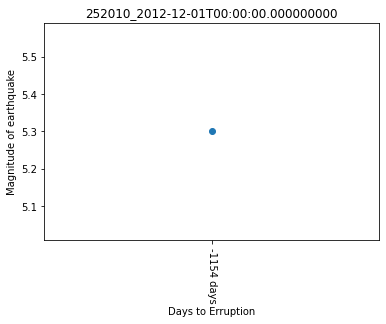

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252010_4.png


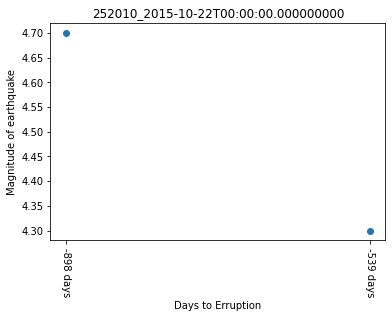

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252070_0.png


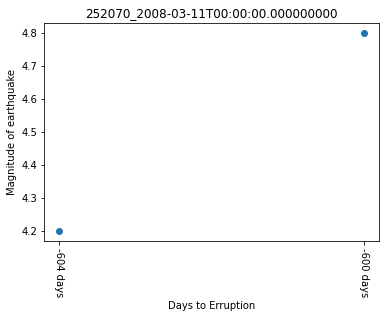

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252080_0.png


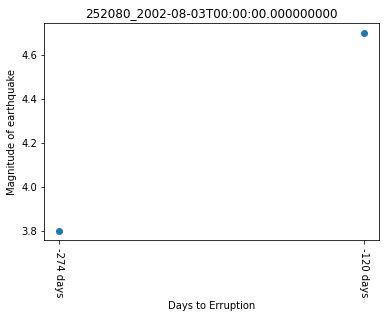

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252080_1.png


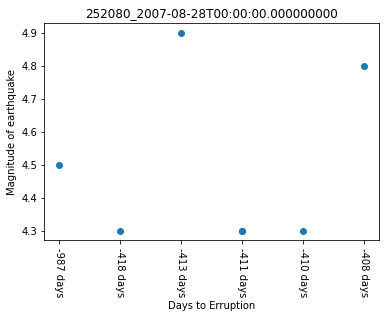

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_0.png


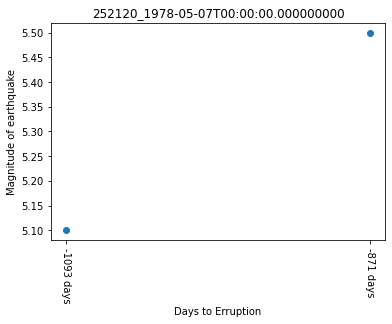

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_1.png


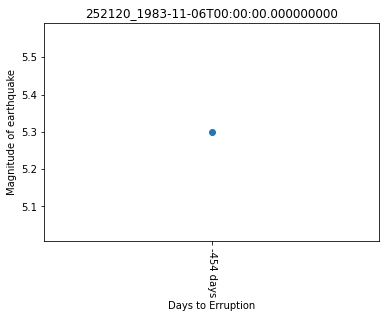

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_2.png


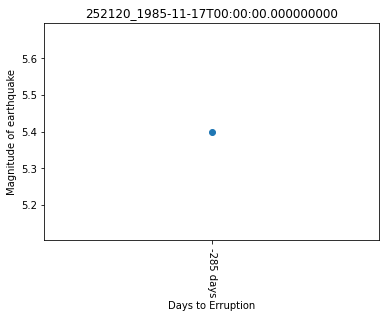

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_3.png


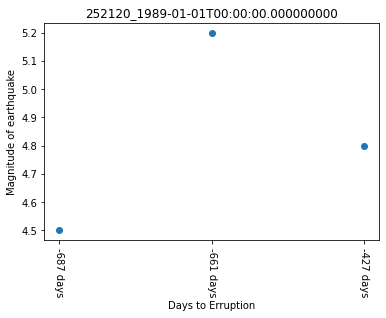

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_4.png


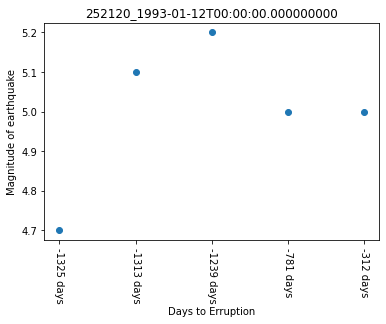

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_5.png


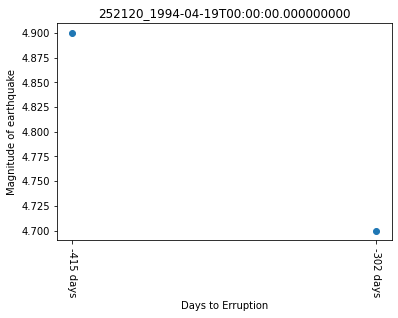

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_6.png


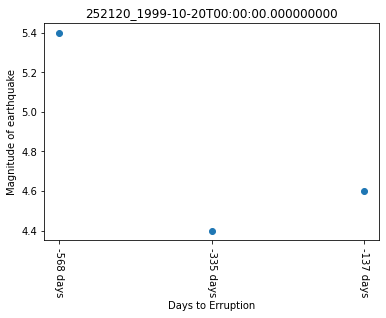

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_7.png


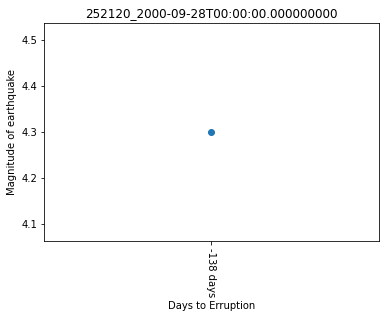

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_8.png


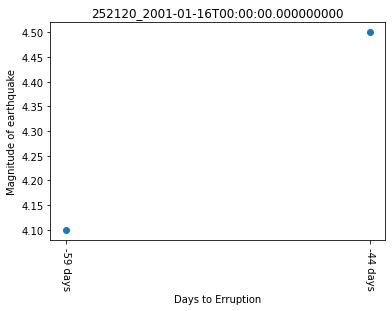

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_9.png


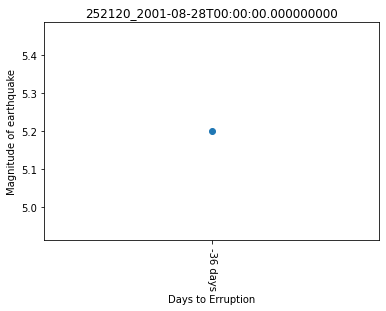

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_10.png


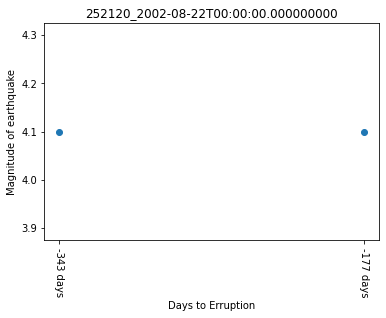

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_11.png


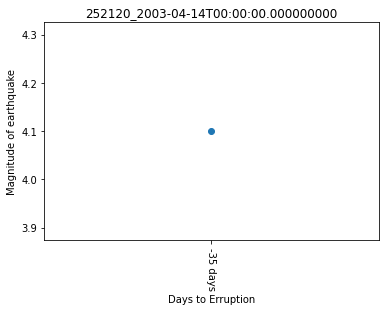

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_12.png


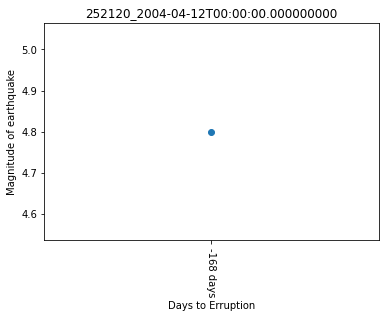

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_13.png


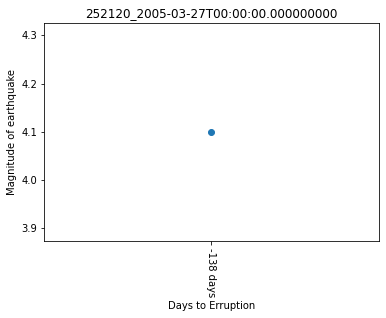

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_14.png


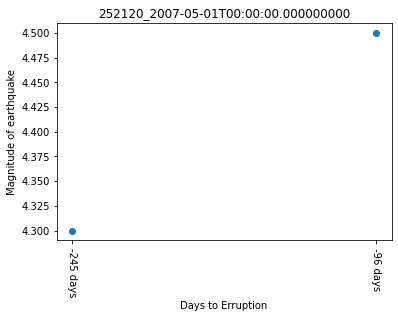

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_15.png


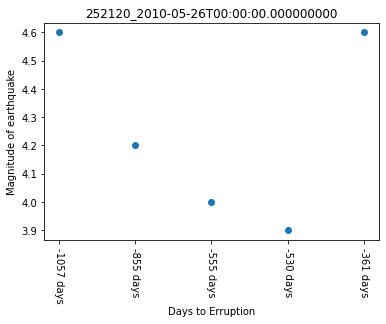

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_16.png


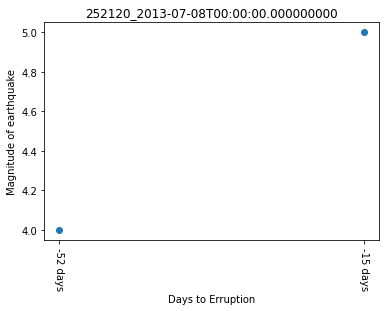

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_17.png


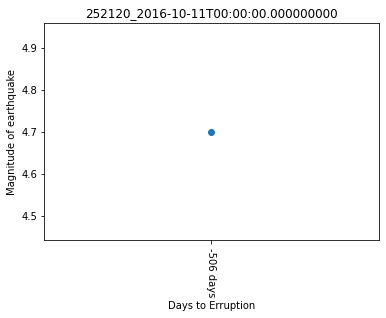

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_18.png


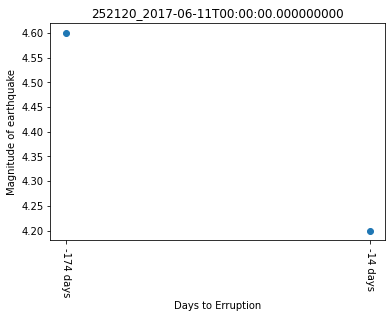

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_19.png


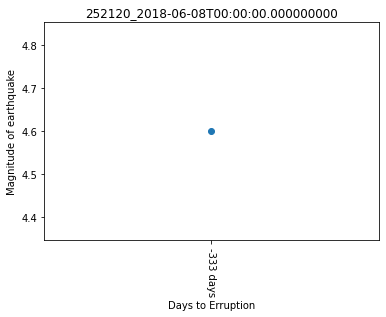

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252120_20.png


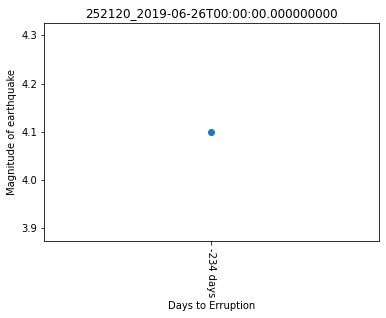

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252140_0.png


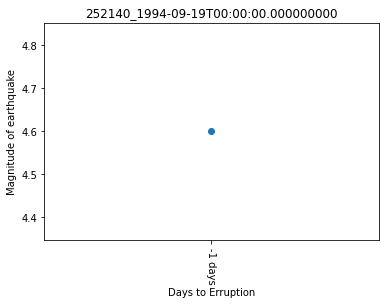

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252140_1.png


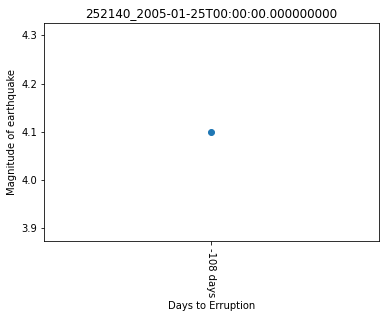

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252140_2.png


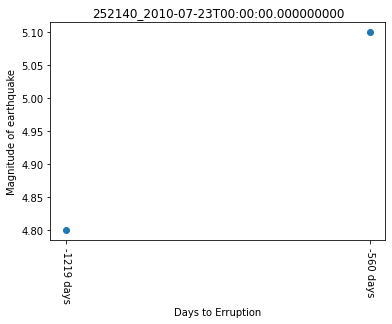

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_252140_3.png


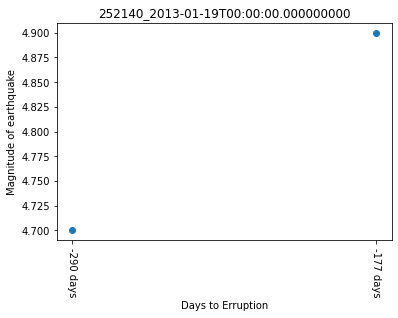

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_255060_0.png


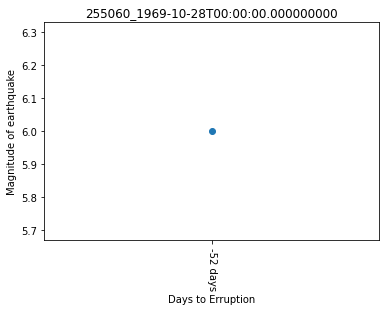

E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_255060_1.png


KeyboardInterrupt: 

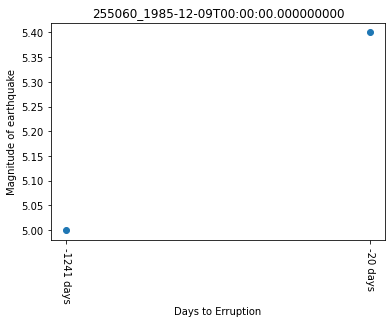

In [37]:
import matplotlib.cm as cm
namra = g.volcano_name.unique()
import matplotlib.pyplot as plt
for i in namra:
    niki = g[g["volcano_name"] == i].volcano_time.unique()
    number_of_inner = 0
    for j in niki:
        x_axis = g.loc[np.logical_and(g["volcano_name"] == i, g["volcano_time"] == j)].Start_date_difference
        y_axis = g.loc[np.logical_and(g["volcano_name"] == i, g["volcano_time"] == j)].magnitude
        plt.scatter(x_axis.astype(str), y_axis)
        plt.title(str(i) + "_" + str(j))
        plt.xticks(rotation=-90)
        plt.xlabel("Days to Erruption")
        plt.ylabel("Magnitude of earthquake")
        salo = 'E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\_'
        foo = salo + str(i) + '_' + str(number_of_inner)+ '.png'
        print(foo)
        plt.savefig(str(foo))
        plt.show()
        number_of_inner = number_of_inner + 1

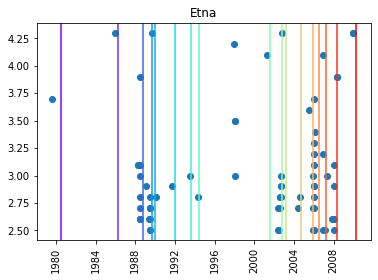

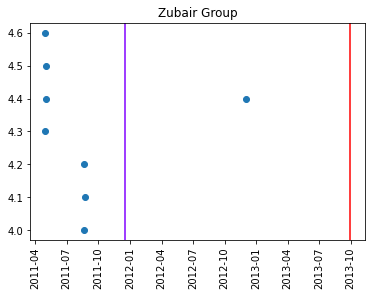

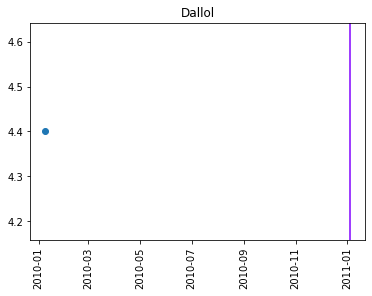

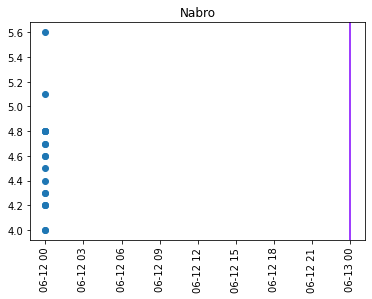

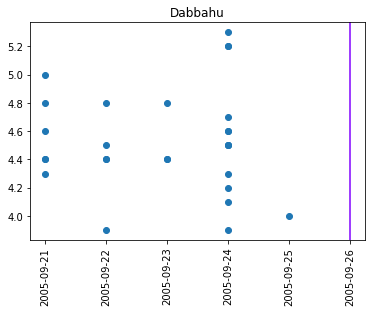

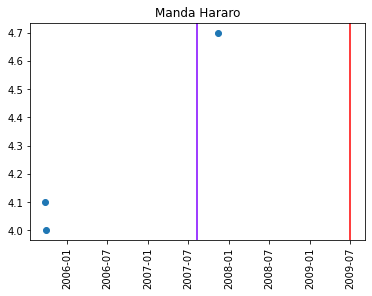

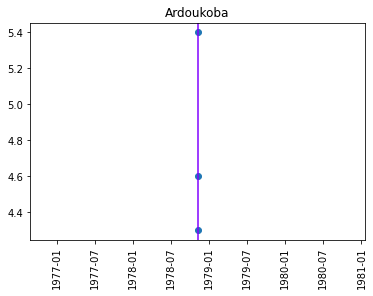

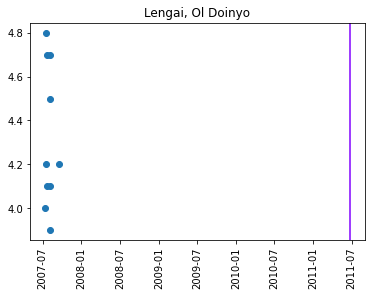

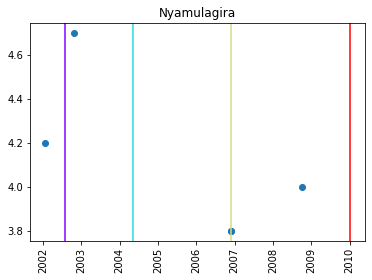

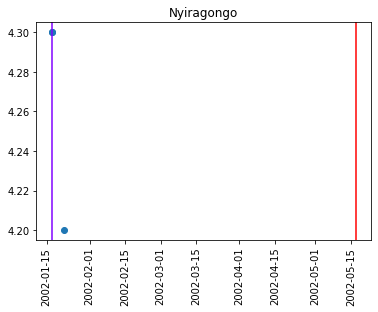

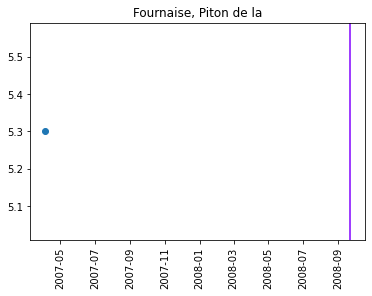

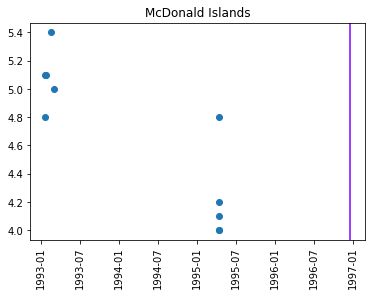

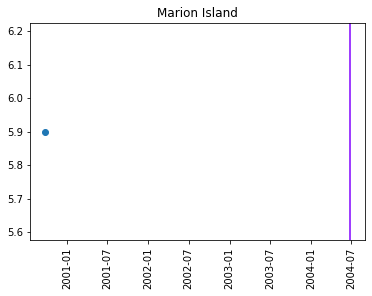

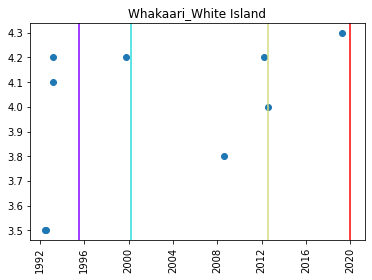

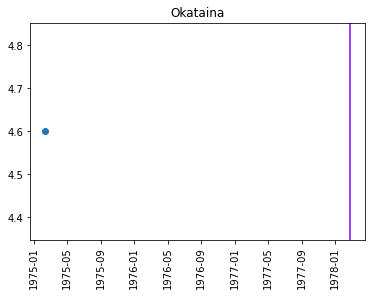

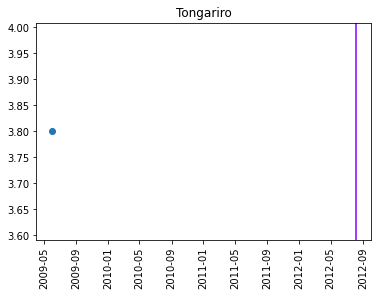

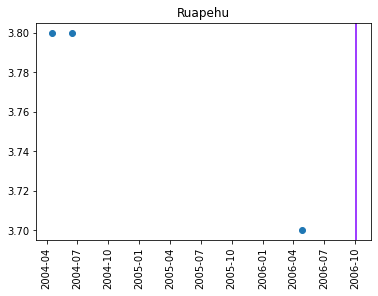

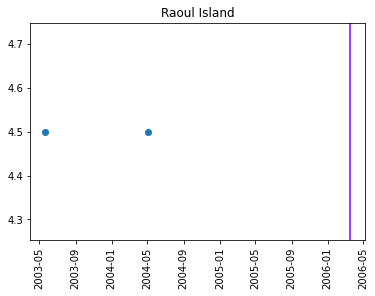

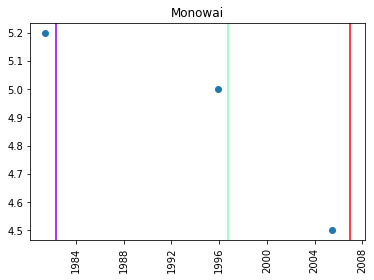

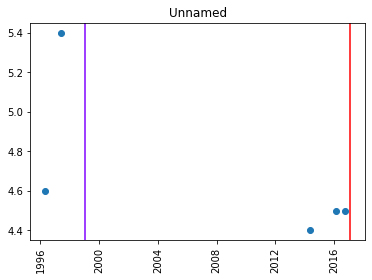

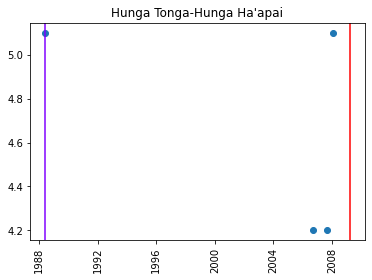

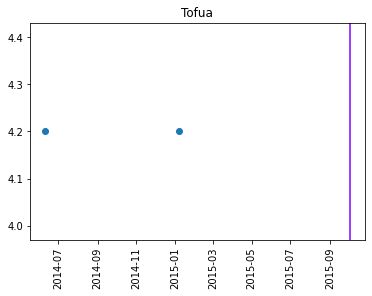

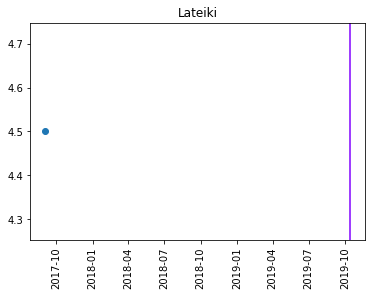

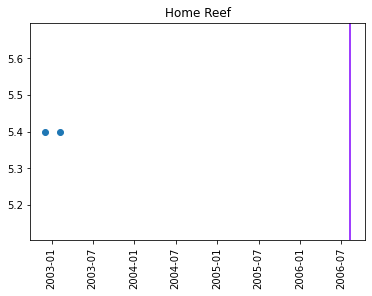

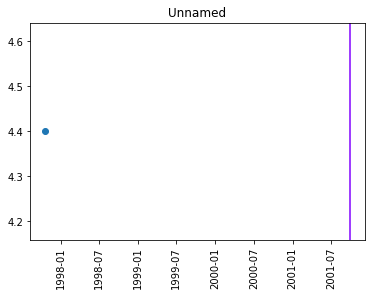

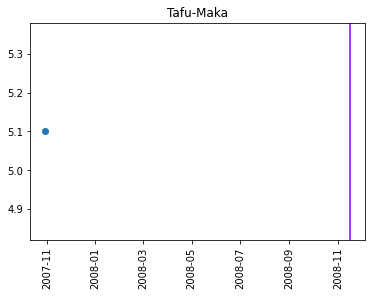

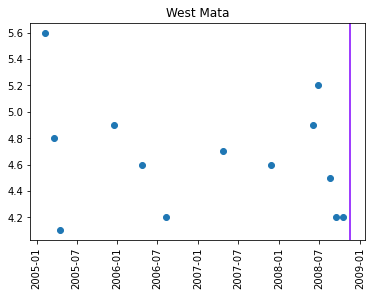

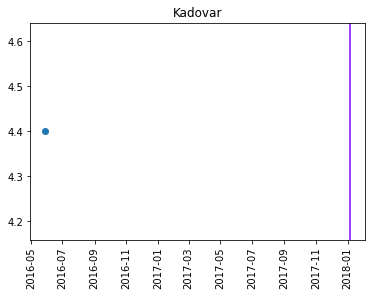

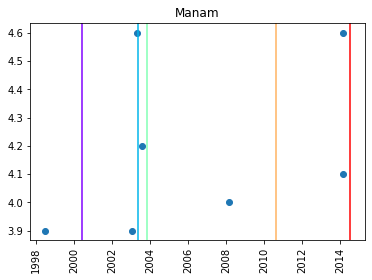

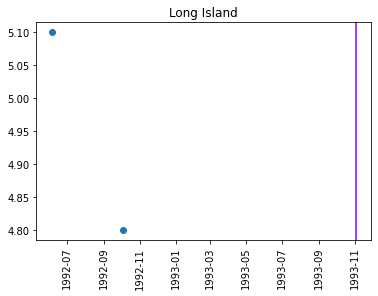

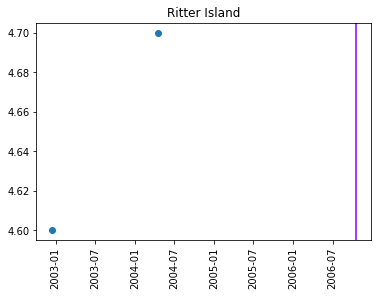

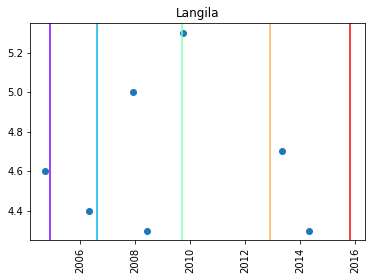

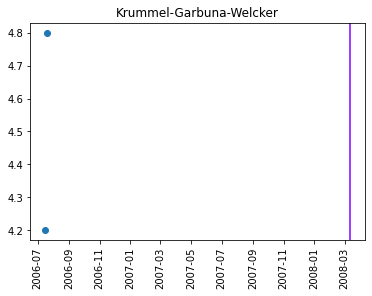

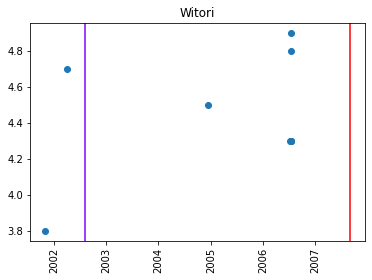

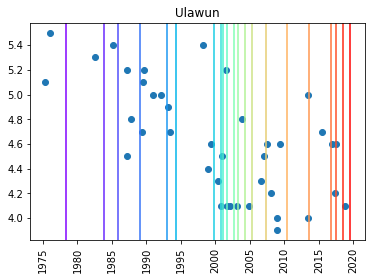

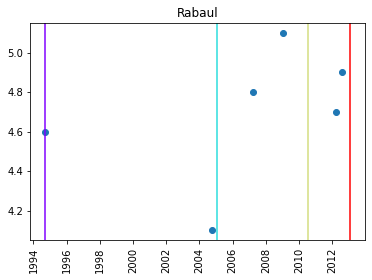

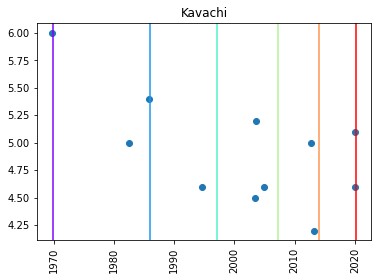

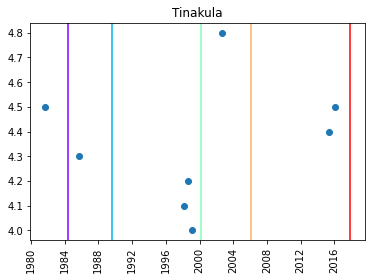

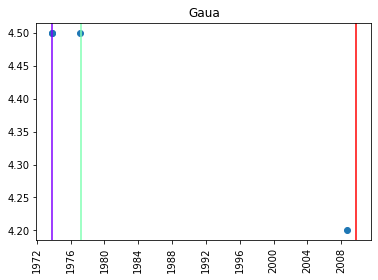

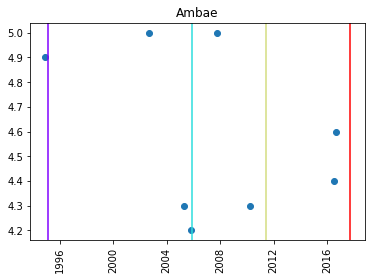

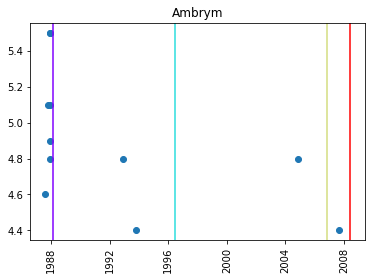

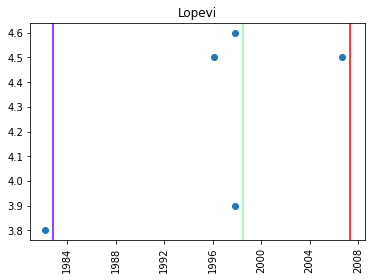

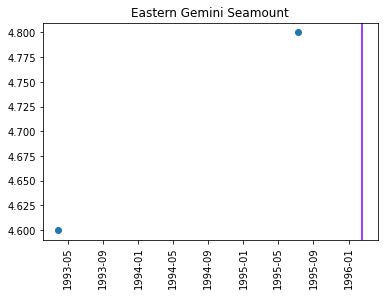

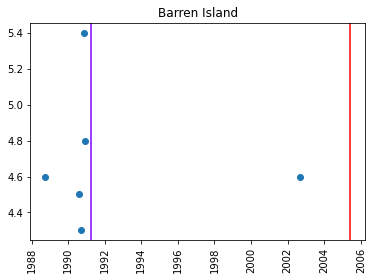

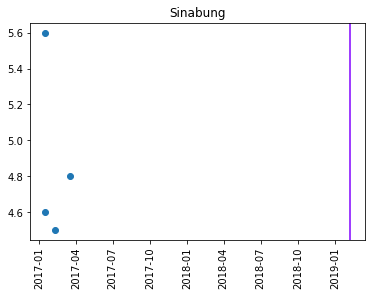

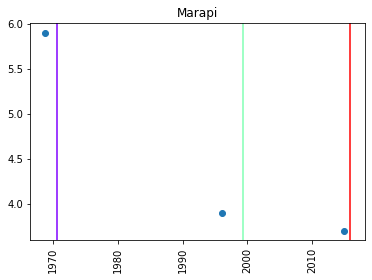

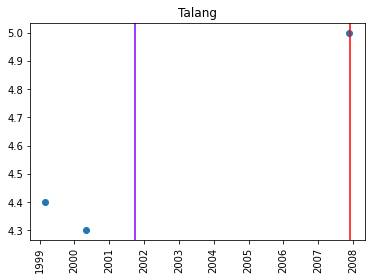

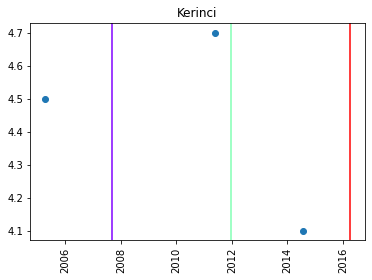

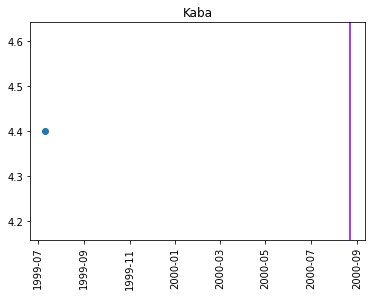

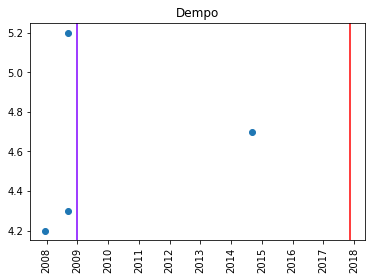

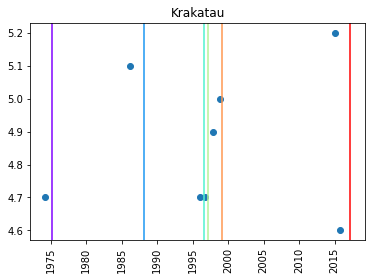

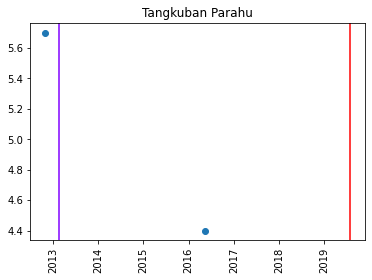

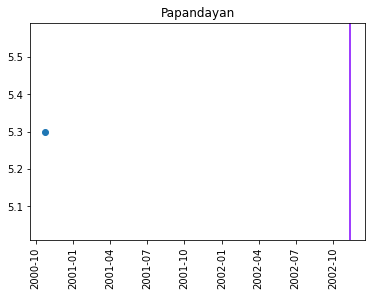

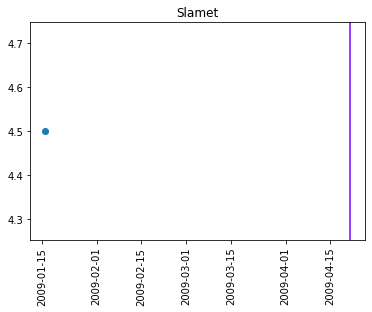

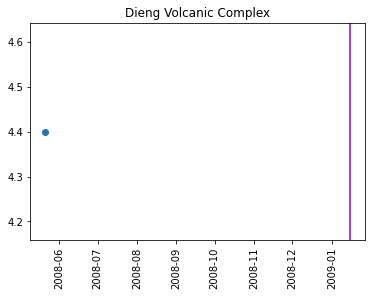

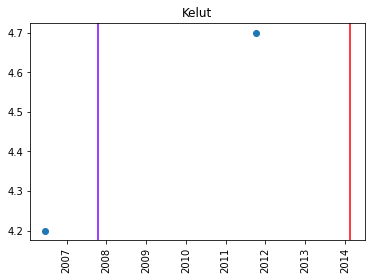

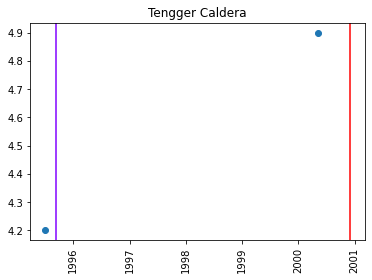

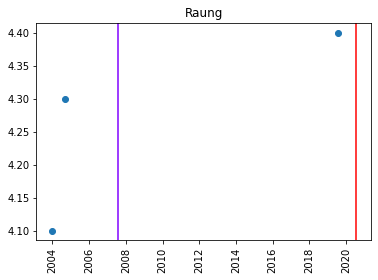

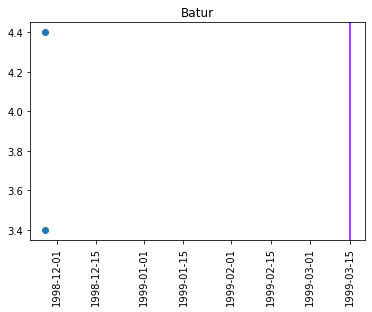

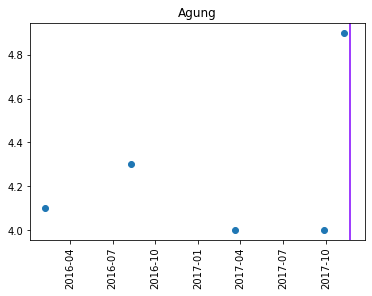

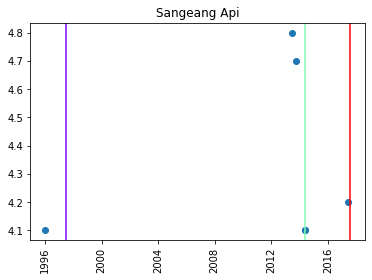

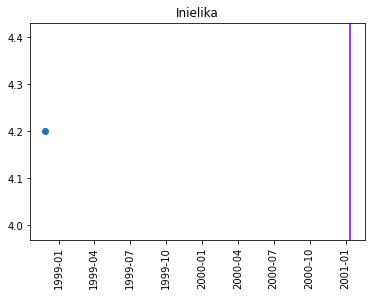

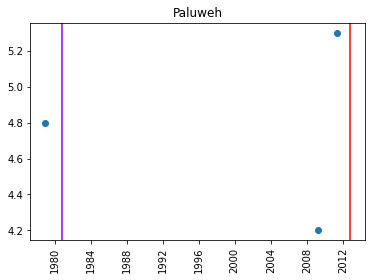

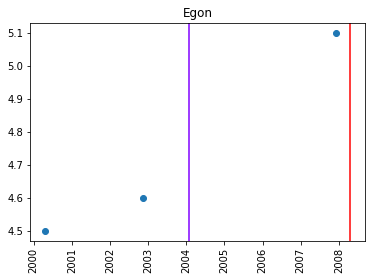

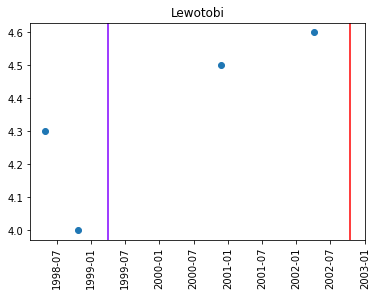

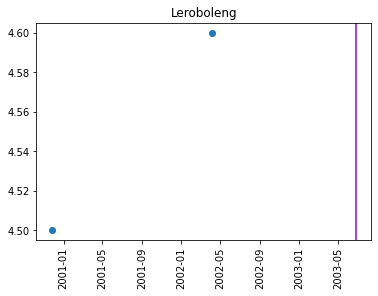

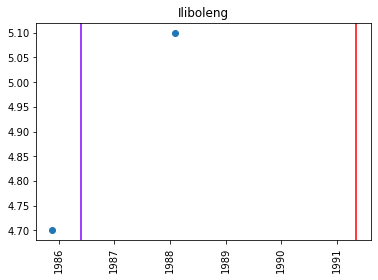

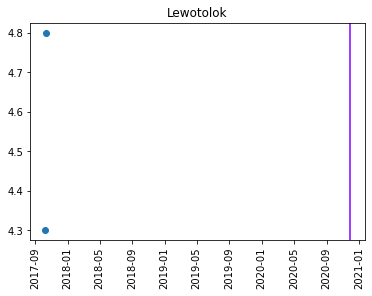

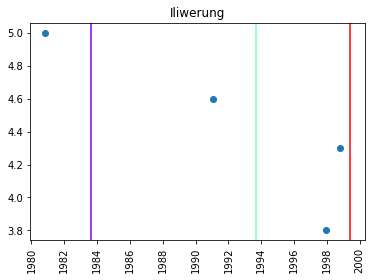

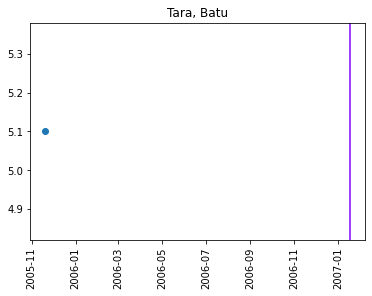

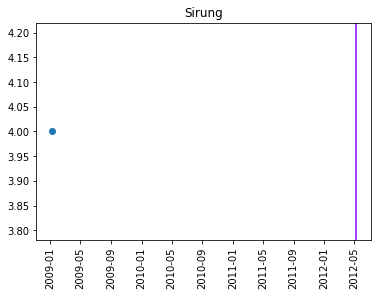

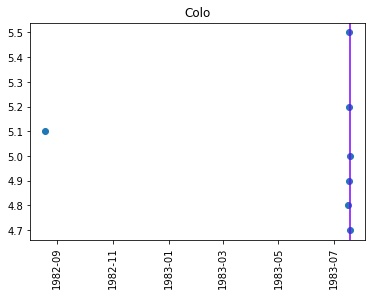

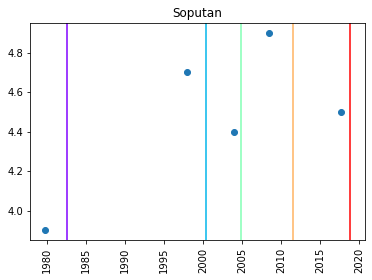

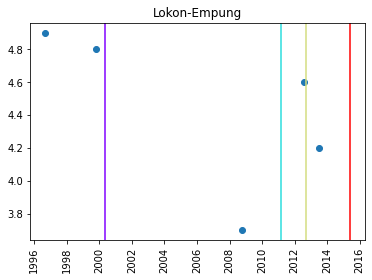

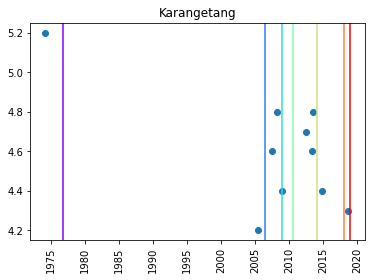

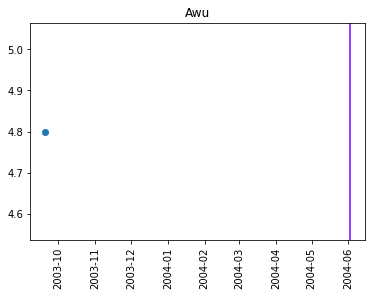

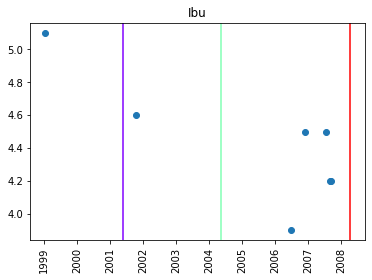

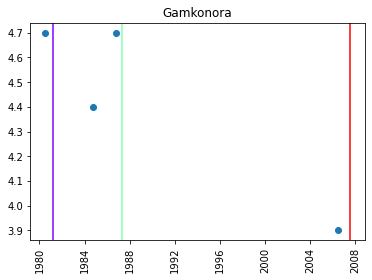

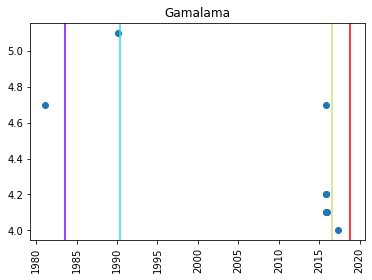

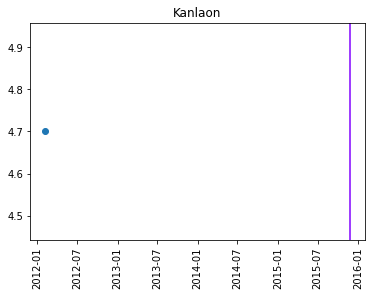

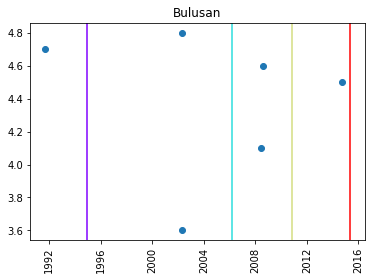

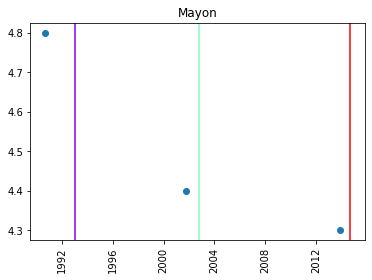

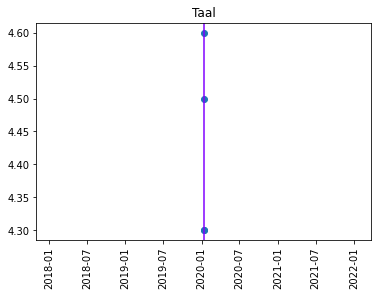

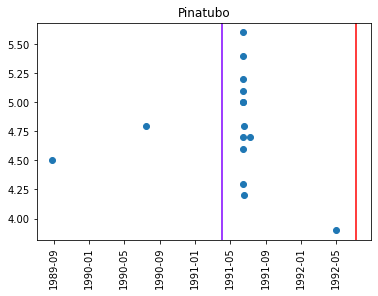

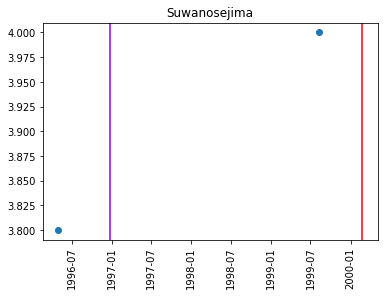

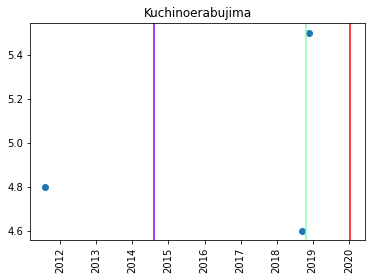

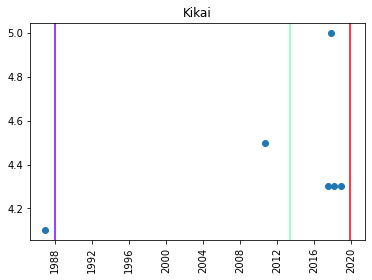

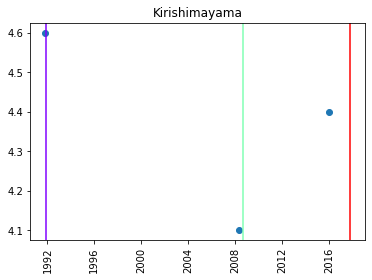

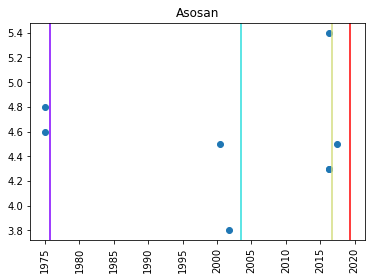

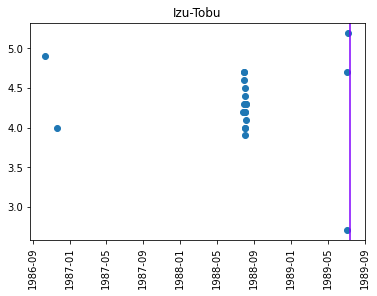

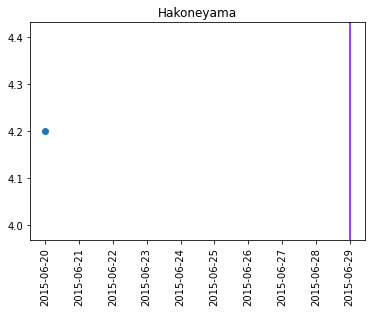

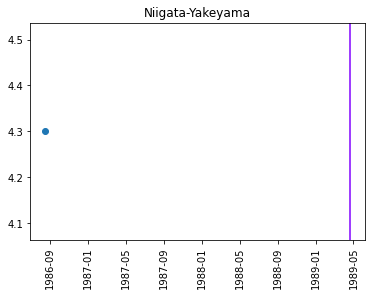

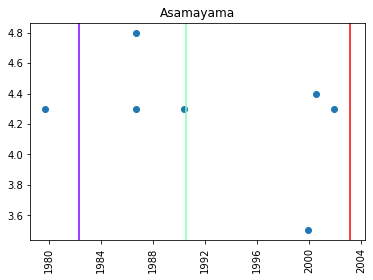

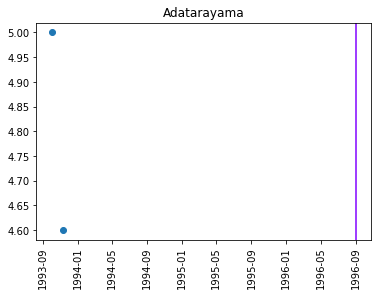

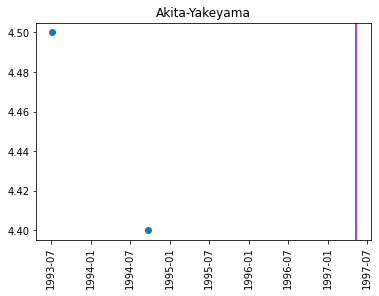

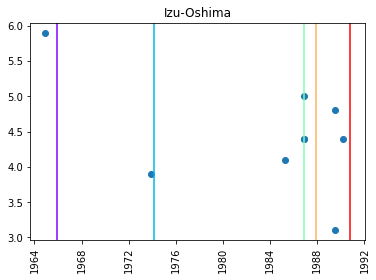

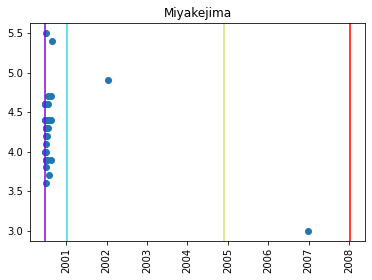

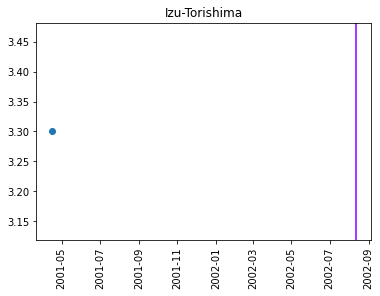

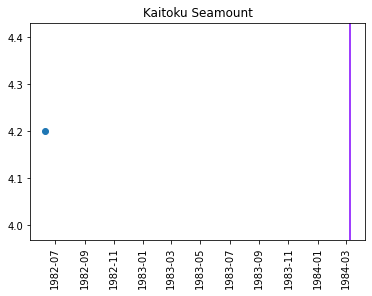

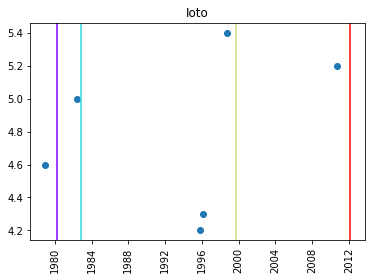

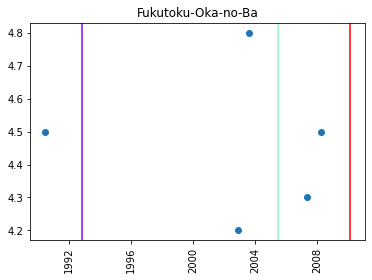

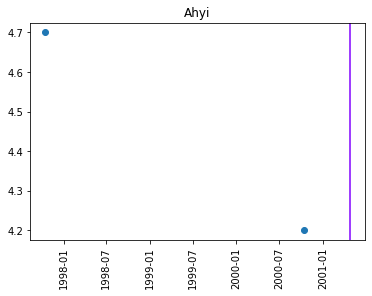

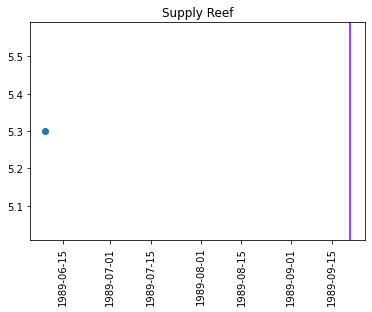

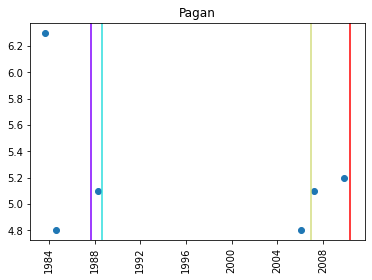

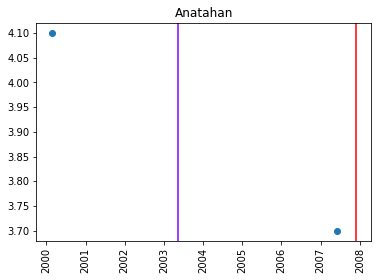

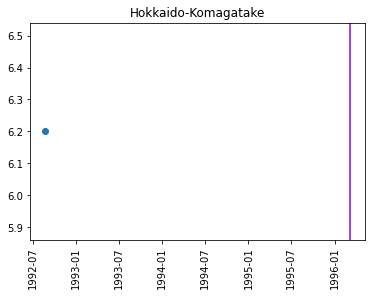

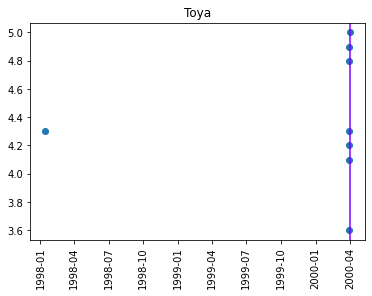

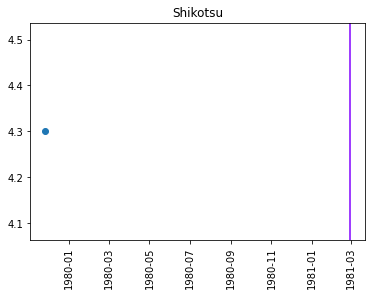

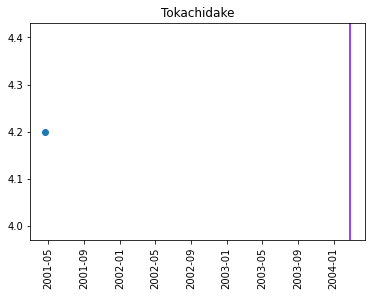

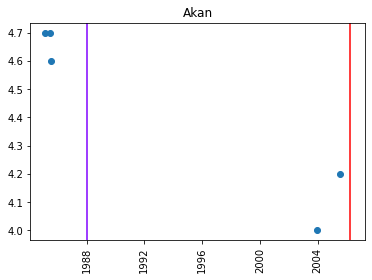

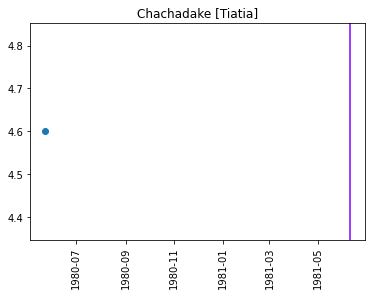

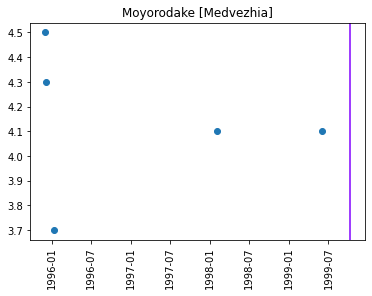

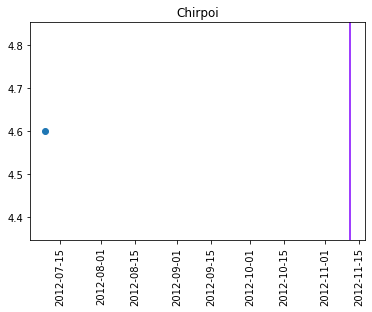

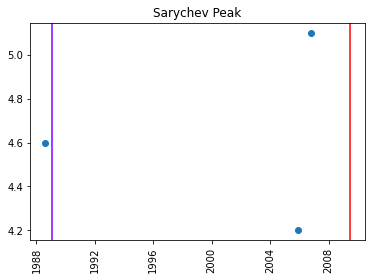

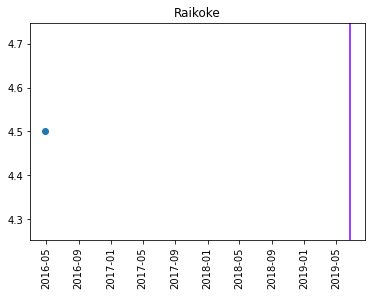

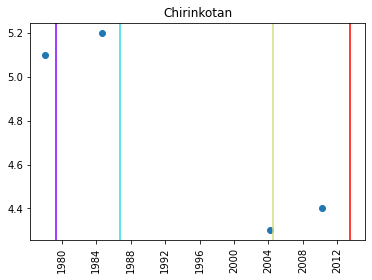

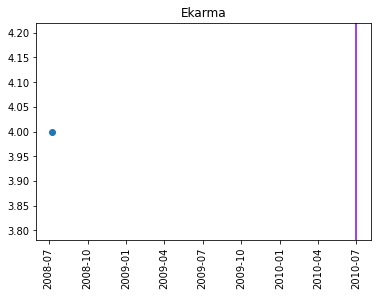

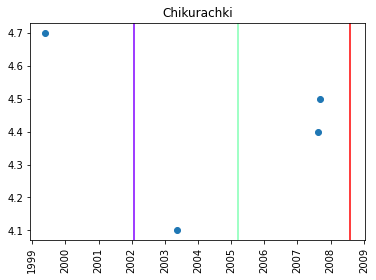

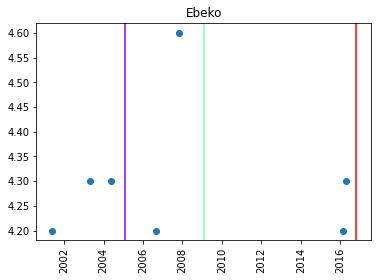

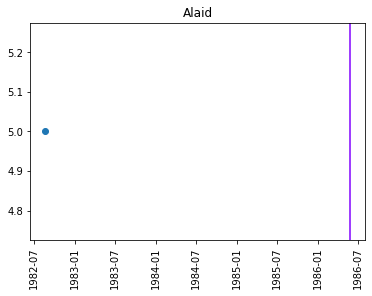

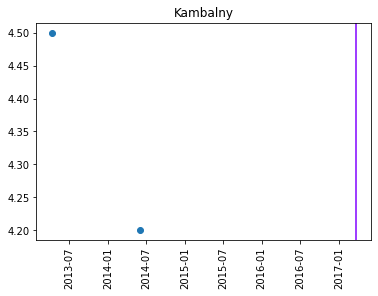

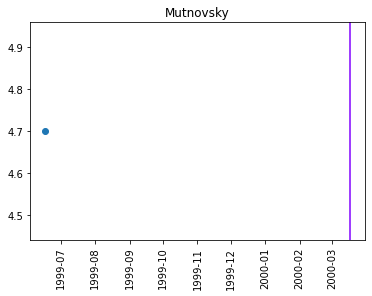

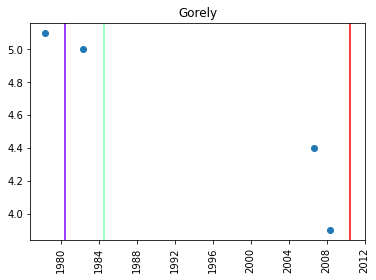

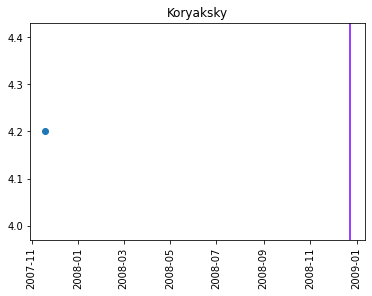

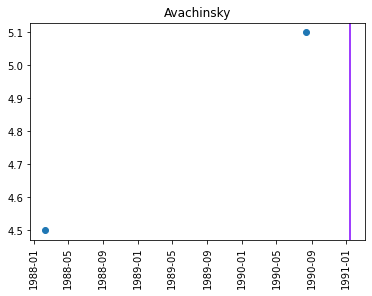

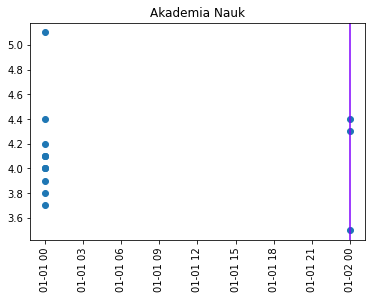

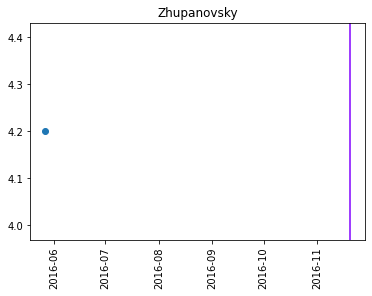

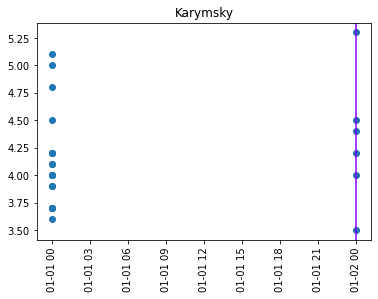

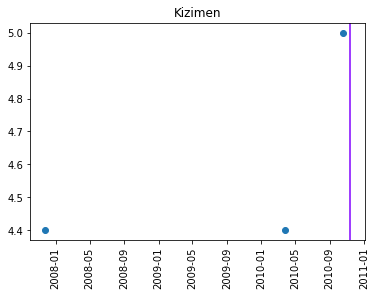

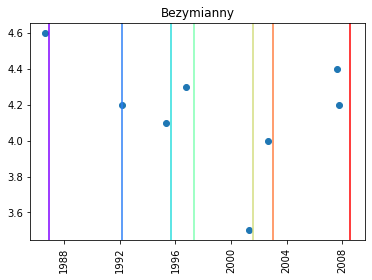

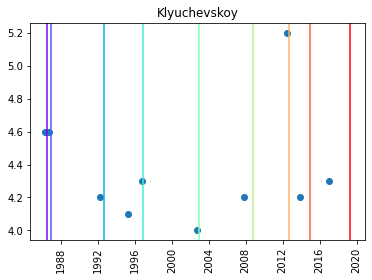

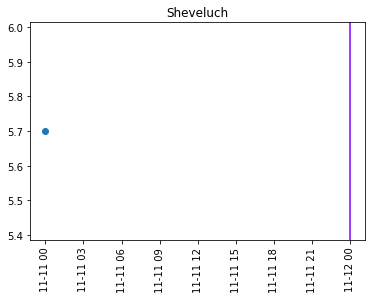

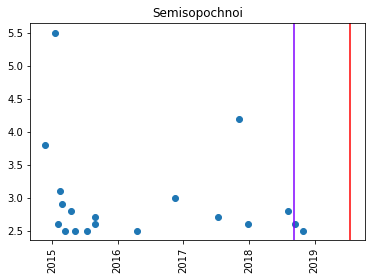

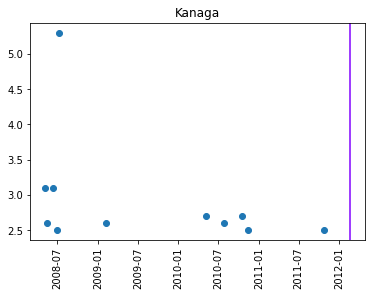

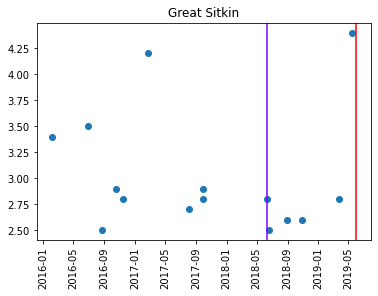

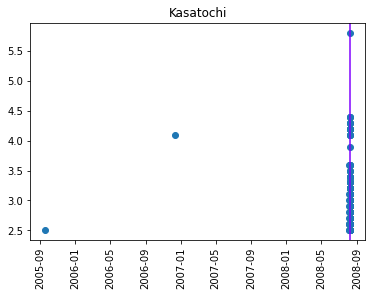

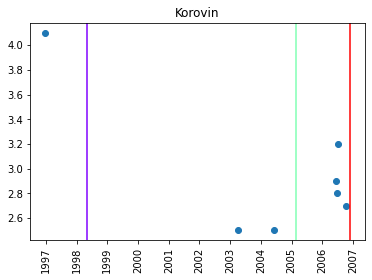

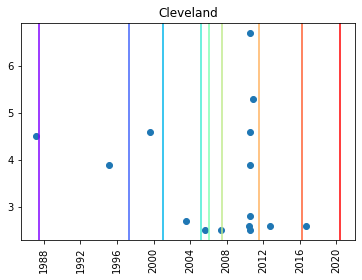

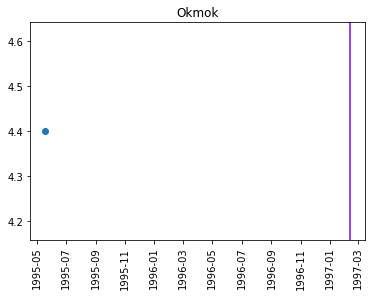

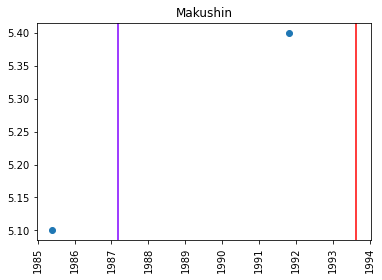

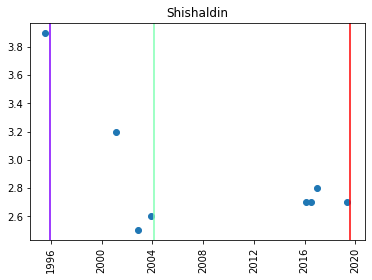

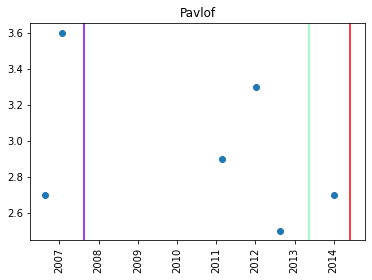

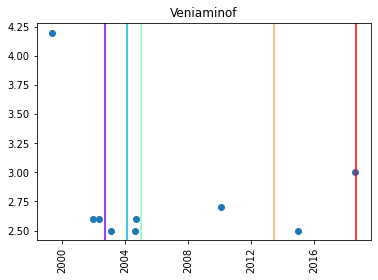

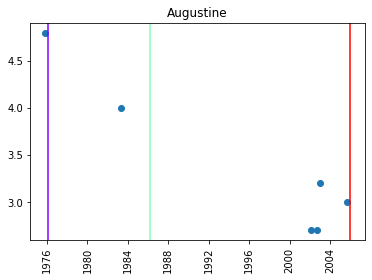

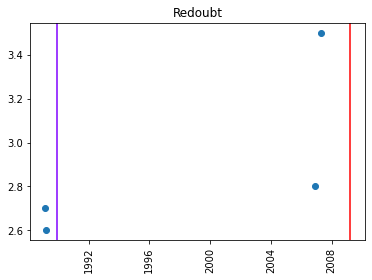

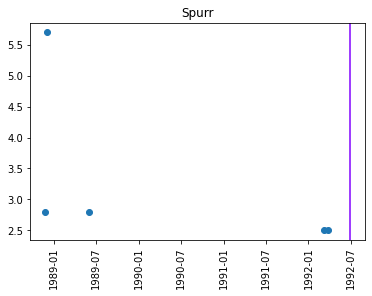

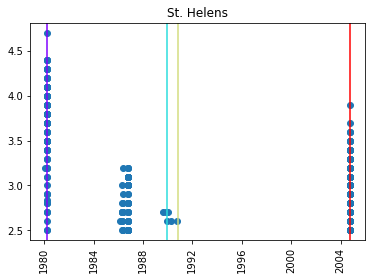

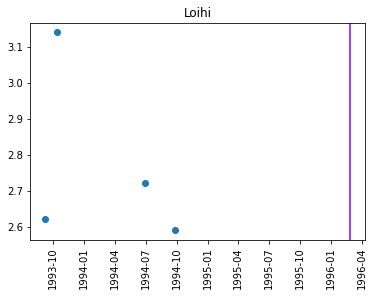

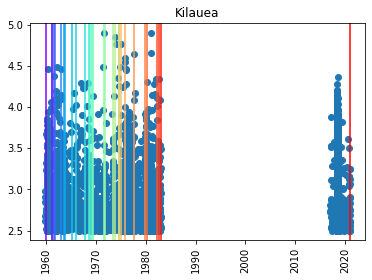

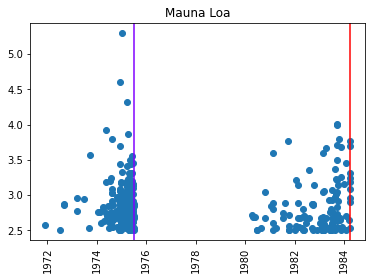

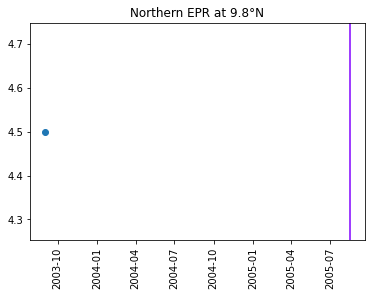

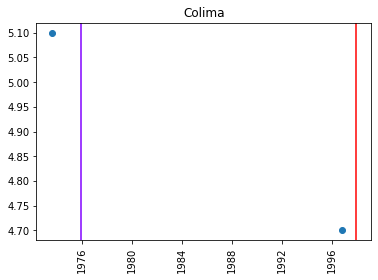

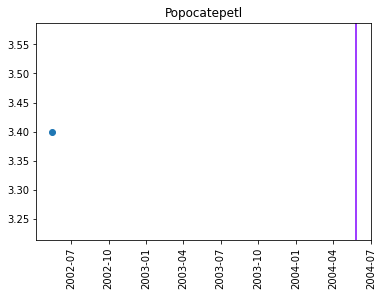

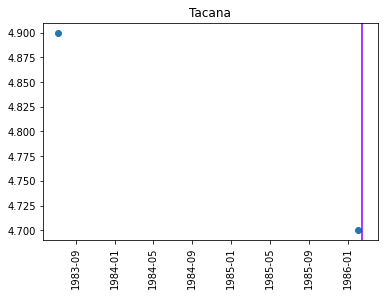

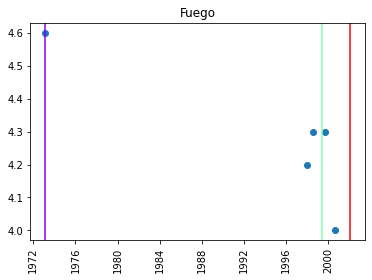

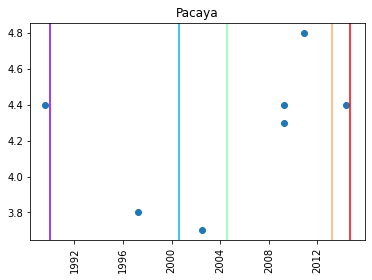

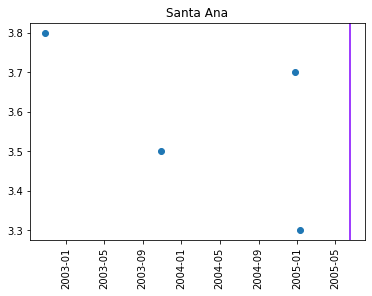

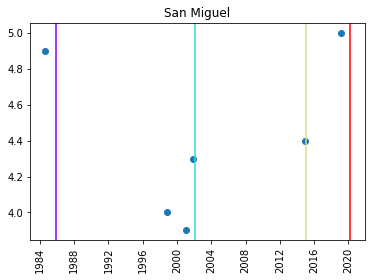

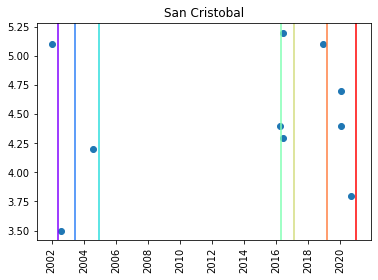

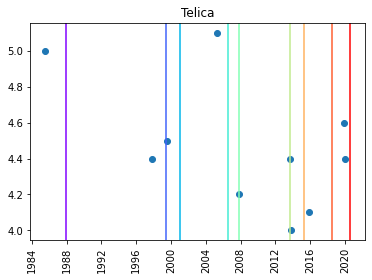

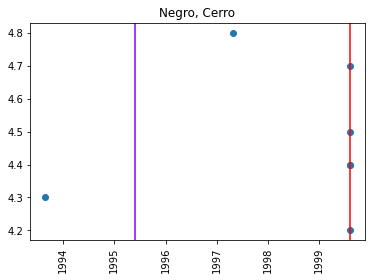

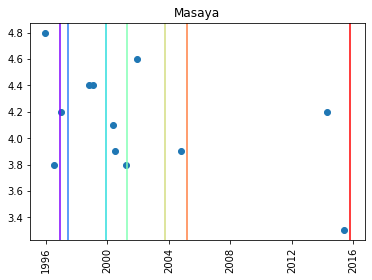

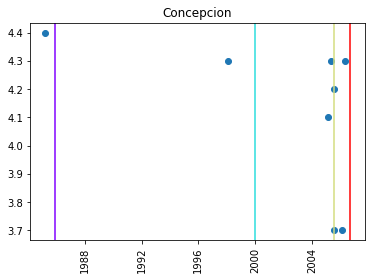

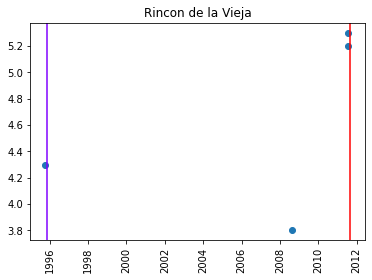

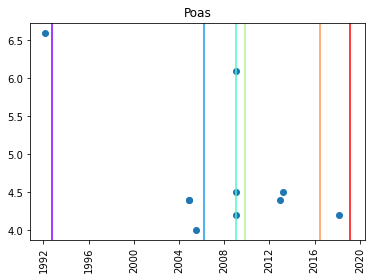

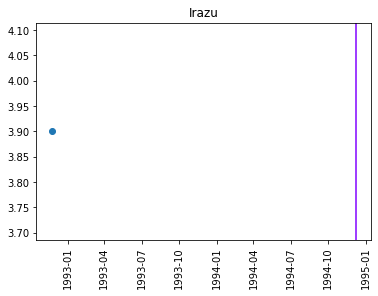

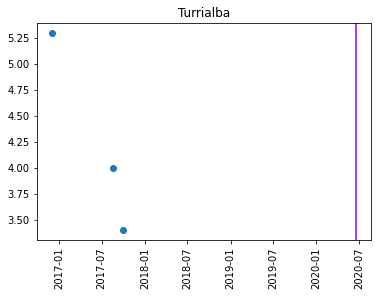

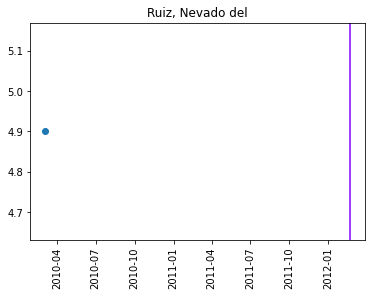

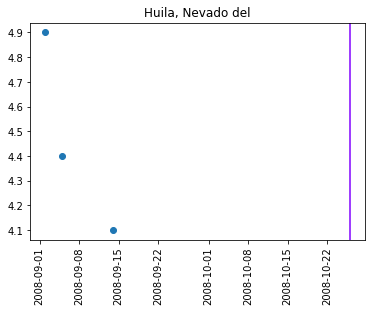

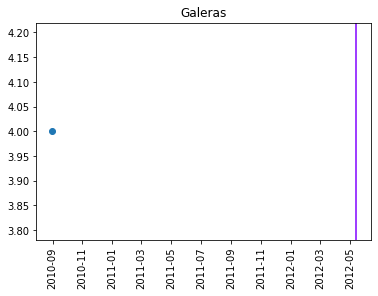

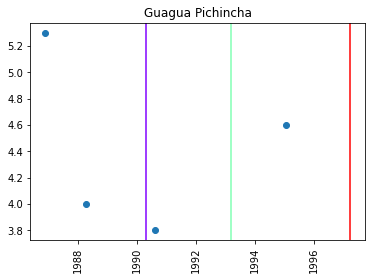

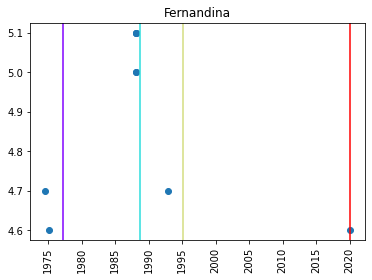

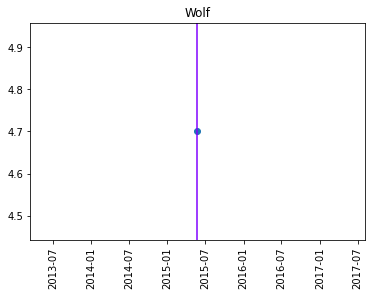

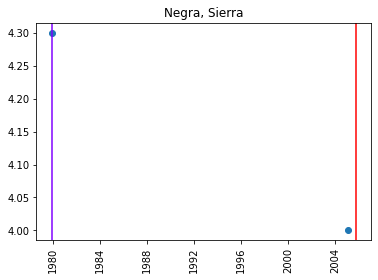

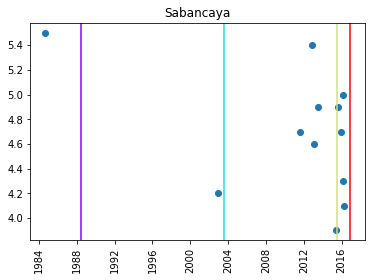

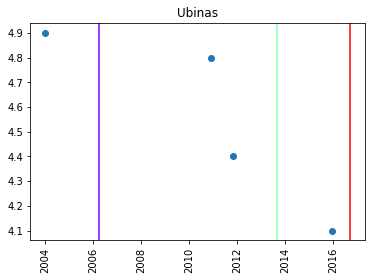

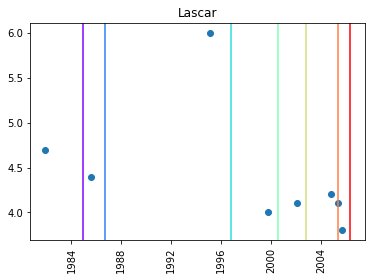

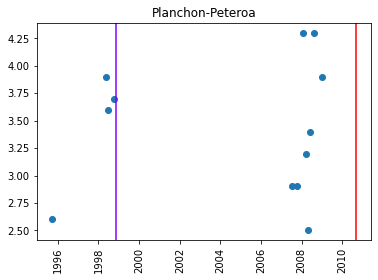

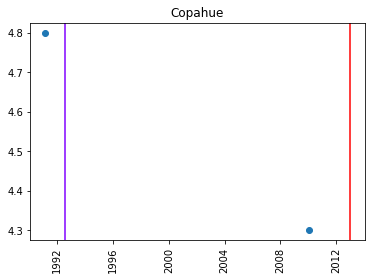

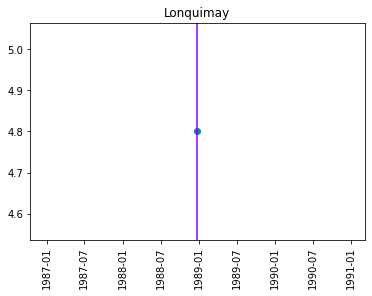

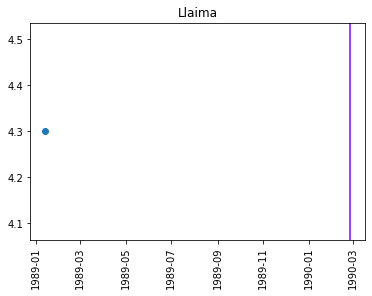

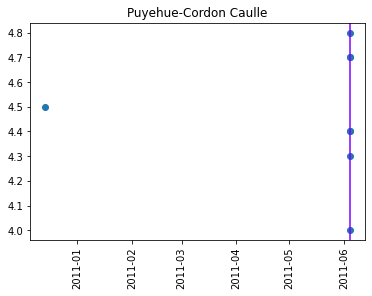

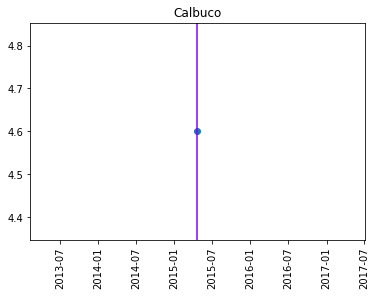

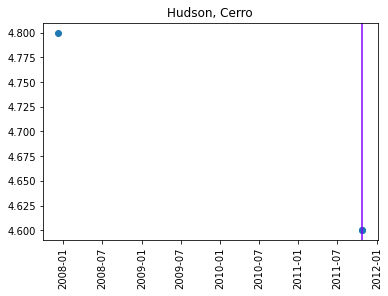

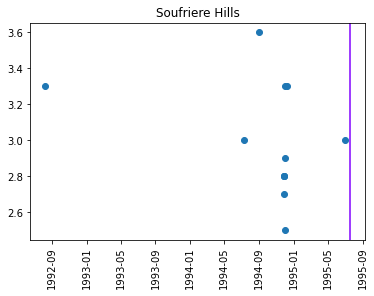

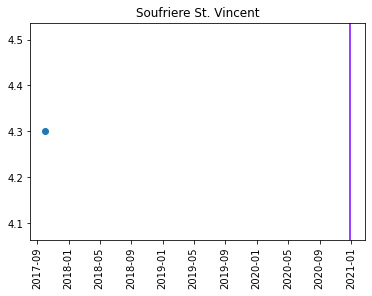

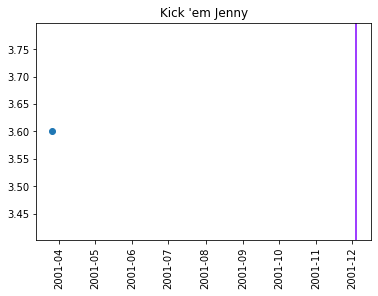

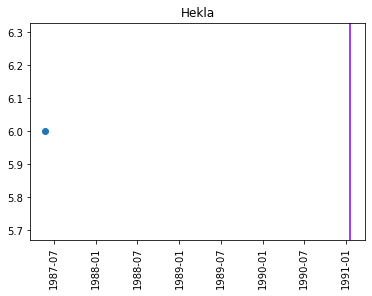

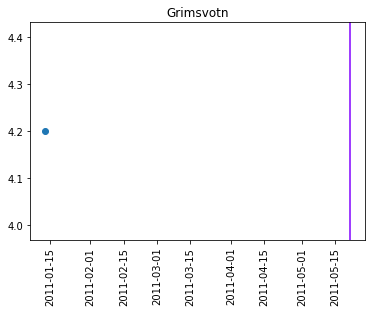

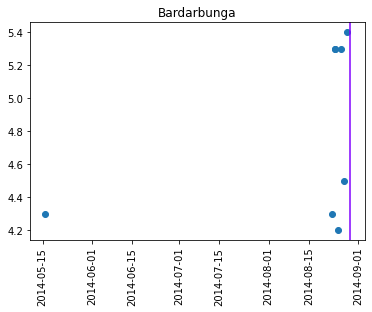

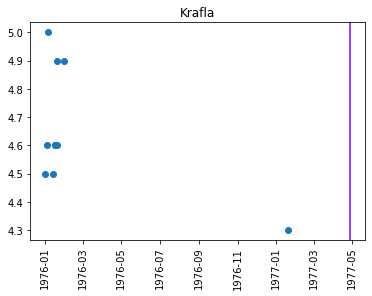

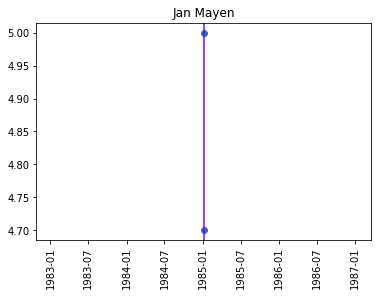

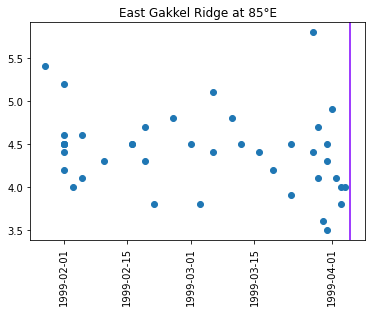

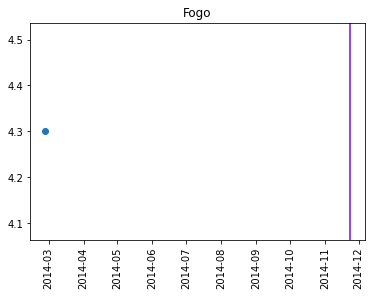

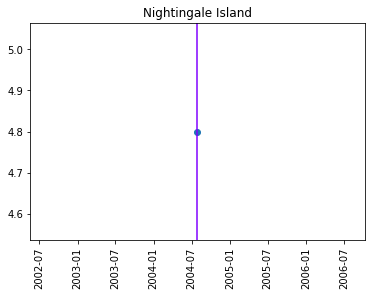

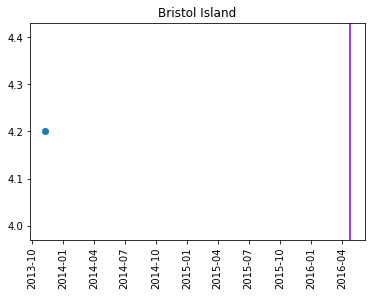

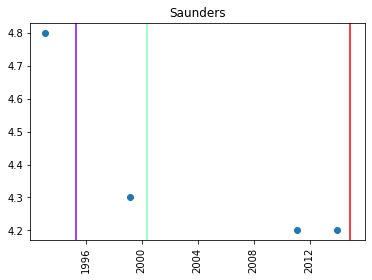

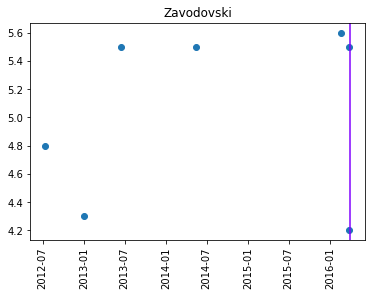

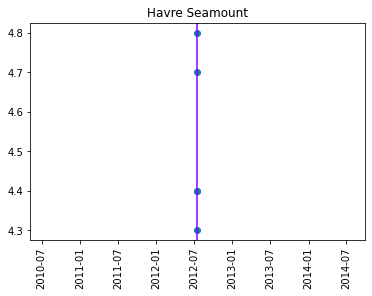

In [54]:
import matplotlib.cm as cm
df_quantized = pd.DataFrame()
namra = g.volcano_name.unique()
for i in namra:
    niki = g[g["volcano_name"] == i].volcano_time.unique()
    colors = cm.rainbow(np.linspace(0, 1, len(niki)))
    for j, c in zip(niki, colors):
        plt.axvline(x=j, ymin=0, ymax=1, color = c) #label = str(j),
    X_axis = g[g["volcano_name"] == i].new_date
    y_axis = g[g["volcano_name"] == i].magnitude
    #tick = g[g["volcano_name"] == i].new_date.unique()
    #print(tick)
    title = volcano_nonconti[volcano_nonconti["VolcanoNumber"] == int(i)].VolcanoName.unique()[0]
    title = str(title)
    title = title.replace("/", "_")
    plt.title(str(title))
    plt.scatter(X_axis, y_axis)
    #plt.legend()
    path = 'E:\Education\RWTHAachenUniversity\SS2021\TechLabs\Project\plots\cronological\_' + str(title) + '_cronological.png'
    plt.savefig(str(path))
    plt.xticks(rotation='vertical')
    #plt.xticks(np.arange(tick[0], tick[-1], step=(3)))
    plt.show()

In [24]:
import plotly.graph_objects as go

In [ ]:
namra = df_quantized.volcano_name.unique()
import matplotlib.pyplot as plt
for i in namra:
    niki = df_quantized[df_quantized["volcano_name"] == i].volcano_time.unique()
    number_of_inner = 0
    for j in niki:
        x_axis = df_quantized.loc[np.logical_and(df_quantized["volcano_name"] == i, df_quantized["volcano_time"] == j)].Start_date_difference
        y_axis = df_quantized.loc[np.logical_and(df_quantized["volcano_name"] == i, df_quantized["volcano_time"] == j)].magnitude

Simulation Starts here

In [40]:
Training_df.iloc[:, 2:8].head()

0.5_max  0.5_shape  0.5_key  1.0_max  1.0_shape  1.0_key
0      0.0          0        0      5.7          1        3
0      0.0          0        0      0.0          0        0
0      0.0          0        0      5.4          9        2
0      0.0          0        0      4.1          2        2
0      0.0          0        0      0.0          0        0

In [38]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
target = Training_df["target"]
target = target.astype(int)
X_value = Training_df.iloc[:, 2:8]
seed = 7
test_size = 0.15
X_train, X_test, y_train, y_test = train_test_split(X_value, target, test_size=test_size, random_state=seed)

In [43]:
X_train.corr()

0.5_max  0.5_shape   0.5_key   1.0_max  1.0_shape   1.0_key
0.5_max    1.000000   0.328398  0.817717  0.002553   0.097987 -0.109387
0.5_shape  0.328398   1.000000  0.143679  0.078907   0.186765 -0.065857
0.5_key    0.817717   0.143679  1.000000 -0.002099   0.027435 -0.063809
1.0_max    0.002553   0.078907 -0.002099  1.000000   0.052142  0.748188
1.0_shape  0.097987   0.186765  0.027435  0.052142   1.000000 -0.015858
1.0_key   -0.109387  -0.065857 -0.063809  0.748188  -0.015858  1.000000

In [44]:
print(np.mean(y_train),np.std(y_train))

0.551150895140665 0.49737670424569025


In [66]:
print(np.mean(y_train),np.std(y_train))

0.4188235294117647 0.4933663756508333


Logistic regression and XGbossting implimented in SKLearn

In [56]:
#LogisticRegression and SVM
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import svm
X = X_train
y = y_train
clf = LogisticRegressionCV(cv=3, random_state=1, max_iter=1000, penalty='l2',tol=0.0001).fit(X, y)
model = svm.NuSVC(gamma='auto')
model.fit(X, y)
ypredict = clf.predict(X_test)
y_SVM_predict = model.predict(X_test)
print(np.mean(cross_val_score(clf, X, y, cv=10)))
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
print(metrics.accuracy_score(y_test, ypredict))
print(metrics.confusion_matrix(y_test, ypredict))
print(precision_recall_fscore_support(y_test, ypredict, average='binary'))

0.8490912041544953
0.8623188405797102
[[50 19]
 [ 0 69]]
(0.7840909090909091, 1.0, 0.8789808917197451, None)


In [72]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for volcano classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

NameError: name 'metrics' is not defined

In [52]:
#sensitivity = TP / float(FN + TP)
print(metrics.recall_score(target_val, y_SVM_predict))

1.0


In [61]:
# fit XGBoost model training data
from sklearn import metrics
X = X_train
y = y_train
model1 = XGBClassifier()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(np.mean(cross_val_score(model1, X, y, cv=10)))
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average='binary'))

C:\Users\rusha\miniconda3\envs\rusha\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\rusha\miniconda3\envs\rusha\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [83]:
Training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volcano_name  920 non-null    object        
 1   volcano_time  920 non-null    datetime64[ns]
 2   0.5_max       229 non-null    float64       
 3   0.5_shape     920 non-null    int64         
 4   0.5_key       920 non-null    int64         
 5   1.0_max       558 non-null    float64       
 6   1.0_shape     920 non-null    int64         
 7   1.0_key       920 non-null    int64         
 8   target        920 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 71.9+ KB


In [92]:
np.mean(Training_df["target"]), np.std(Training_df["target"])

(0.5434782608695652, 0.49810605379954837)

Implimentation on pycaret.

In [90]:
# pycaret simulations
df_pycaret = Training_df.iloc[:, 2:9]
#df_pycaret["target"] = target
df_pycaret_training = df_pycaret.iloc[:736,:]
df_pycaret_validation = df_pycaret.iloc[736:920,:]
print(df_pycaret_validation.shape)
print(df_pycaret_training.info())

(184, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 736 entries, 0 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   0.5_max    187 non-null    float64
 1   0.5_shape  736 non-null    int64  
 2   0.5_key    736 non-null    int64  
 3   1.0_max    437 non-null    float64
 4   1.0_shape  736 non-null    int64  
 5   1.0_key    736 non-null    int64  
 6   target     736 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 46.0 KB
None


In [91]:
from pycaret.classification import *
exp1 = setup(data = df_pycaret_training, target = "target", train_size = 0.6, test_data = df_pycaret_validation, fix_imbalance = True)

In [30]:
best_model = compare_models()